# Visualizaciones promediadas anualmente

En este script veremos distintos gráficos con el objetivo de ver el comportamiento de las distintas variables entre sí, así como mostrar estadísticas descriptivas.

In [1]:
import pandas as pd
import numpy as np
import math
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib import ticker
from matplotlib import cm
import matplotlib.gridspec as gridspec
from matplotlib import rcParams
import seaborn as sns
import plotly
import warnings
import os
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
print('Modulos importados')

Modulos importados


In [2]:
# Configuraciones
warnings.filterwarnings('ignore')
# Reduzcamos el número de línea a leer
pd.options.display.max_rows = 5

In [3]:
# Directorio de trabajo
print("Directorio de trabajo previo: " + str(os.getcwd()))
# Cambiemoslo
os.chdir('/home/usuario/Documentos/Github/Proyectos/MLB_HN/')

Directorio de trabajo previo: /home/usuario/Documentos/Github/Proyectos/MLB_HN/Visualizations/Notebooks/Descriptive_Statistics


In [4]:
# Veamos el directorio actual de trabajo
print(os.getcwd())
# El directorio anterior es el correcto, pero si no lo fuese, hacemos lo sigueinte:
path = '/home/usuario/Documentos/Github/Proyectos/MLB_HN'
print("Nuevo directorio de trabajo: " + str(os.chdir(path)))

/home/usuario/Documentos/Github/Proyectos/MLB_HN
Nuevo directorio de trabajo: None


## Estadísticas descriptivas de acuerdo a la agencia libre

### Cumulativas

Primero, veremos las estadísticas que engloban datos generales para observar si hay diferencia entre agentes libres y los que no lo son.

In [5]:
panel_hitter_path = 'ETL_Data/YA/Panel/Hitter/visual_panel' + '.csv'
panel_pitcher_path = 'ETL_Data/YA/Panel/Pitcher/visual_panel' + '.csv'

In [6]:
df_panel_hitter = pd.read_csv(panel_hitter_path)
df_panel_pitcher = pd.read_csv(panel_pitcher_path)

Veamos el contenido de las bases de datos

In [7]:
df_panel_hitter.head()

acronimo agente_libre    altura  anio  anio_de_agente_libre  \
0      MIL           No  6.600000  2011                  2014   
1      MIL           No  6.100000  2011                     0   
2      MIL           No  6.241571  2011                     0   
3      MIL           No  6.000000  2011                     0   
4      MIL           No  6.300000  2011                     0   

   anios_de_contrato  antiguedad  at-bats  at-bats_2  bateos  ...  triples  \
0                  3           1      492     242064     140  ...        4   
1                  1           0      546     298116     122  ...        2   
2                  1           0      378     142884     115  ...        6   
3                  1           1      430     184900     114  ...        1   
4                  1           0      231      53361      52  ...        3   

   triples_2    tvs  valor_contrato_promedio  valor_contrato_total  \
0         16  68.72                  8833333                775000   
1          4   8.77                   468000                775000   
2         36  58.06                   450000                775000   
3          1  21.82                   424000                775000   
4          9   0.00                  1500000                775000   

   valor_del_contrato  victorias       war      war_2  ws ganadas  
0            26500000         96  3.180000  10.112400           0  
1              468000         96  2.107011   4.439494           0  
2              450000         96  2.950000   8.702500           0  
3              424000         96  1.020000   1.040400           0  
4             1500000         96  2.270000   5.152900           0  

[5 rows x 64 columns]

In [8]:
df_panel_hitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 64 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   acronimo                            7241 non-null   object 
 1   agente_libre                        7241 non-null   object 
 2   altura                              7241 non-null   float64
 3   anio                                7241 non-null   int64  
 4   anio_de_agente_libre                7241 non-null   int64  
 5   anios_de_contrato                   7241 non-null   int64  
 6   antiguedad                          7241 non-null   int64  
 7   at-bats                             7241 non-null   int64  
 8   at-bats_2                           7241 non-null   int64  
 9   bateos                              7241 non-null   int64  
 10  bateos_2                            7241 non-null   int64  
 11  bateos_promedio                     7241 no

In [9]:
df_panel_pitcher.head()

acronimo agente_libre    altura  anio  anio_de_agente_libre  \
0      MIL           No  6.200000  2011                  2013   
1      MIL           No  6.000000  2011                     0   
2      MIL           No  6.200000  2011                     0   
3      MIL           No  6.241571  2011                  2013   
4      MIL           No  6.000000  2011                     0   

   anios_de_contrato  antiguedad  bateos  bateos_2  bono_por_firma  ...  \
0                  4           2     159     25281               0  ...   
1                  1           0     149     22201               0  ...   
2                  5           2     148     21904          250000  ...   
3                  3           1     141     19881               0  ...   
4                  1           0     100     10000               0  ...   

   victorias  walks  walks_2   war    war_2  whip  whip_2  wins  wins_2  \
0         96     39     1521  3.58  12.8164  1.10  1.2100    12     144   
1         96     48     2304  2.61   6.8121  1.19  1.4161    11     121   
2         96     59     3481  1.56   2.4336  1.38  1.9044    10     100   
3         96     47     2209  1.10   1.2100  1.27  1.6129     8      64   
4         96     35     1225  1.10   1.2100  1.32  1.7424     6      36   

   ws ganadas  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 70 columns]

In [10]:
df_panel_pitcher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6024 entries, 0 to 6023
Data columns (total 70 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   acronimo                 6024 non-null   object 
 1   agente_libre             6024 non-null   object 
 2   altura                   6024 non-null   float64
 3   anio                     6024 non-null   int64  
 4   anio_de_agente_libre     6024 non-null   int64  
 5   anios_de_contrato        6024 non-null   int64  
 6   antiguedad               6024 non-null   int64  
 7   bateos                   6024 non-null   int64  
 8   bateos_2                 6024 non-null   int64  
 9   bono_por_firma           6024 non-null   int64  
 10  cantidad de equipos      6024 non-null   int64  
 11  cantidad_agentes_libres  6024 non-null   int64  
 12  carreras                 6024 non-null   int64  
 13  carreras_2               6024 non-null   int64  
 14  carreras_ganadas        

### Comparación entre jugadores normales y agentes libres

Primero, indiquemos qué variables son de interes para graficar, en este caso, las estadísticas deportivas que son propias tanto de los jugadores que son agentes libres como los que no lo son. Además, son de suma importancia graficar los salarios

In [11]:
hitter_statistics = ['at-bats', 'bateos_promedio', 'dobles',
                     'home-runs', 'porcentaje_on-base-plus-slugging',
                     'porcentaje_juegos', 'porcentaje_juegos_iniciados',
                     'porcentaje_on-base', 'porcentaje_slugging', 'runs-batted-in',
                     'triples', 'war']
pitcher_statistics = ['bateos', 'carreras', 'carreras_ganadas',
                      'comando', 'control', 'dominio', 'era', 'inning_pitched',
                      'porcentaje_juegos', 'juegos_iniciados', 'losses', 'saves',
                      'strike-outs', 'war', 'whip', 'walks', 'wins']

In [12]:
hitter_labels = ['Al bate', 'Bateos promedio', 'Dobles',
                 'Home-runs', '%On-base-plus-slugging',
                 '%Partidos jugados', '%Juegos iniciados',
                 '%Embasado', '%Slugging', 'Carreras limpias',
                 'Triples', 'WAR']
pitcher_labels = ['Bateos permitidos', 'Carreras permitidas', 'Carreras ganadas',
                  'Comando', 'Control', 'Dominio', '%Carreras ganadas', 'Inning pitched',
                  'Partidos jugados', 'Juegos iniciados', 'Losses', 'Salvamentos',
                  'Strike-outs', 'WAR', 'WHIP', 'Bases por bola permitidas', 'Wins']

In [13]:
hitter_labels_save = ['At-bats', 'Bateos promedio', 'Dobles',
                      'Home-runs', 'pOn-base-plus-slugging',
                      'pPartidos jugados', 'pJuegos iniciados',
                      'pOn-base', 'pSlugging', 'Runs-batted-in',
                      'Triples', 'WAR']
pitcher_labels_save = ['Bateos en contra', 'Carreras en contra', 'Carreras ganadas',
                       'Comando', 'Control', 'Dominio', 'ERA', 'Inning pitched',
                       'Partidos jugados', 'Juegos iniciados', 'Losses', 'Saves',
                       'Strike-outs', 'WAR', 'WHIP', 'Walks', 'Wins']

## Boxplots

Creemos las listas y diccionarios correspondientes

In [14]:
hitter_positions = [0.1, -0.3, 0.2, 0.4, -0.4,
                    0.05, 0.08, -0.25, -0.5, 0.2,
                    1, -0.4]
hitter_positions_adjustment = [0, 0, 0, 0, 0,
                               0, 0, 0, 0, 0,
                               0.2, 0]
pitcher_positions = [0.1, 0.1, 0.1, 0.5, -3,
                    0.23, -2.5, 0.1, 0.1, 2,
                    0.05, 0.08, 0.1, -0.48, -1.73,
                    0.1, 0.2]
pitcher_positions_adjustment = [0, 0, 0, 50, 2,
                                0.01, -3, 0, 0, 0,
                                0, -1, 0, 0, 0,
                                0, 0]

In [15]:
# Estilos para los boxplots usando los kwargs para guardar los estilos de los distintos parámetros que componen el gráfico
kws_1 = {'boxprops':{'facecolor':(239/255,173/255,1/255,0.5),
                     'edgecolor':'black',
                     'linestyle':'solid',
                     'linewidth':3},
         'medianprops':{'color':'red',
                        'linewidth':3},
         'whiskerprops':{'color':'black'},
         'flierprops' :{'marker':'o',
                        'markerfacecolor':'#efad01',
                        'markersize':15,
                        'linewidth':5,
                        'markeredgecolor':'red'},
         'capprops':{'color':'black'}}

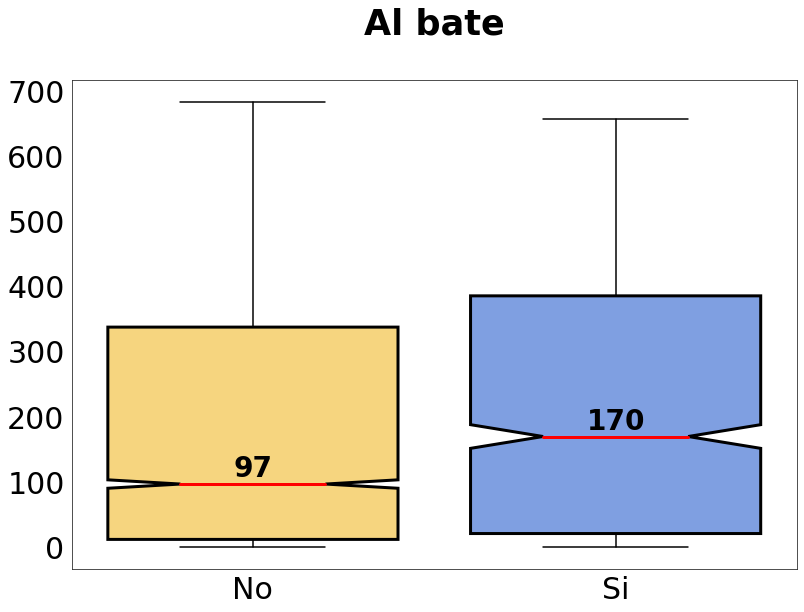

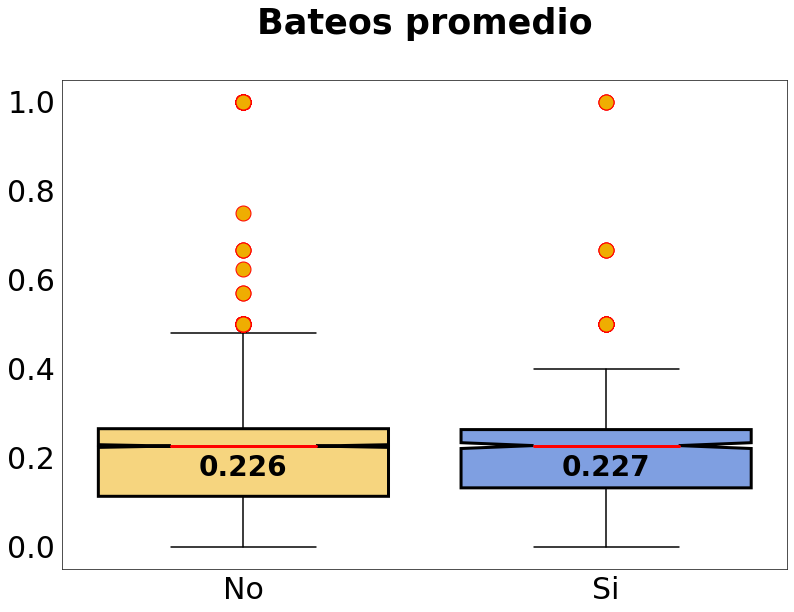

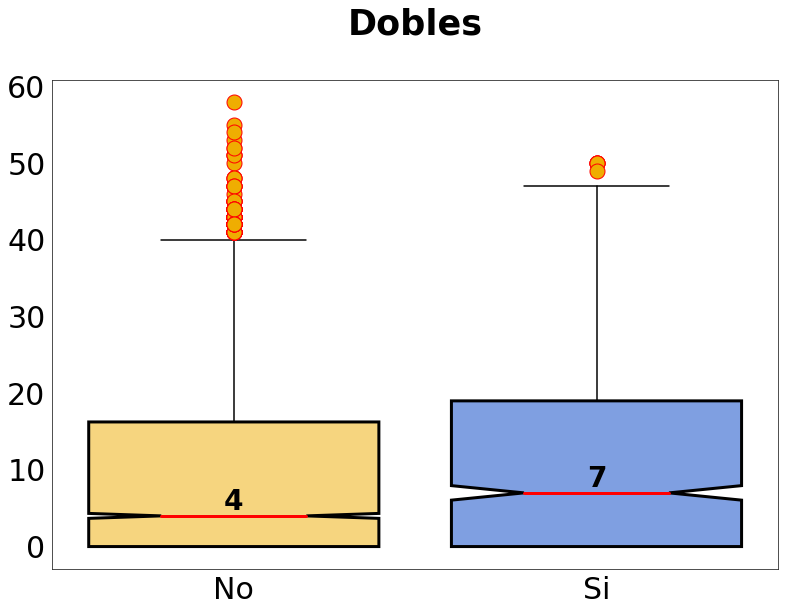

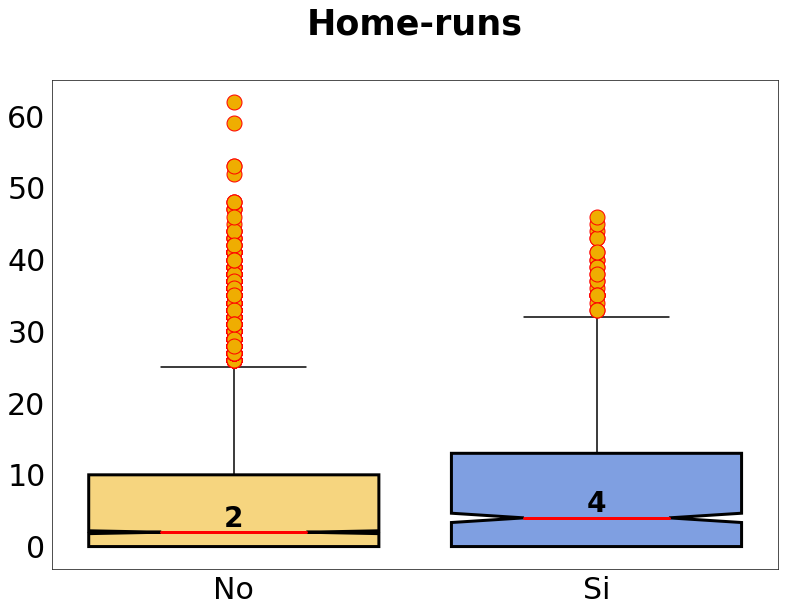

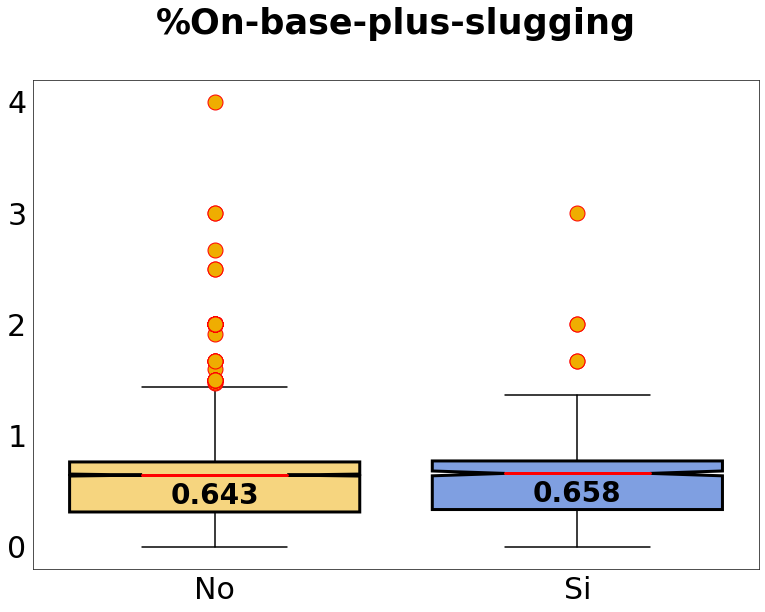

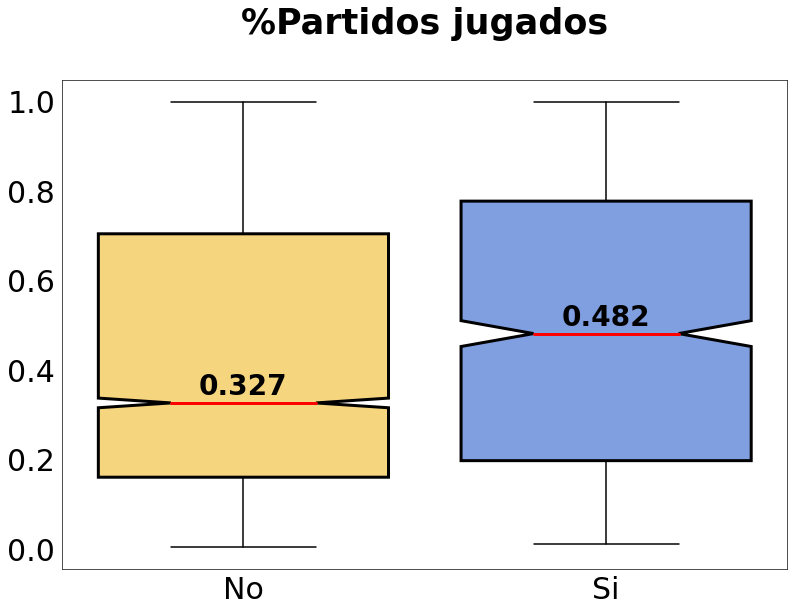

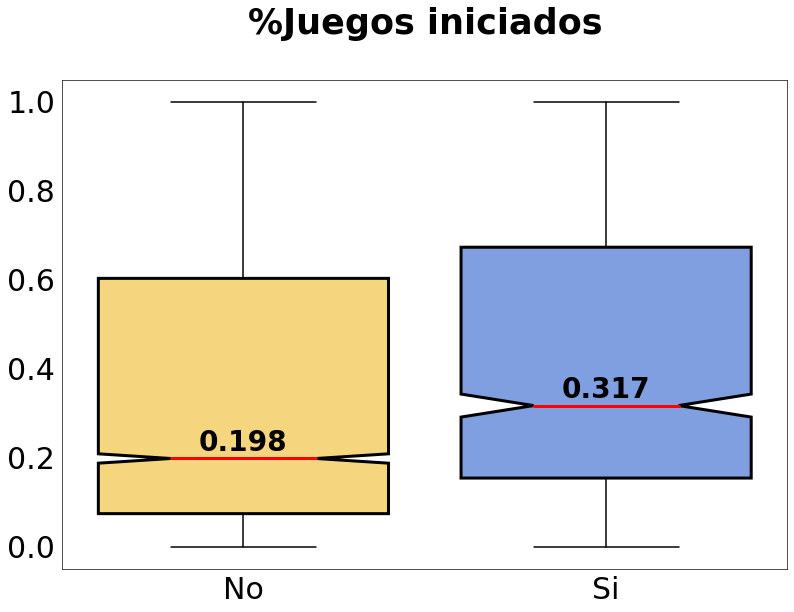

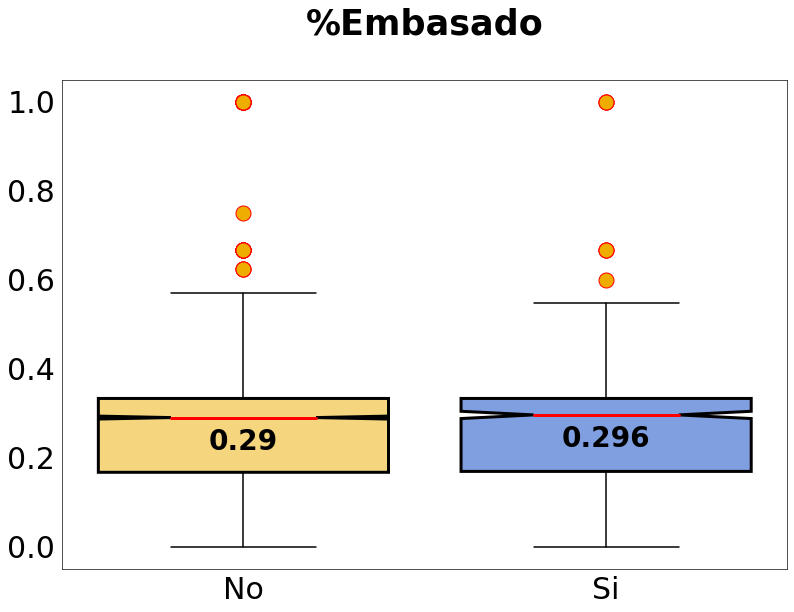

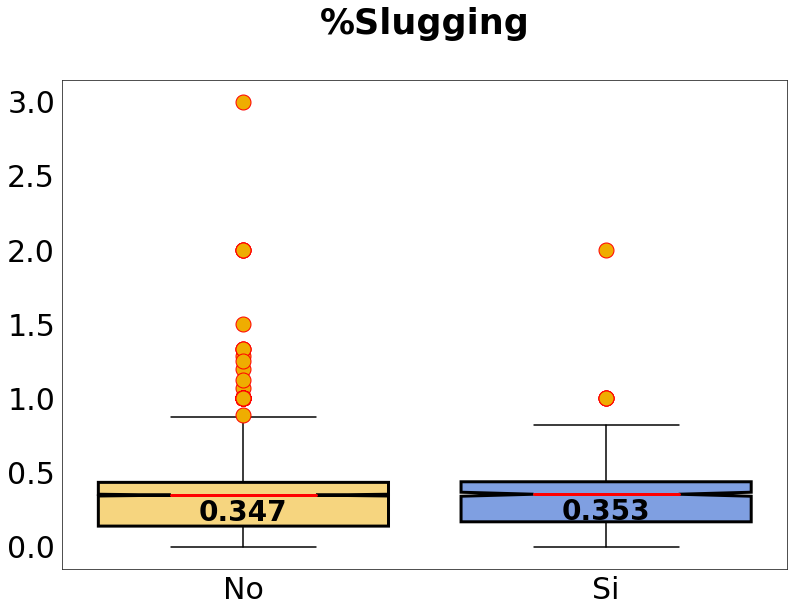

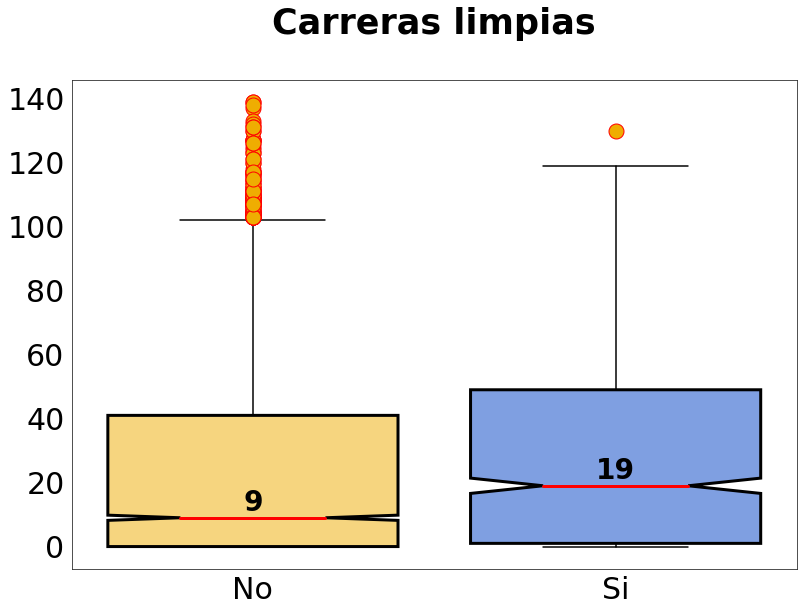

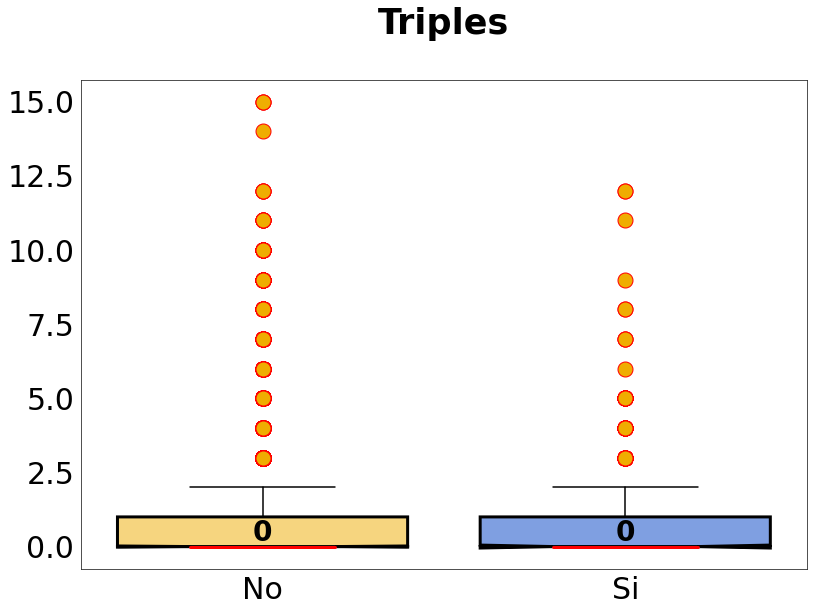

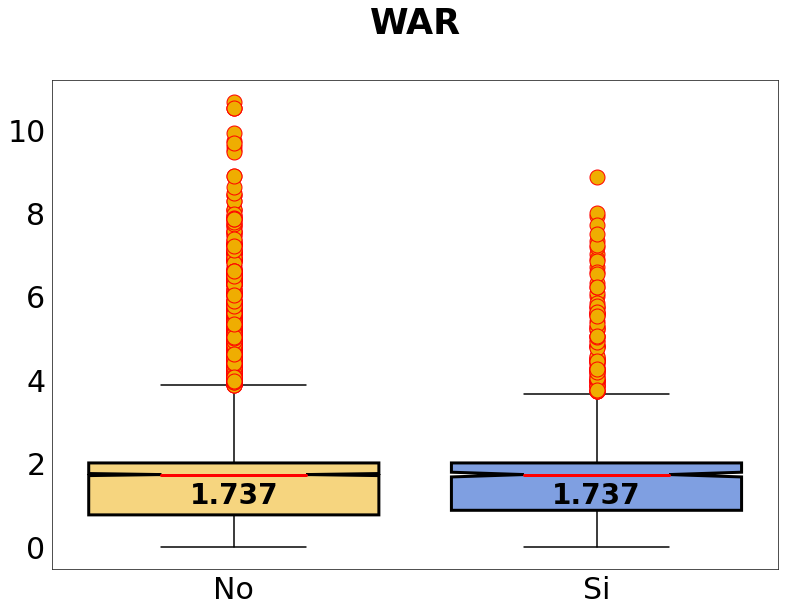

In [16]:
for i in range(0,len(hitter_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (13,9))

    g_1 = sns.boxplot(x = 'agente_libre',
                      y = hitter_statistics[i],
                      data = df_panel_hitter, 
                      notch = True, 
                      **kws_1)
    g_1.set_title(hitter_labels[i] + '\n',
                  fontsize = 35,
                  fontweight = 'bold',
                  color = 'black')
    g_1.set_ylabel(hitter_labels[i],
                   fontsize = 26,
                   fontweight = 'bold',
                   color = 'black')
    g_1.set_xlabel('Agentes libres',
                   fontsize = 18,
                   fontweight = 'bold',
                   color = 'black')  
    g_1.tick_params(labelsize = 30,
                    labelcolor = 'black')
    g_1.set(xlabel = None)
    g_1.set(ylabel = None)
    """g_1.grid(color = 'navy',
             linestyle = '-',
             alpha = 0.4)"""

    mybox = g_1.artists[1]

    # Change the appearance of that box
    mybox.set_facecolor((0/255,64/255,196/255,0.5))

    medians = df_panel_hitter.groupby(['agente_libre'])[hitter_statistics[i]].median()
    medians[0] = round(medians[0], 3)
    medians[1] = round(medians[1], 3)
    vertical_offset = df_panel_hitter[hitter_statistics[i]].median()

    for xtick in g_1.get_xticks():
        g_1.text(xtick,
                 medians[xtick] + vertical_offset*hitter_positions[i]
                 + hitter_positions_adjustment[i],
                 medians[xtick], 
                 horizontalalignment = 'center',
                 size = 28,
                 color = 'black',
                 weight = 'bold')
    g_1.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Hitters/Boxplot/YA/boxplot_hitter_" + str(hitter_labels_save[i]).lower() + ".pdf",
                format = "pdf")

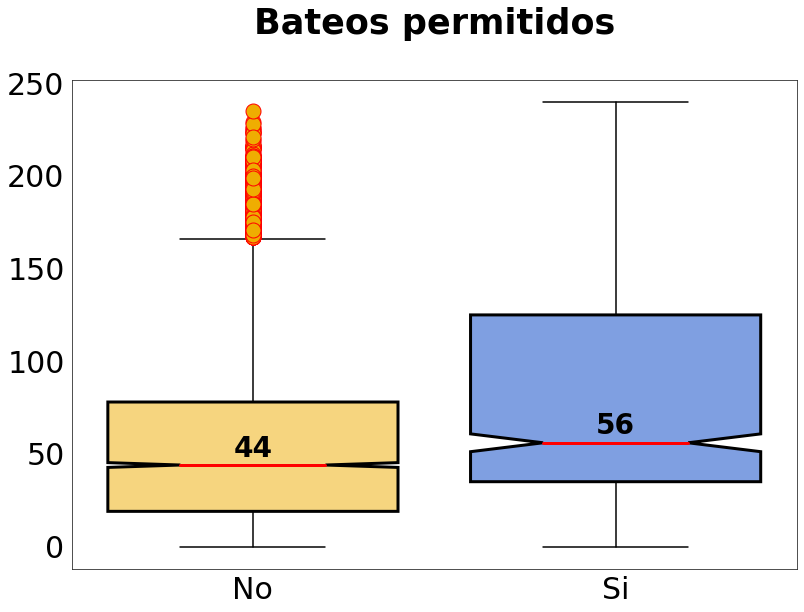

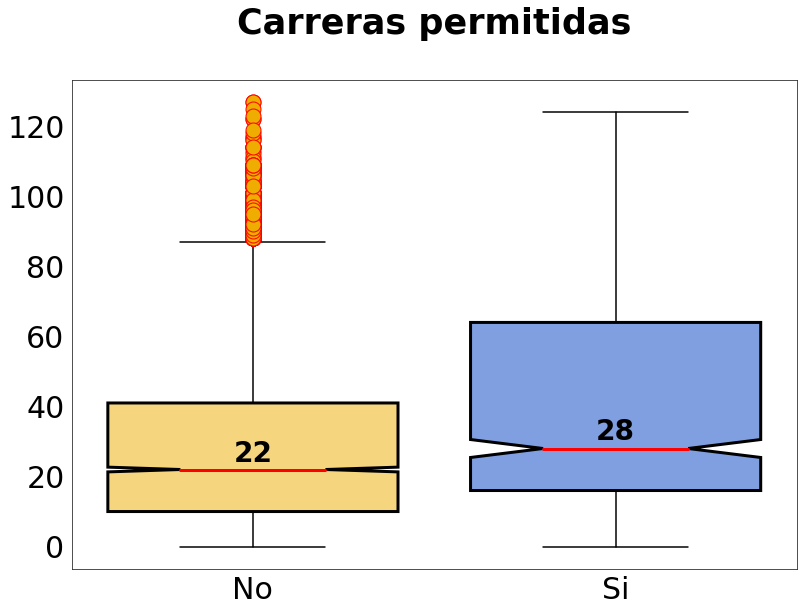

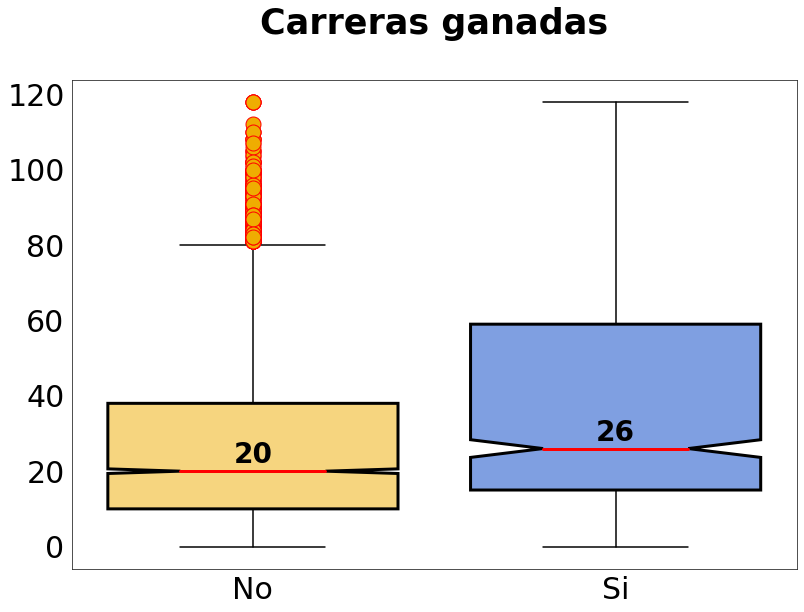

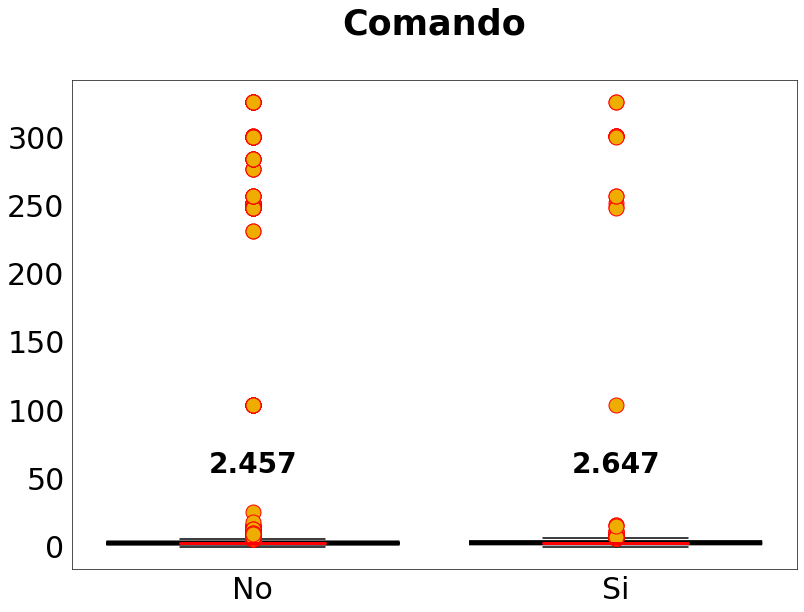

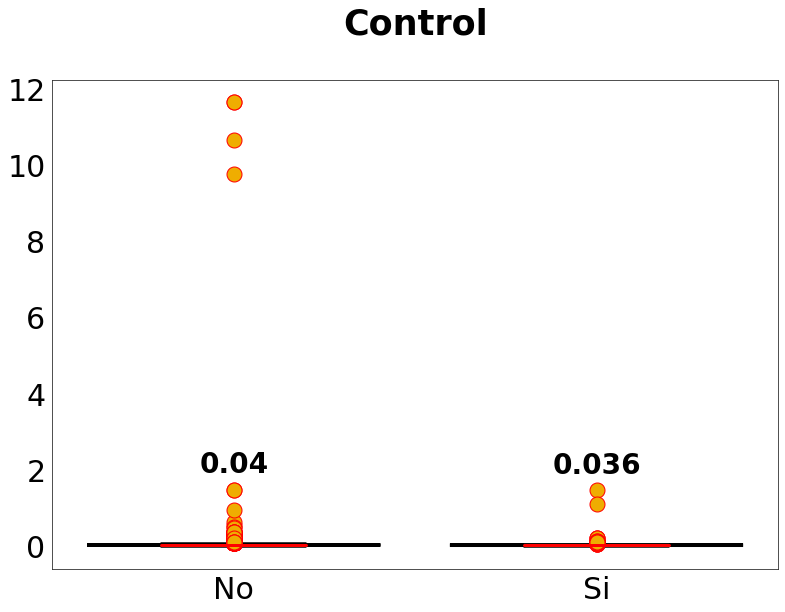

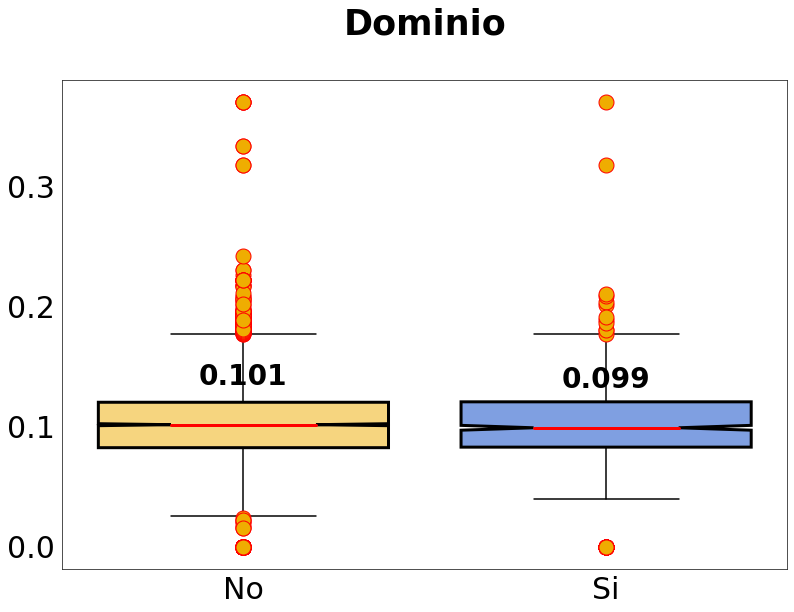

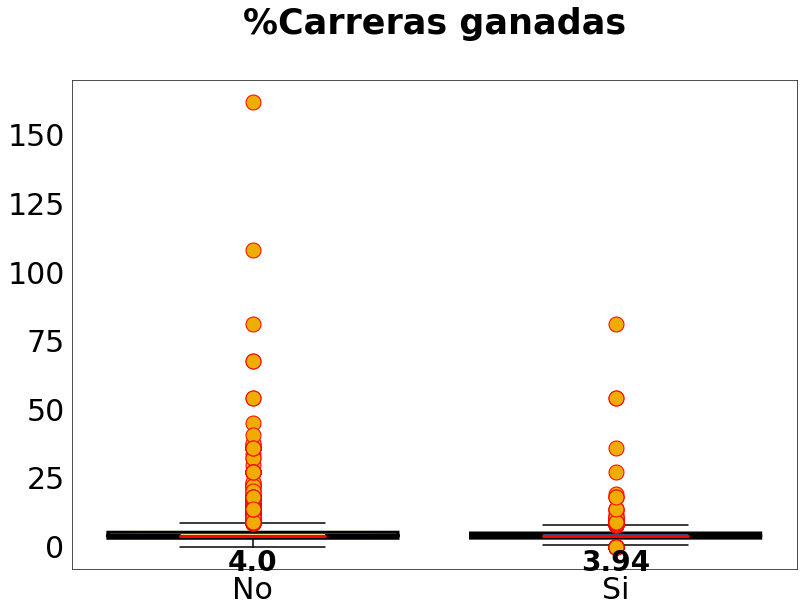

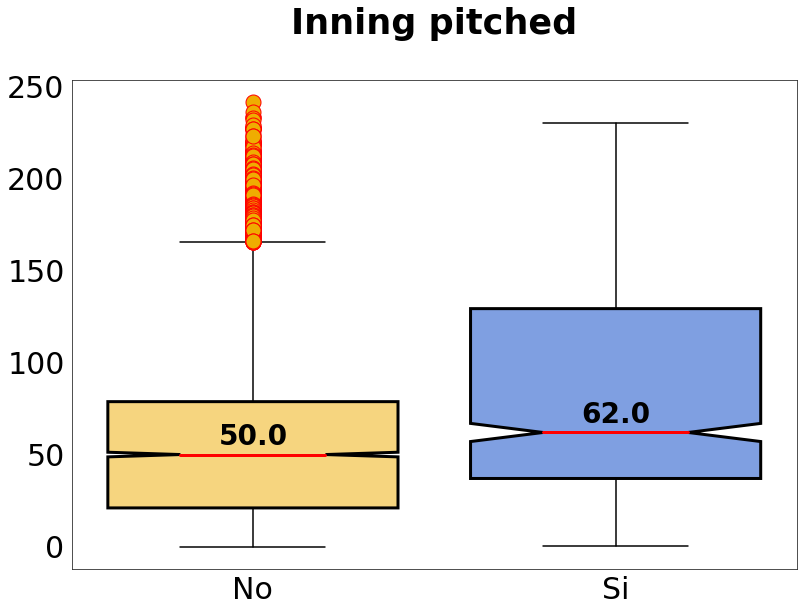

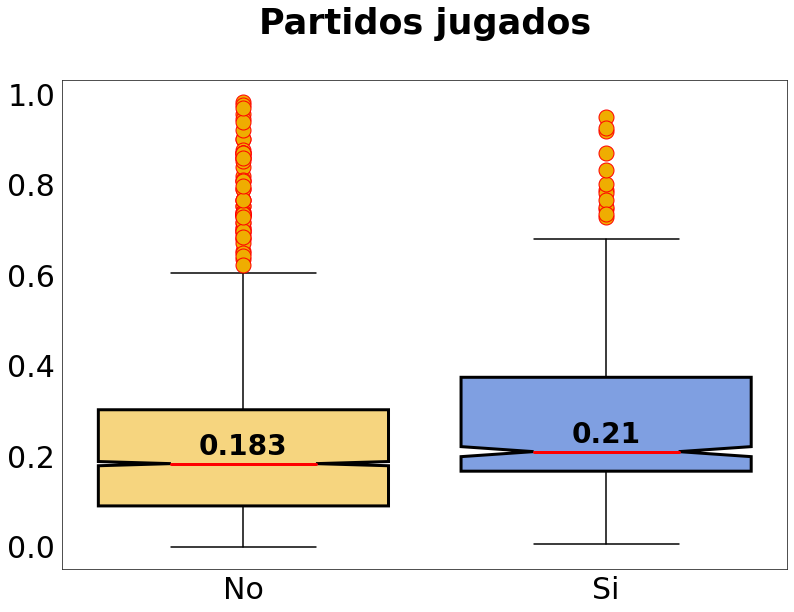

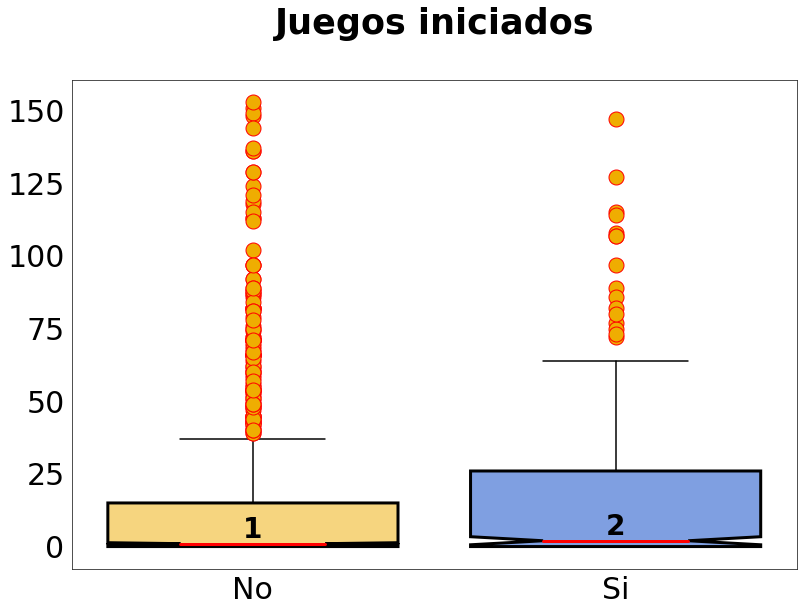

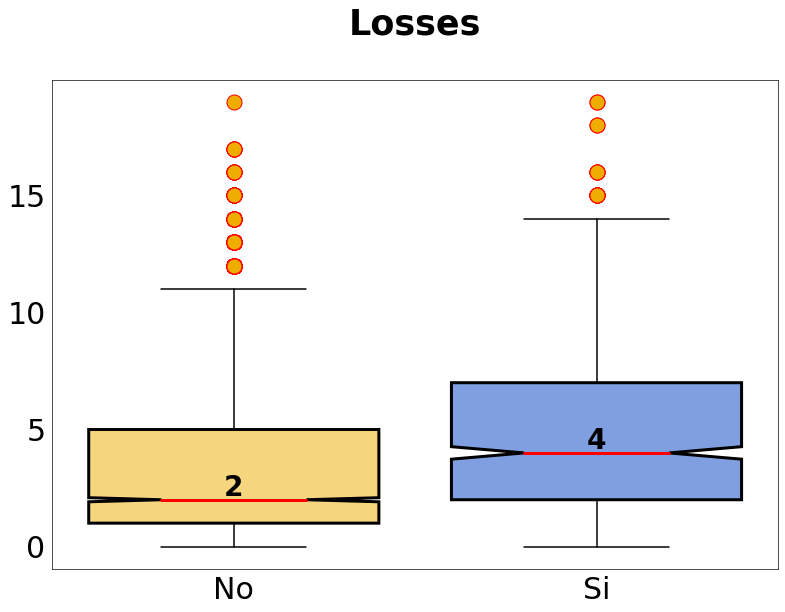

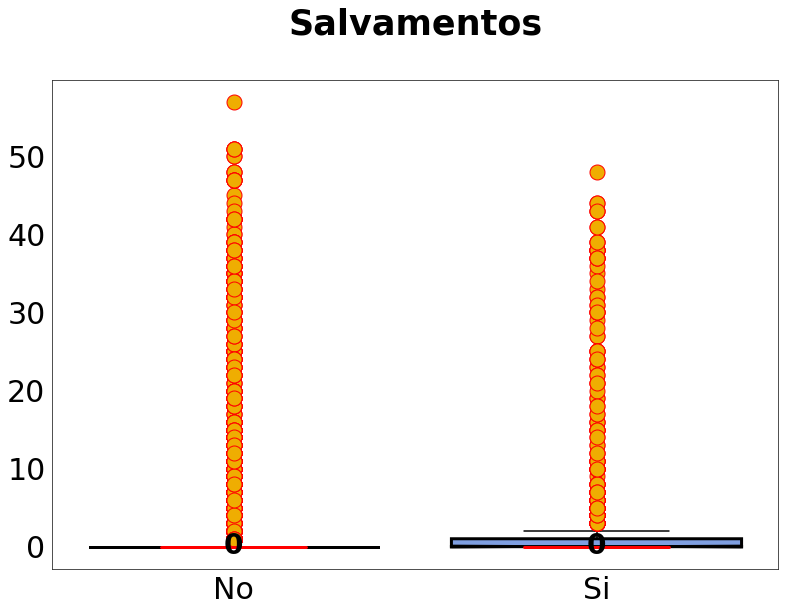

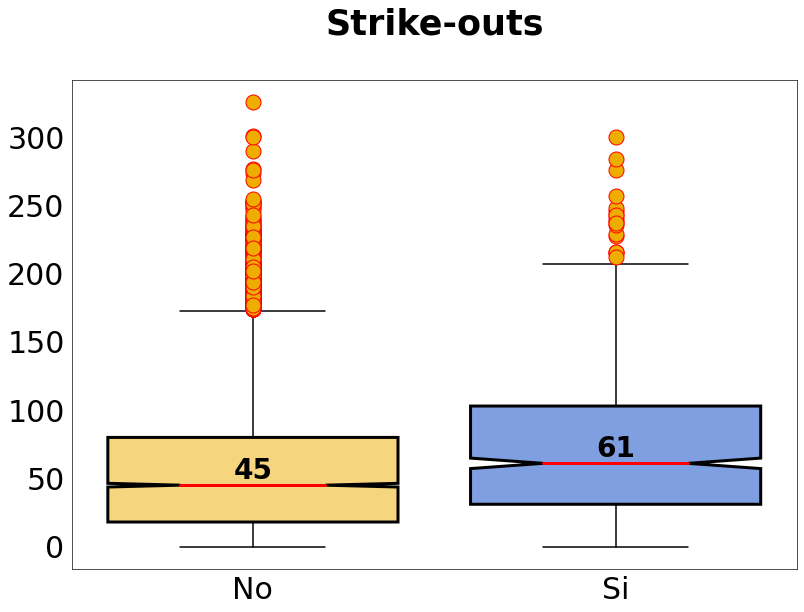

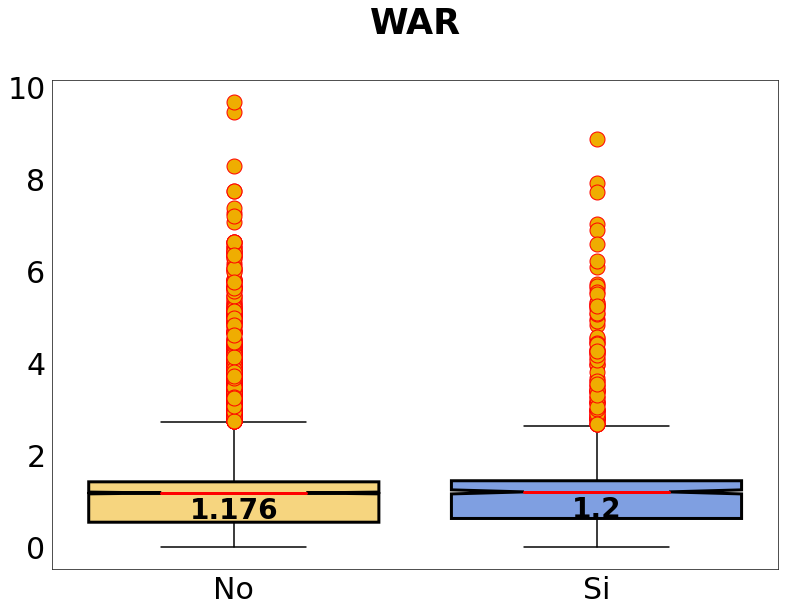

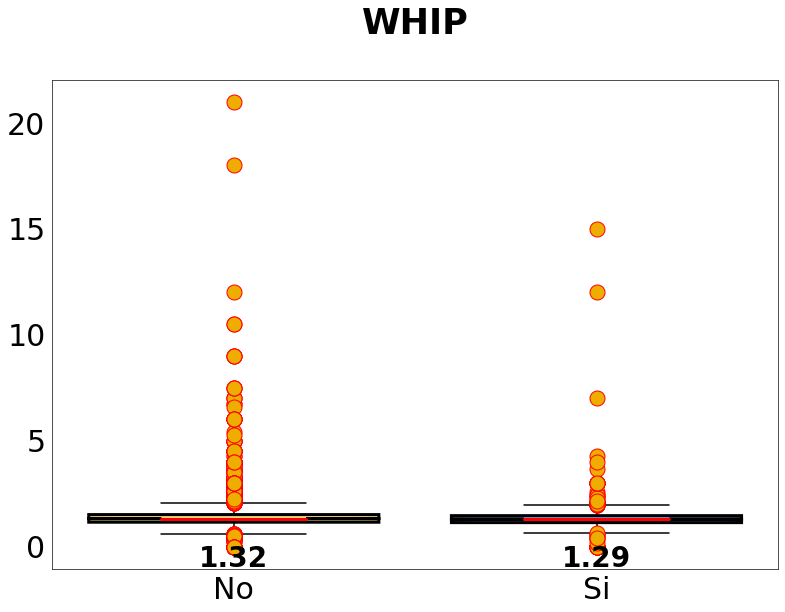

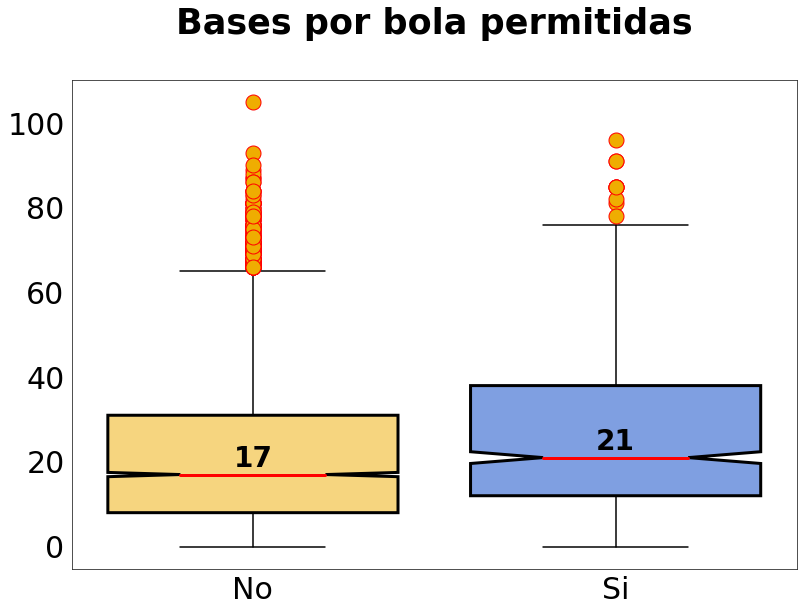

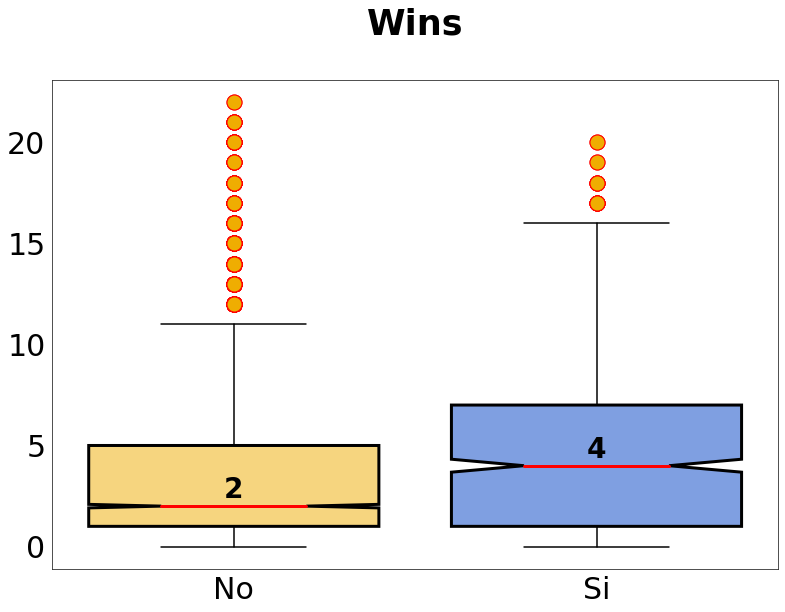

In [17]:
for i in range(0,len(pitcher_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (13,9))

    g_1 = sns.boxplot(x = 'agente_libre',
                      y = pitcher_statistics[i],
                      data = df_panel_pitcher, 
                      notch = True, 
                      **kws_1)
    g_1.set_title(pitcher_labels[i] + '\n',
                  fontsize = 35,
                  fontweight = 'bold',
                  color = 'black')
    g_1.set_ylabel(pitcher_labels[i],
                   fontsize = 26,
                   fontweight = 'bold',
                   color = 'black')
    g_1.set_xlabel('Agentes libres',
                   fontsize = 19,
                   fontweight = 'bold',
                   color = 'black')  
    g_1.tick_params(labelsize = 30,
                    labelcolor = 'black')
    g_1.set(xlabel = None)
    g_1.set(ylabel = None)
    """g_1.grid(color = 'navy',
             linestyle = '-',
             alpha = 0.8)"""

    mybox = g_1.artists[1]

    # Change the appearance of that box
    mybox.set_facecolor((0/255,64/255,196/255,0.5))

    medians = df_panel_pitcher.groupby(['agente_libre'])[pitcher_statistics[i]].median()
    medians[0] = round(medians[0], 3)
    medians[1] = round(medians[1], 3)
    vertical_offset = df_panel_pitcher[pitcher_statistics[i]].median()

    for xtick in g_1.get_xticks():
        g_1.text(xtick,
                 medians[xtick] + vertical_offset*pitcher_positions[i] + pitcher_positions_adjustment[i],
                 medians[xtick], 
                 horizontalalignment = 'center',
                 size = 28,
                 color = 'black',
                 weight = 'bold')
    g_1.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Pitchers/Boxplot/boxplot_pitcher_" + str(pitcher_labels_save[i]).lower() + ".pdf",
                format = "pdf")

## Series de tiempo

Grafiquemos los promedios a lo largo de las temporadas

In [18]:
temporadas = [str(year) for year in range(2012,2023)]

In [19]:
mean_panel_hitter = df_panel_hitter.groupby(['agente_libre','anio']).mean()
mean_panel_hitter.reset_index(inplace = True)
mean_panel_pitcher = df_panel_pitcher.groupby(['agente_libre','anio']).mean()
mean_panel_pitcher.reset_index(inplace = True)

In [20]:
mean_panel_hitter[mean_panel_hitter['anio'] >= 2018].head()

agente_libre  anio    altura  anio_de_agente_libre  anios_de_contrato  \
7            No  2018  6.190024            521.023140           1.608264   
8            No  2019  6.195250            925.582665           1.581059   
9            No  2020  6.153312           1198.709220           1.826241   
10           No  2021  6.205128            994.175824           1.606227   
11           No  2022  6.073697            838.908333           1.697222   

    antiguedad     at-bats      at-bats_2     bateos     bateos_2  ...  \
7     0.899174  175.674380   71126.434711  43.811570  4853.024793  ...   
8     0.799358  170.412520   67256.508828  43.309791  4808.462279  ...   
9     0.904255  118.900709   18762.141844  29.709220  1249.028369  ...   
10    0.804029  180.300366   71355.721612  44.992674  4851.578755  ...   
11    0.833333  293.880556  119623.269444  72.516667  7754.433333  ...   

     triples  triples_2        tvs  valor_contrato_promedio  \
7   0.899174   3.821488  26.259223             2.762433e+06   
8   0.868379   3.359551  26.043981             2.782540e+06   
9   0.460993   0.879433  30.623511             3.657550e+06   
10  0.780220   2.501832  25.673608             3.215327e+06   
11  1.144444   3.555556  25.072528             3.766648e+06   

    valor_contrato_total  valor_del_contrato  victorias       war     war_2  \
7           5.125649e+07        1.096197e+07  81.087603  1.700222  5.093953   
8           6.266475e+07        1.021746e+07  79.767255  1.809140  5.394078   
9           7.307290e+07        1.472287e+07  29.156028  0.871127  1.147190   
10          4.446282e+07        1.273038e+07  80.065934  1.725723  4.911610   
11          1.081363e+08        1.529377e+07  79.988889  1.819286  5.611448   

    ws ganadas  
7     3.902479  
8     4.070626  
9     4.223404  
10    4.119048  
11    3.722222  

[5 rows x 59 columns]

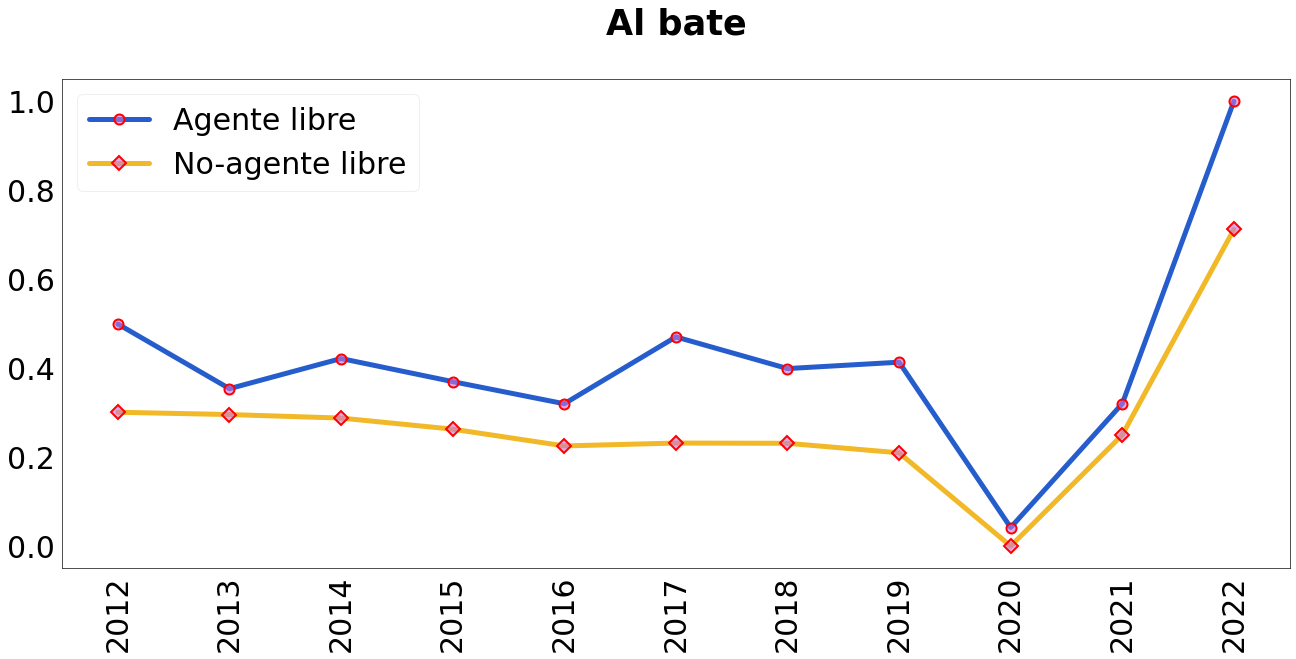

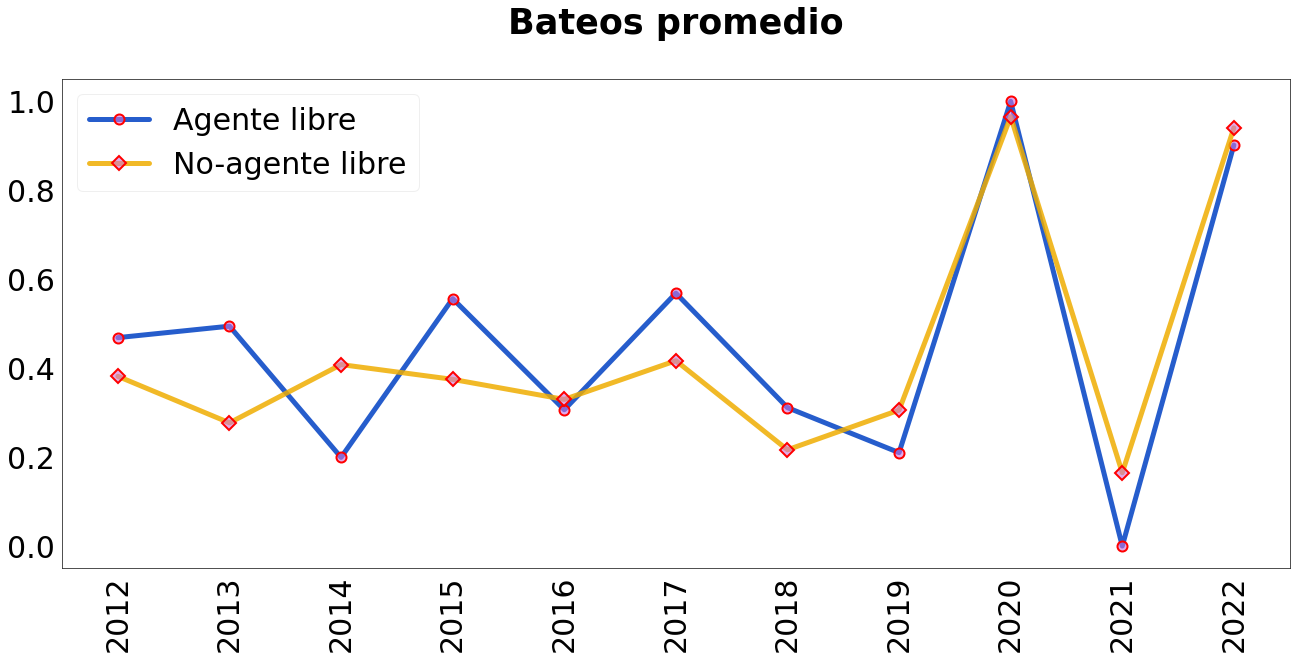

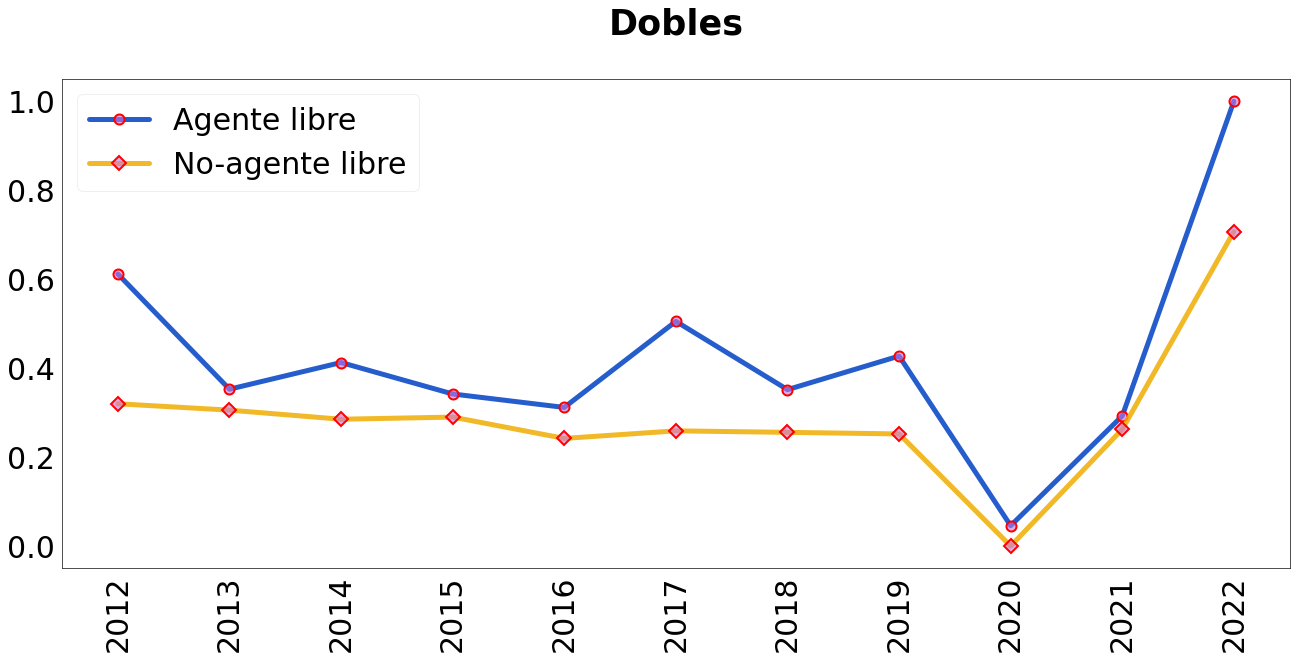

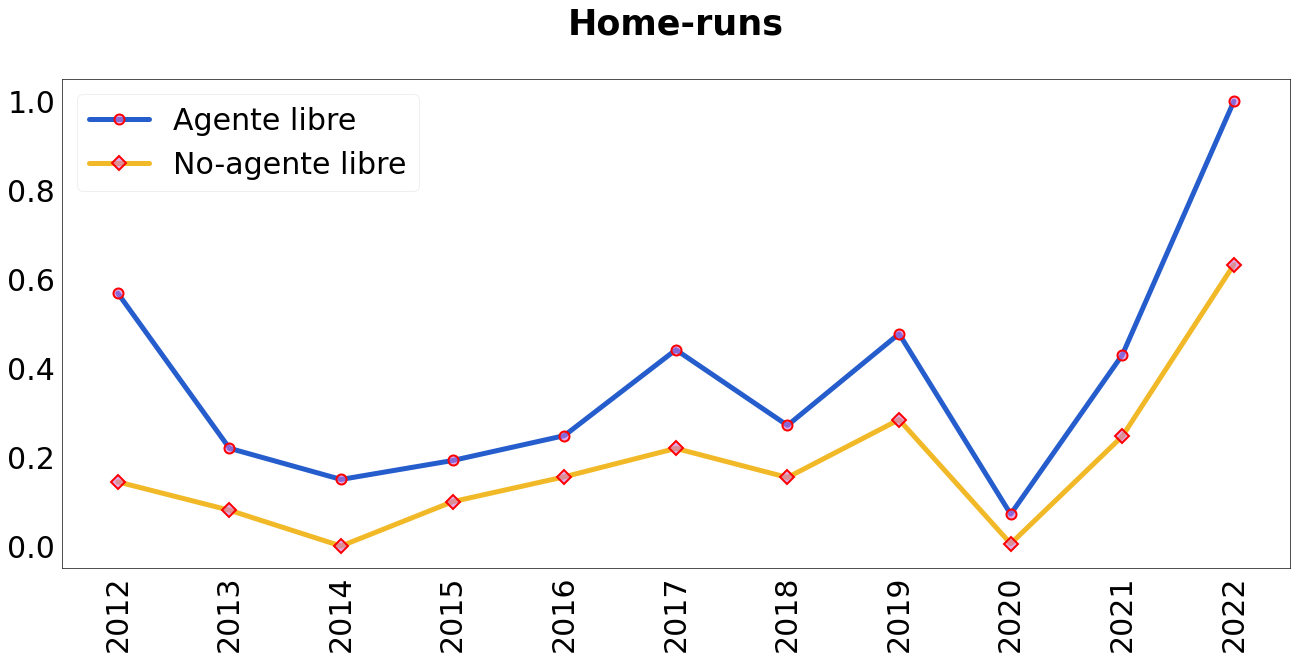

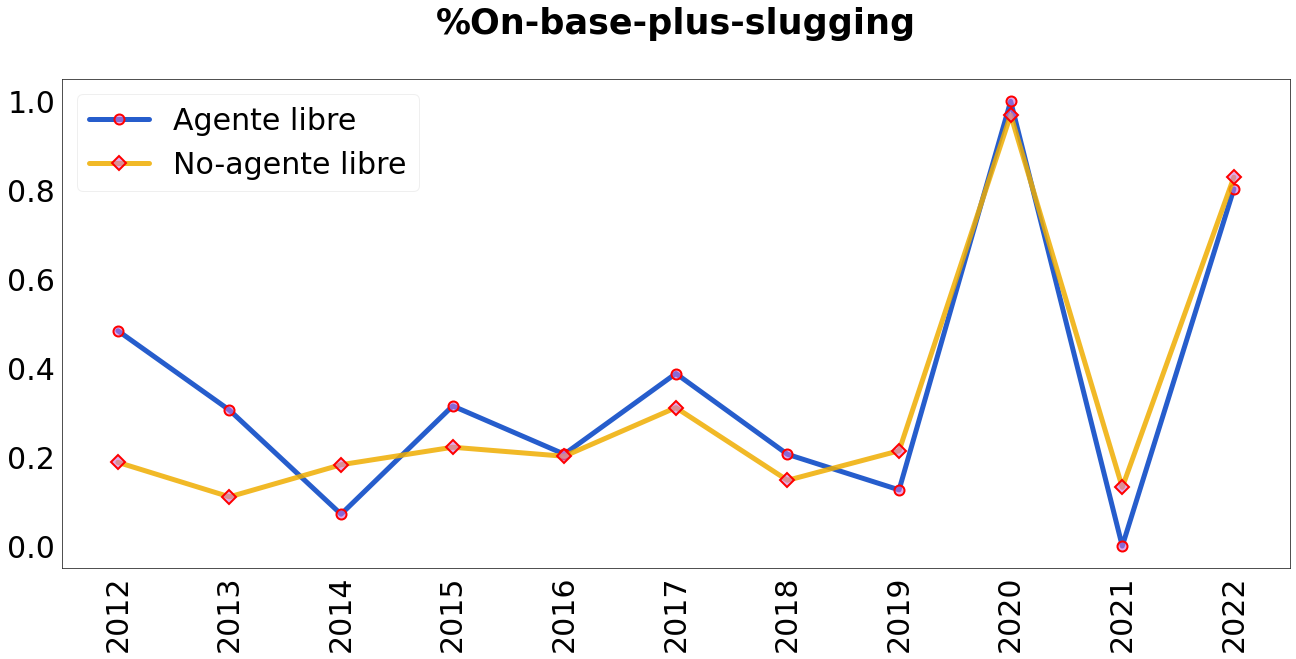

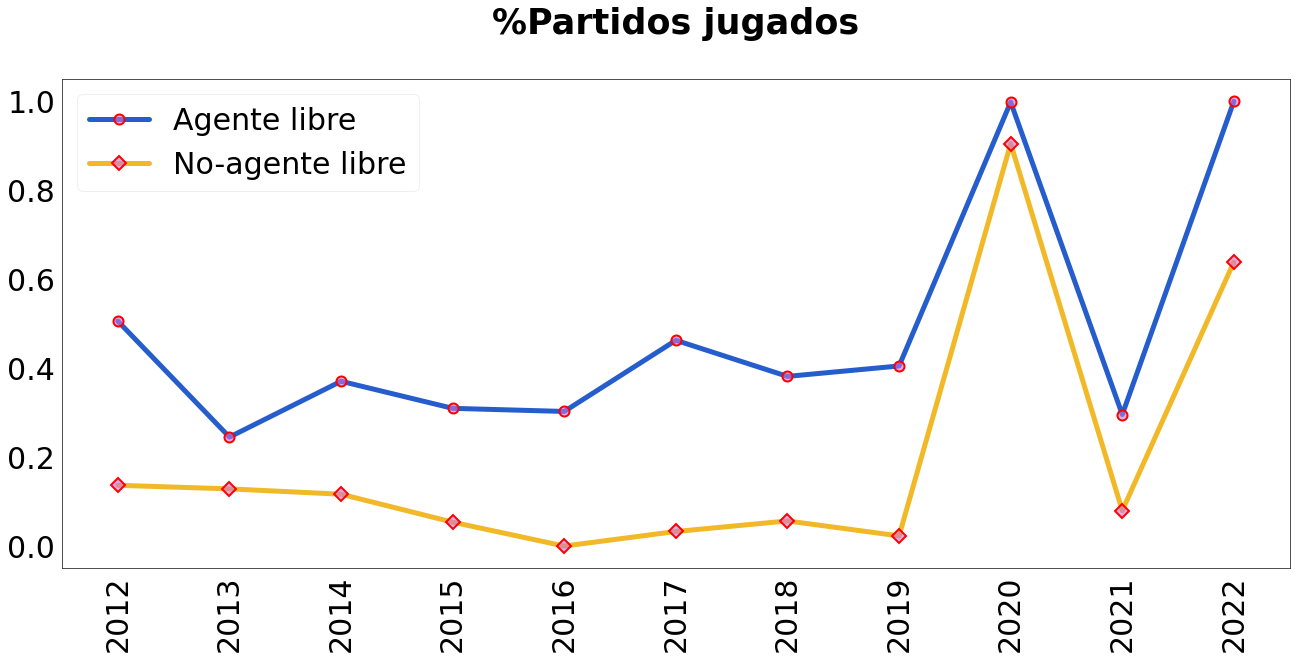

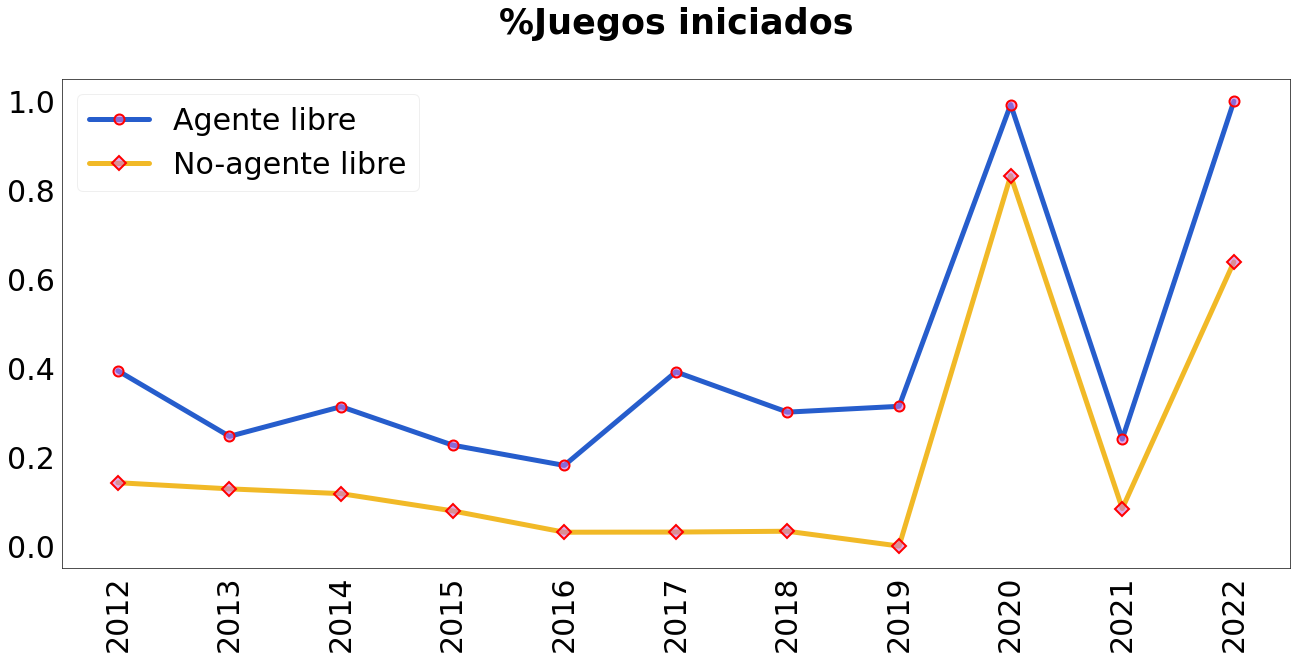

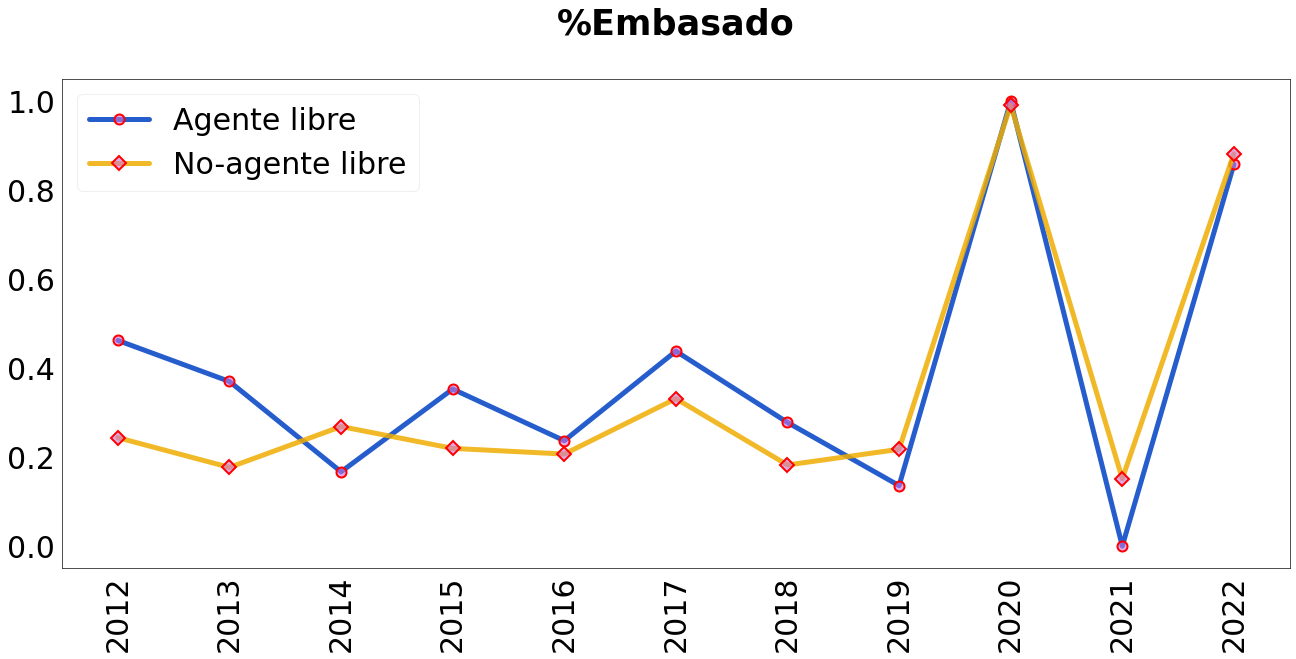

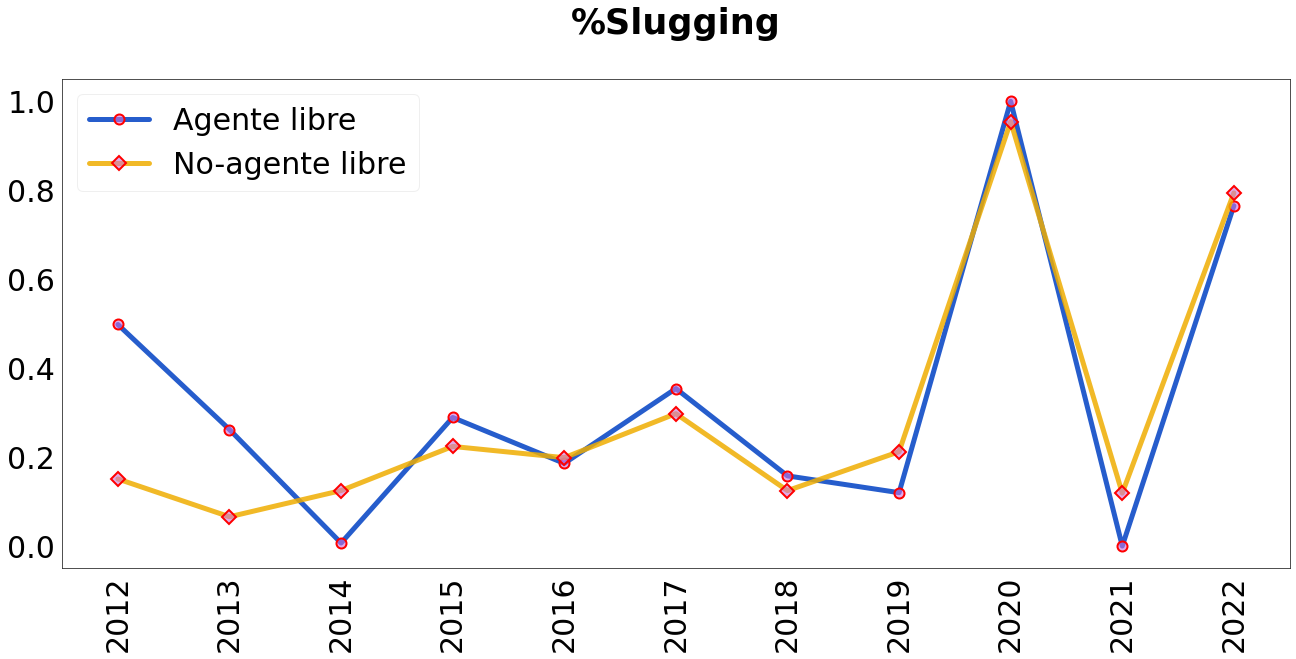

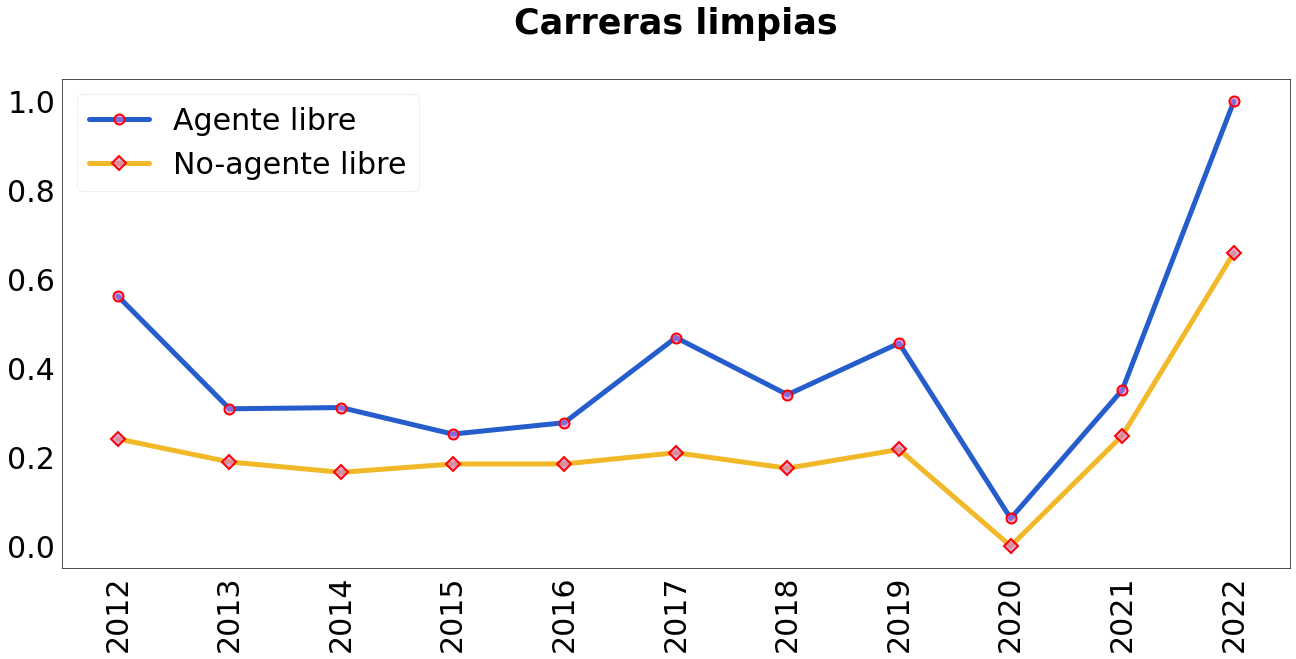

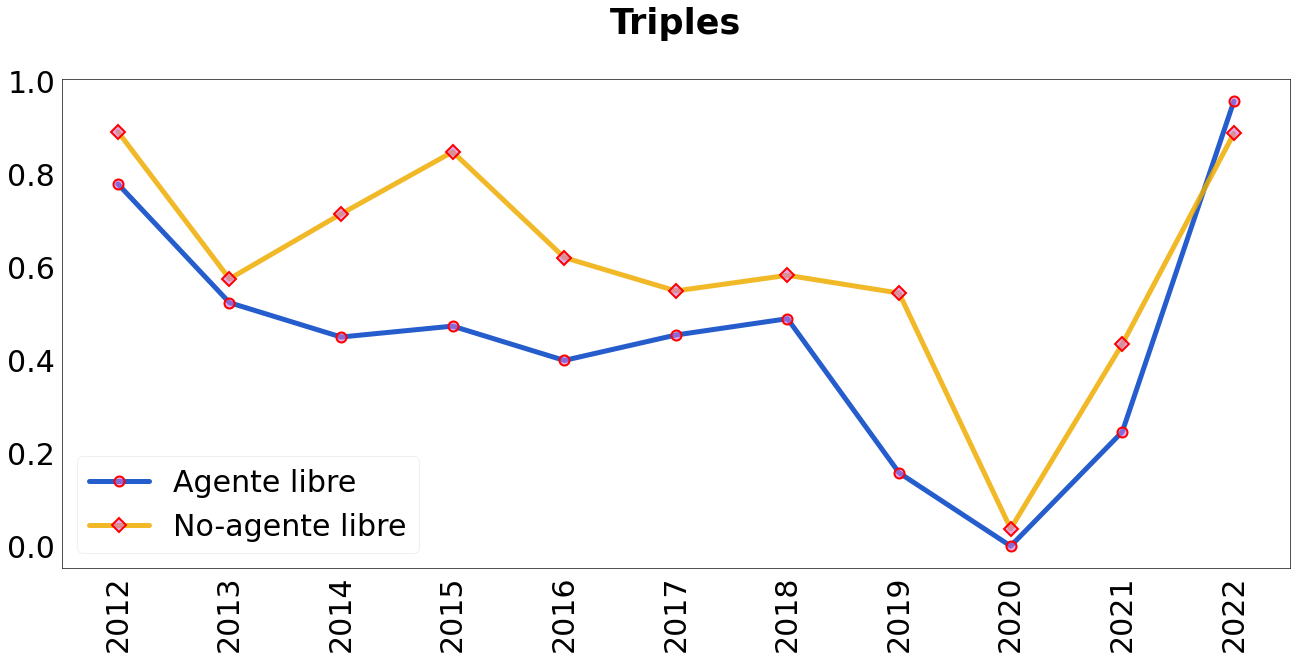

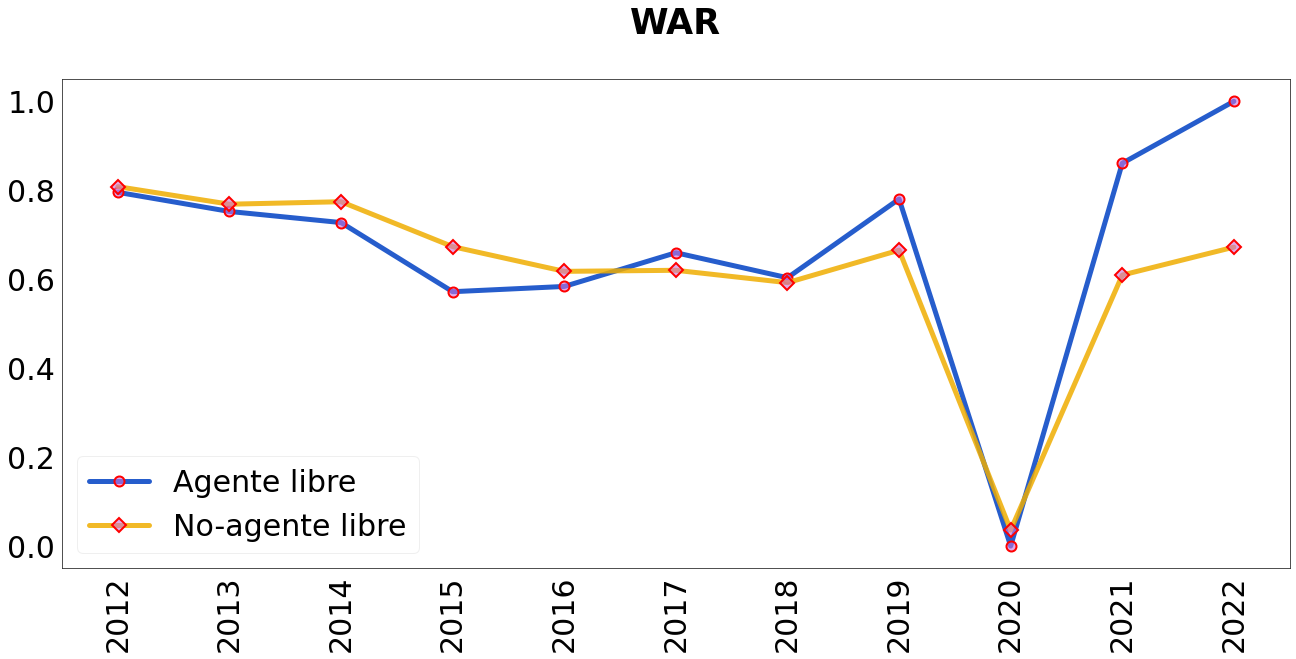

In [21]:
for i in range(0,len(hitter_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (22,9))
    
    # Bases de datos
    mean_hitter_fa = mean_panel_hitter[(mean_panel_hitter['agente_libre'] == 'Si') & (mean_panel_hitter['anio'] > 2011)][hitter_statistics[i]]
    mean_hitter_no = mean_panel_hitter[(mean_panel_hitter['agente_libre'] == 'No') & (mean_panel_hitter['anio'] > 2011)][hitter_statistics[i]]
    # Máximos
    max_hitter = mean_panel_hitter[hitter_statistics[i]].max()
    # Mínimos
    min_hitter = mean_panel_hitter[hitter_statistics[i]].min()
    # Bases normalizadas
    normalized_fa = (mean_hitter_fa - min_hitter)/(max_hitter - min_hitter)
    normalized_no = (mean_hitter_no - min_hitter)/(max_hitter - min_hitter)
    
    axes.plot(temporadas,
              normalized_fa,
              color = (0/255,64/255,196/255,0.85),
              markerfacecolor = (205/255,114/255,220/255,0.6),
              marker = 'o',
              markersize = 10,
              markeredgecolor = 'red',
              markeredgewidth = 2,
              linewidth = 5,
              label = 'Agente libre')
    axes.plot(temporadas,
              normalized_no,
              color = (239/255,173/255,1/255,0.85),
              markerfacecolor = (205/255,114/255,220/255,0.6),
              marker = 'D',
              markersize = 10,
              markeredgecolor = 'red',
              markeredgewidth = 2,
              linewidth = 5,
              label = 'No-agente libre')
    axes.set_title(hitter_labels[i] + '\n',
                   fontsize = 35,
                   fontweight = 'bold',
                   color = 'black')
    axes.set_xlabel('Temporadas',
                    fontsize = 16,
                    color = 'black',
                    fontweight = 'bold')
    axes.set_ylabel(hitter_labels[i], 
                    fontsize = 26,
                    color = 'black',
                    fontweight = 'bold')
    axes.tick_params(labelsize = 30,
                     labelcolor = 'black')
    axes.tick_params(axis = 'x',
                     labelrotation = 90)
    legend = plt.legend(loc = 'best', 
                    labelcolor = 'black', 
                    fontsize = 30,
                    facecolor = 'white',
                    framealpha = 0.3,
                    fancybox = True,
                    frameon = True)
    axes.set(xlabel = None)
    axes.set(ylabel = None)
    axes.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Hitters/Line_plot/YA/plot_hitter_" + str(hitter_labels_save[i]).lower() + ".pdf",
                format = "pdf")

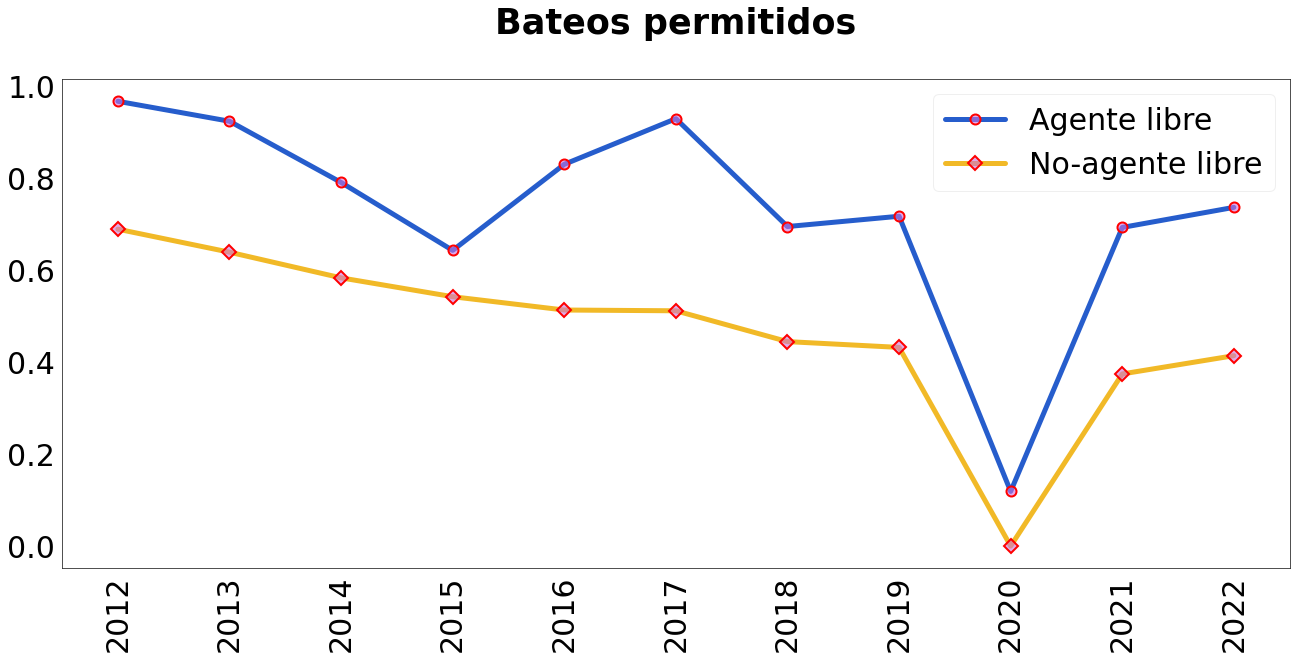

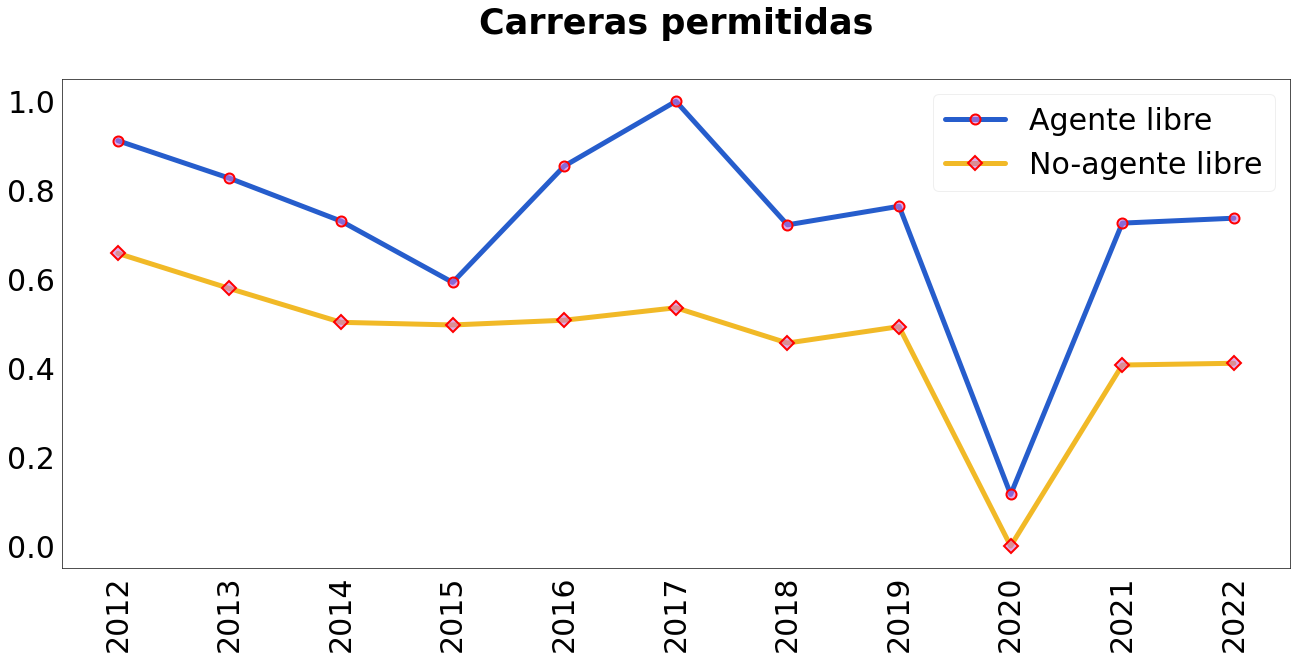

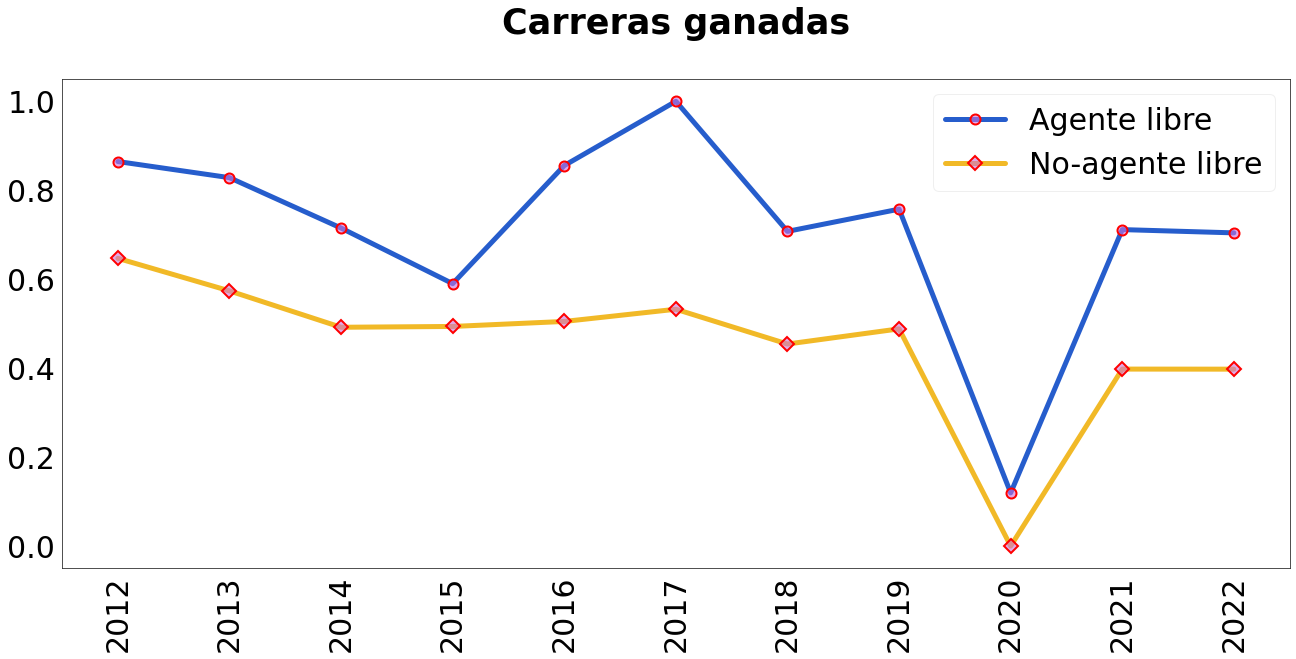

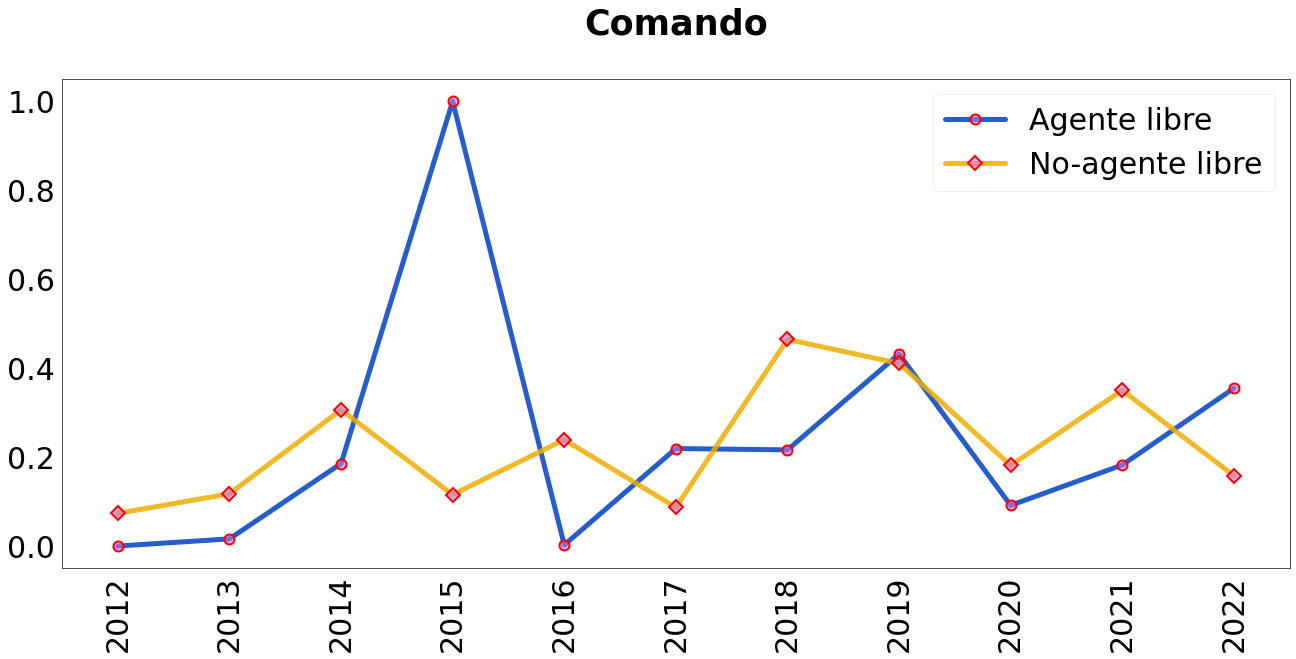

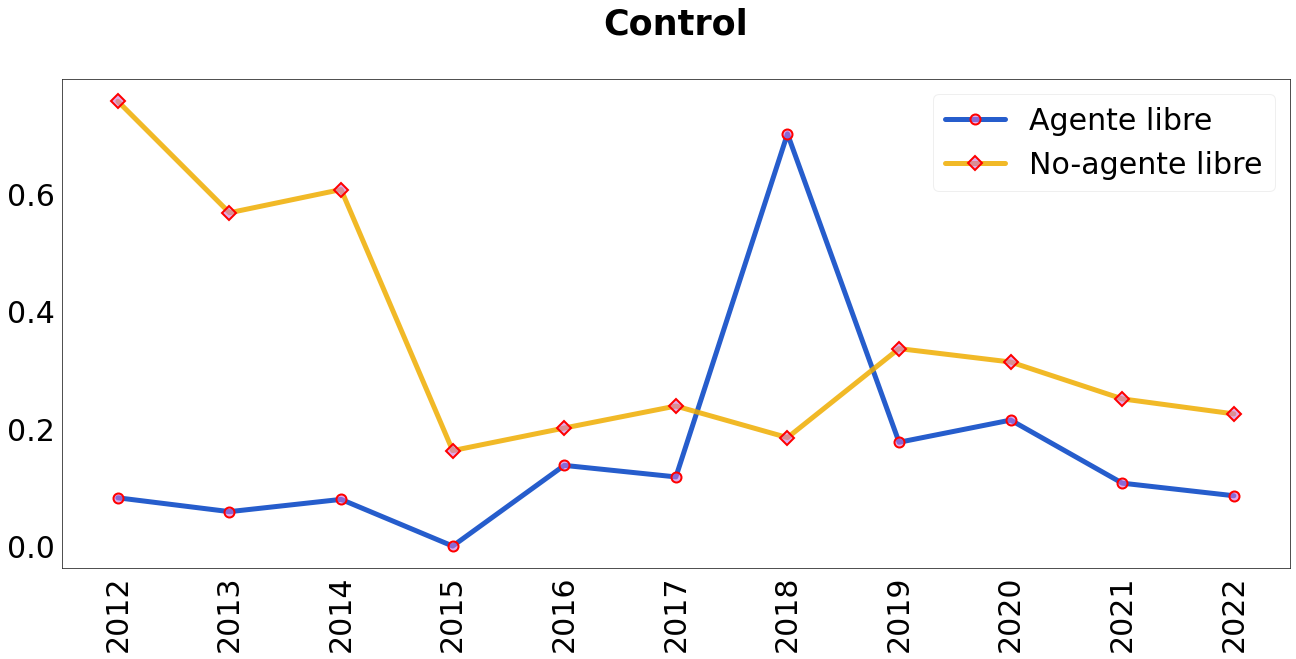

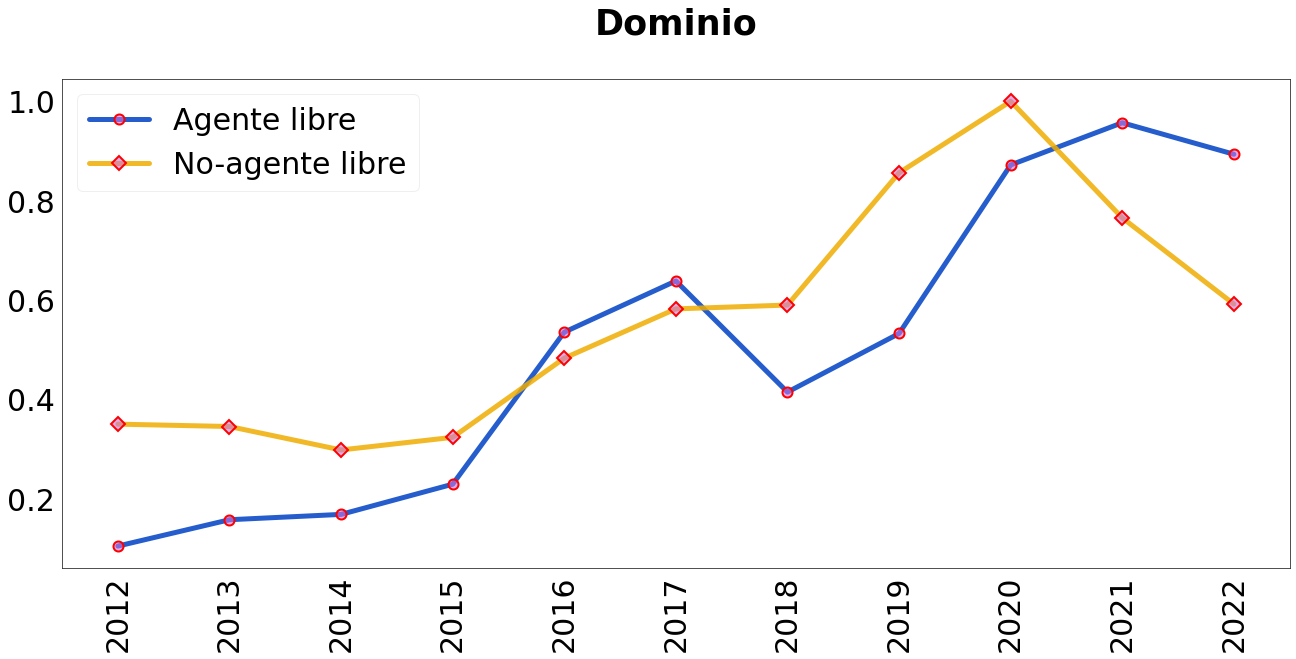

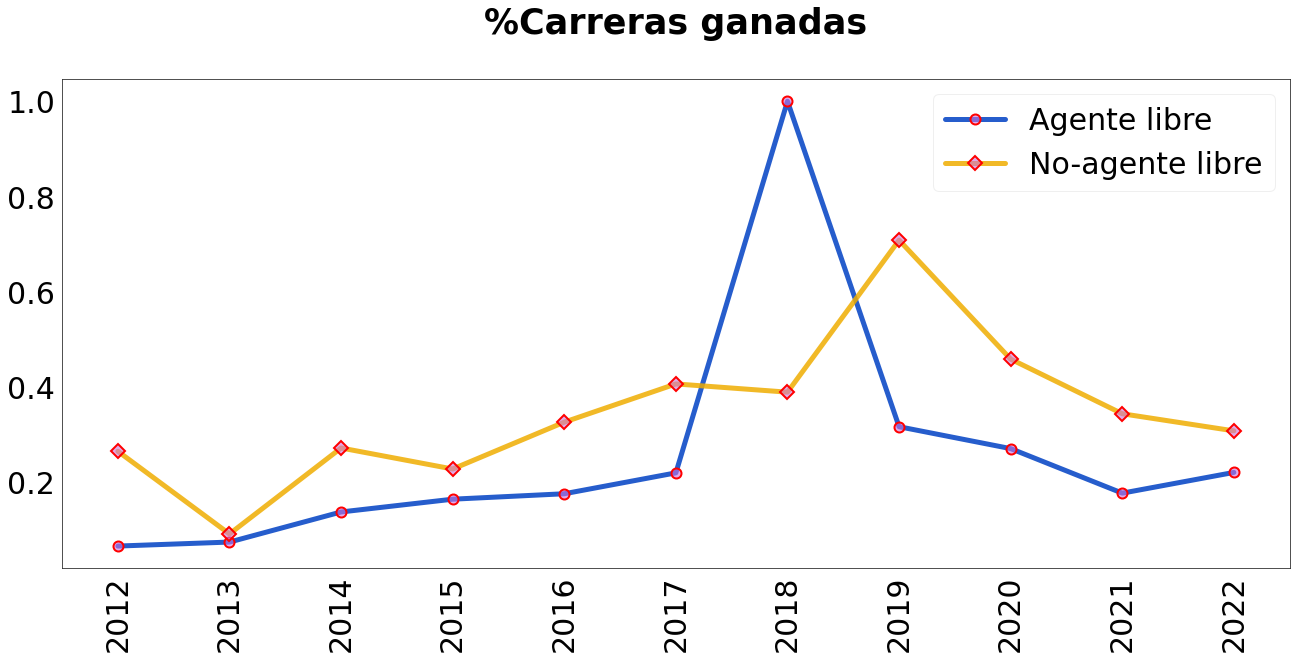

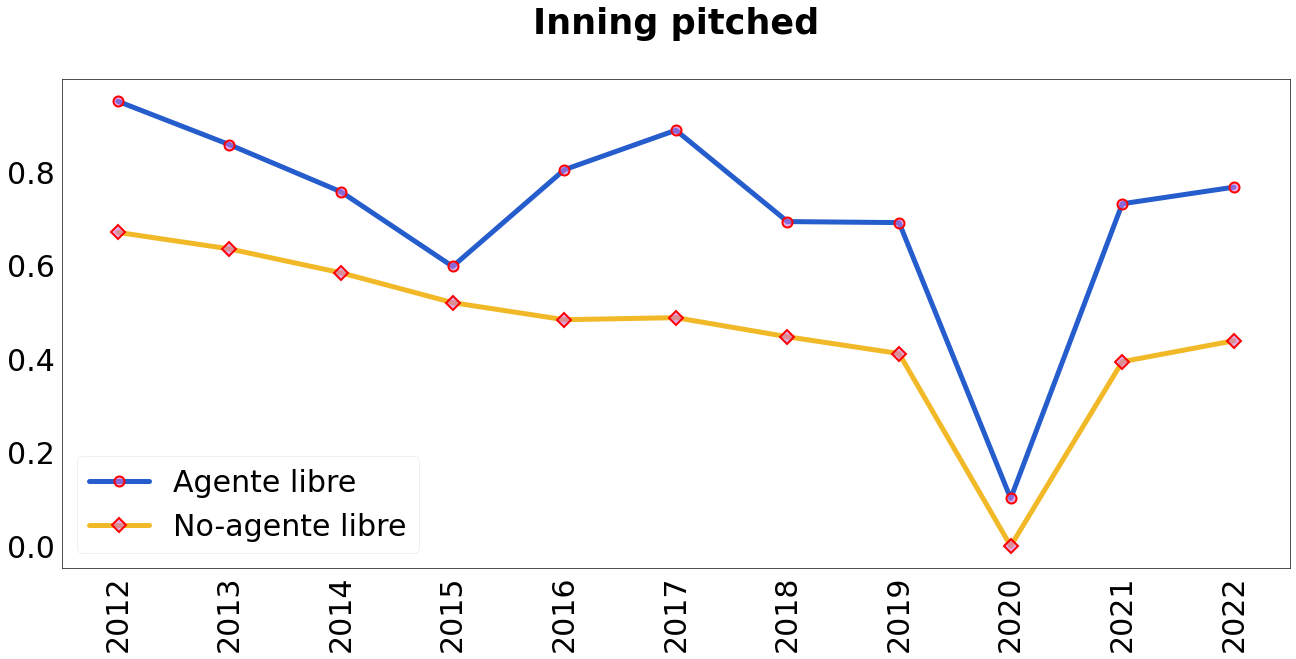

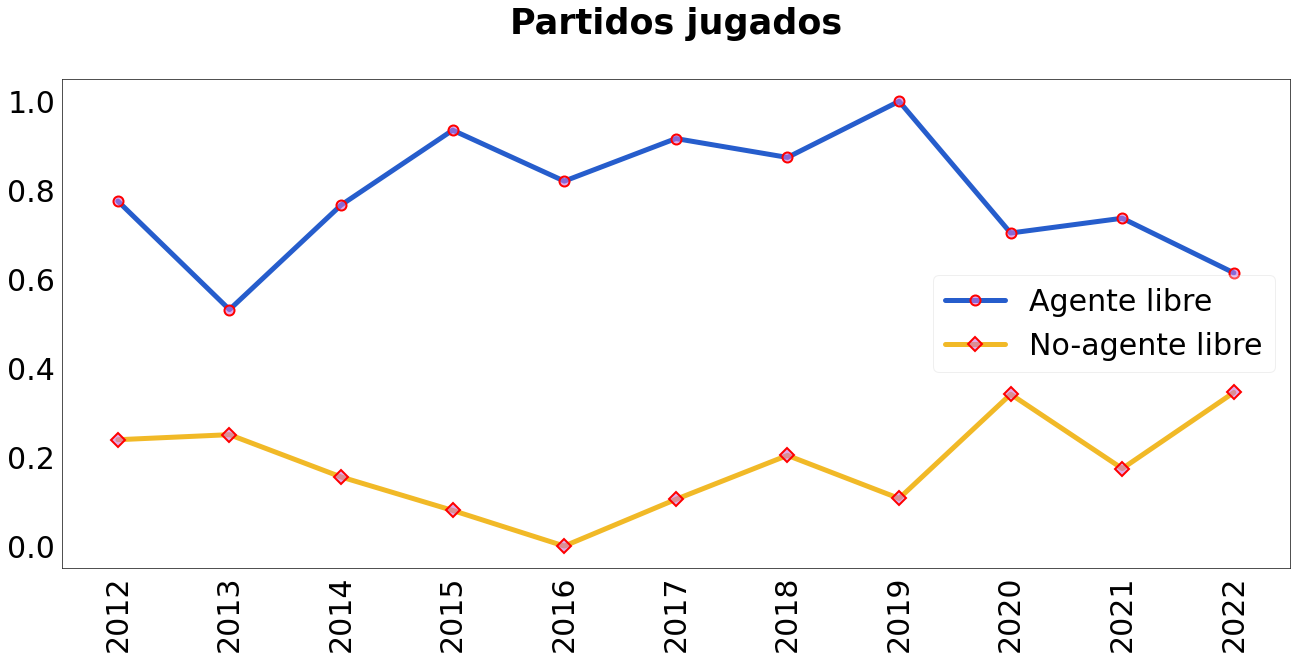

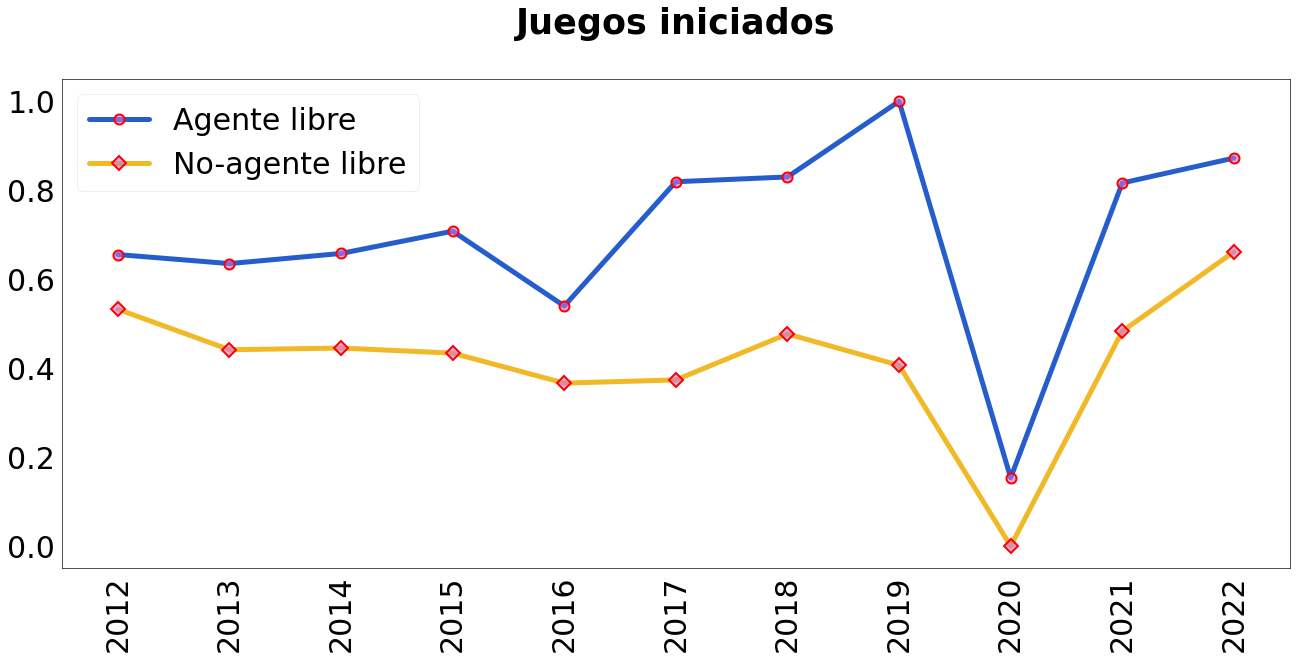

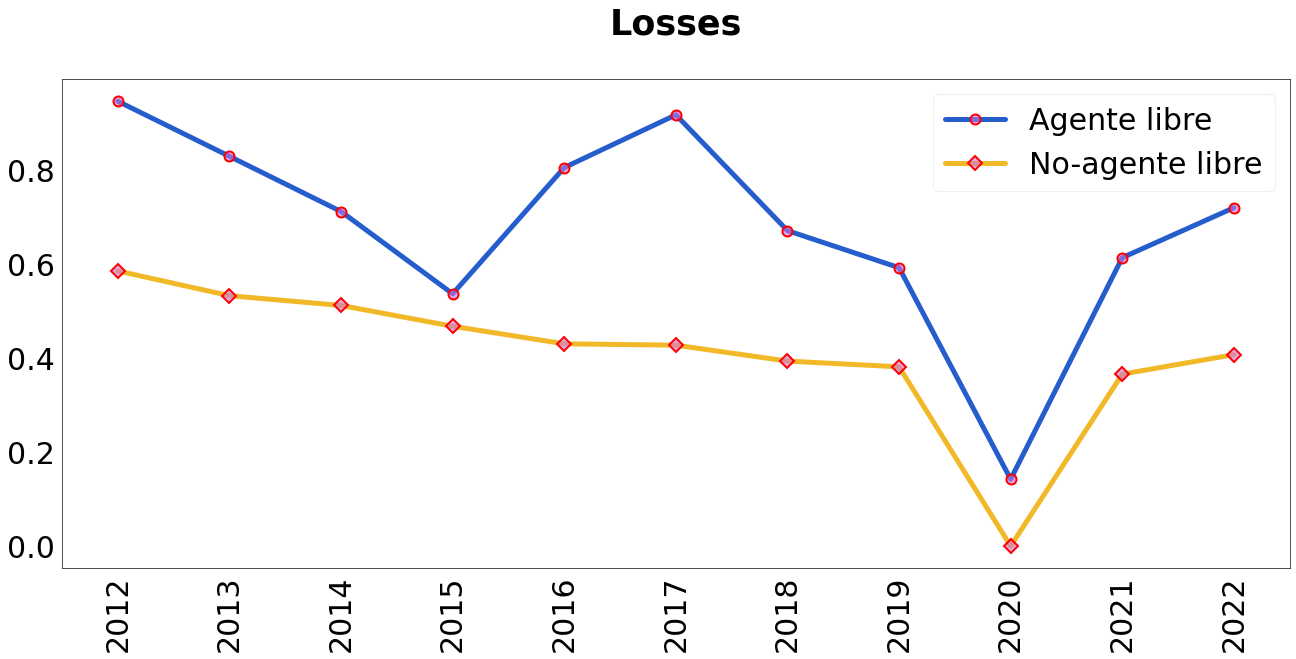

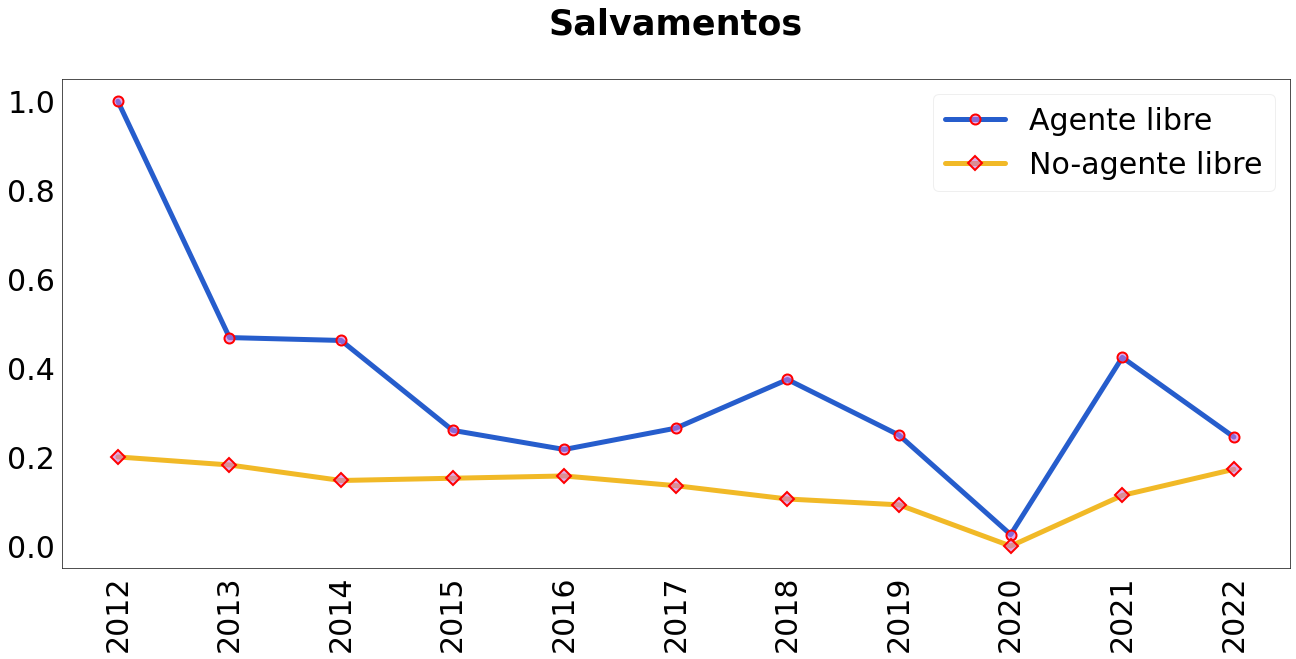

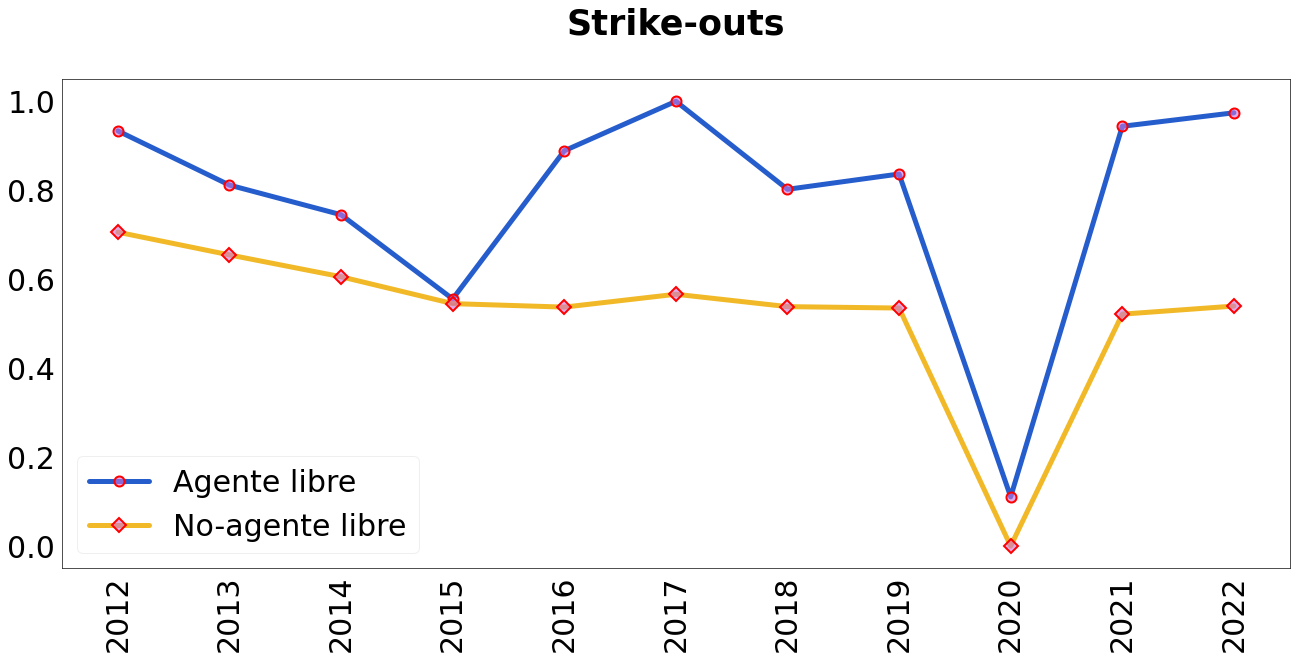

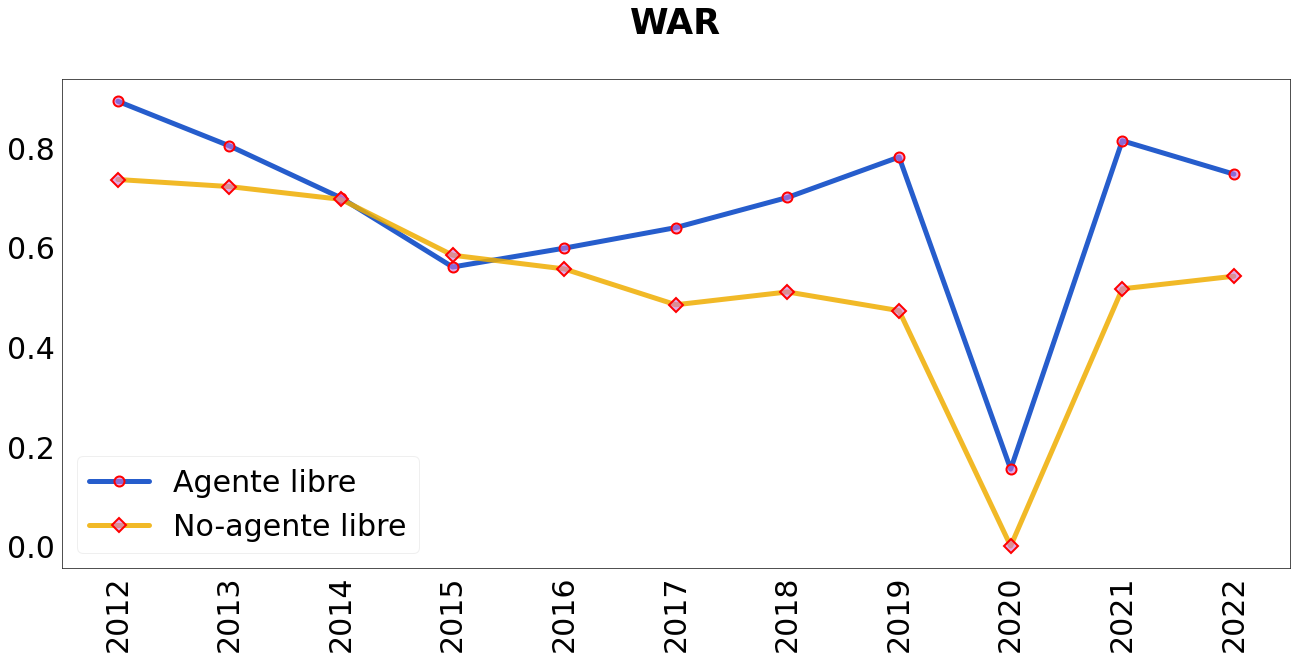

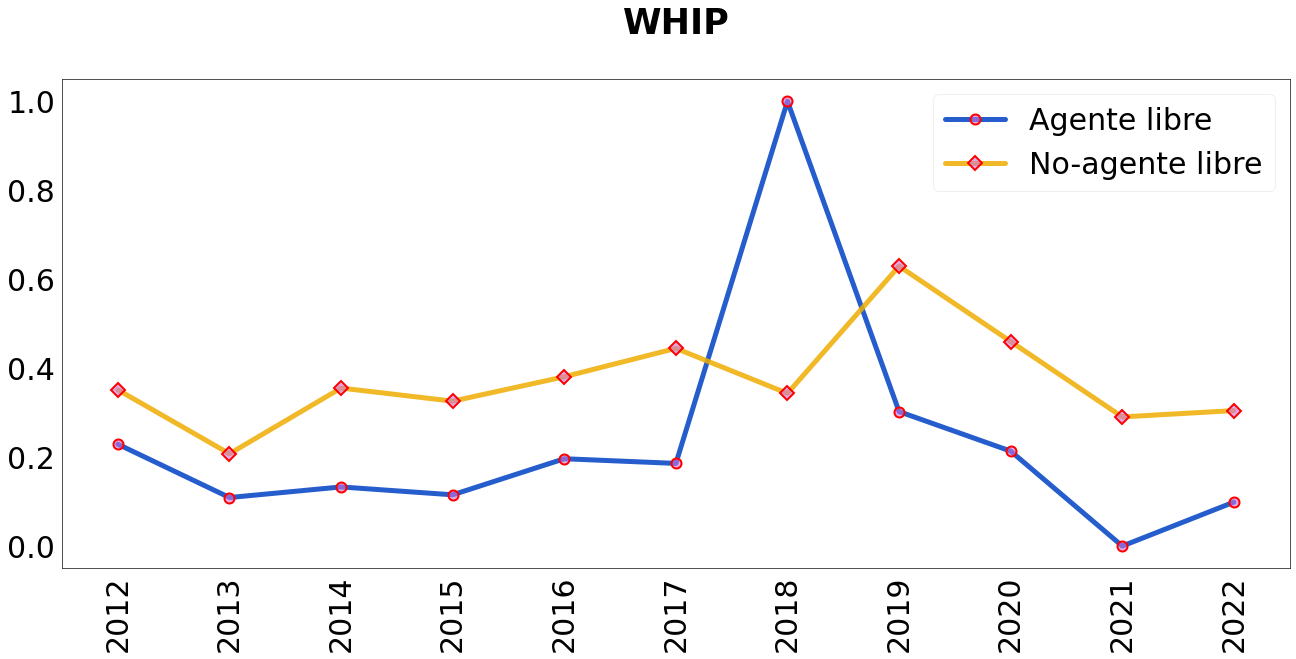

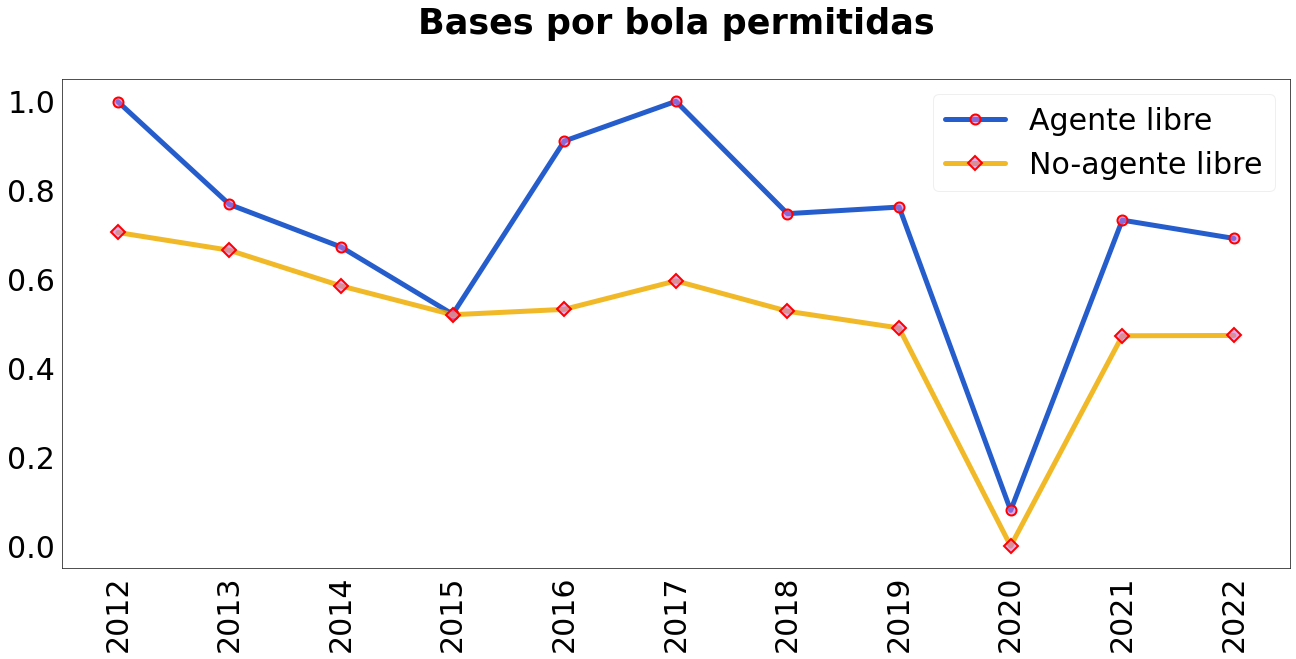

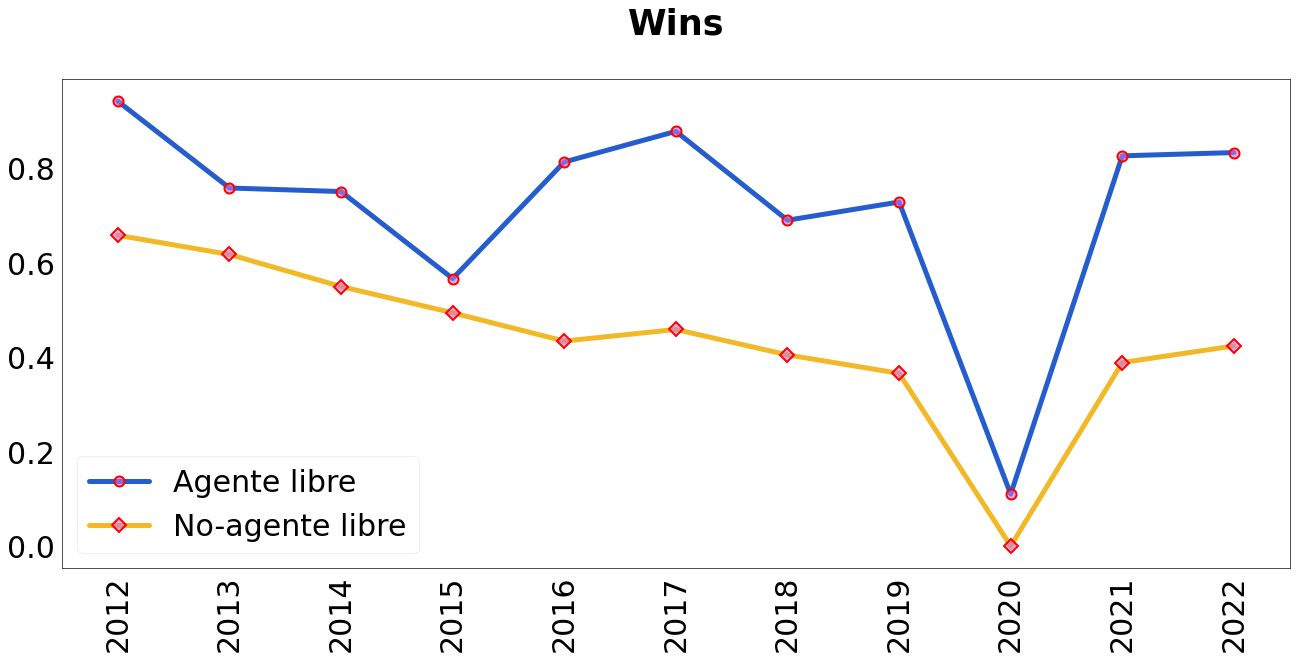

In [22]:
for i in range(0,len(pitcher_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (22,9))
    
    # Bases de datos
    mean_pitcher_fa = mean_panel_pitcher[(mean_panel_pitcher['agente_libre'] == 'Si') & (mean_panel_pitcher['anio'] > 2011)][pitcher_statistics[i]]
    mean_pitcher_no = mean_panel_pitcher[(mean_panel_pitcher['agente_libre'] == 'No') & (mean_panel_pitcher['anio'] > 2011)][pitcher_statistics[i]]
    # Máximos
    max_pitcher = mean_panel_pitcher[pitcher_statistics[i]].max()
    # Mínimos
    min_pitcher = mean_panel_pitcher[pitcher_statistics[i]].min()
    # Bases normalizadas
    normalized_fa = (mean_pitcher_fa - min_pitcher)/(max_pitcher - min_pitcher)
    normalized_no = (mean_pitcher_no - min_pitcher)/(max_pitcher - min_pitcher)
    
    axes.plot(temporadas,
              normalized_fa,
              color = (0/255,64/255,196/255,0.85),
              markerfacecolor = (205/255,114/255,220/255,0.6),
              marker = 'o',
              markersize = 10,
              markeredgecolor = 'red',
              markeredgewidth = 2,
              linewidth = 5,
              label = 'Agente libre')
    axes.plot(temporadas,
              normalized_no,
              color = (239/255,173/255,1/255,0.85),
              markerfacecolor = (205/255,114/255,220/255,0.6),
              marker = 'D',
              markersize = 10,
              markeredgecolor = 'red',
              markeredgewidth = 2,
              linewidth = 5,
              label = 'No-agente libre')
    axes.set_title(pitcher_labels[i] + '\n',
                   fontsize = 35,
                   fontweight = 'bold',
                   color = 'black')
    axes.set_xlabel('Temporadas',
                    fontsize = 16,
                    color = 'black',
                    fontweight = 'bold')
    axes.set_ylabel(pitcher_labels[i], 
                    fontsize = 26,
                    color = 'black',
                    fontweight = 'bold')
    axes.tick_params(labelsize = 30,
                     labelcolor = 'black')
    axes.tick_params(axis = 'x',
                     labelrotation = 90)
    legend = plt.legend(loc = 'best', 
                    labelcolor = 'black',
                    fontsize = 30,
                    facecolor = 'white',
                    framealpha = 0.3,
                    fancybox = True,
                    frameon = True)
    axes.set(xlabel = None)
    axes.set(ylabel = None)
    axes.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Pitchers/Line_plot/YA/plot_pitcher_" + str(pitcher_labels_save[i]).lower() + ".pdf",
                format = "pdf")

## Diagramas de densidad

Primero, calcularemos los ancho de ventana óptimas

In [23]:
# Agentes libres
fa_pitcher_binwidth = [0]*len(pitcher_statistics)
fa_hitter_binwidth = [0]*len(hitter_statistics)
# Mo agentes libres
no_pitcher_binwidth = [0]*len(pitcher_statistics)
no_hitter_binwidth = [0]*len(hitter_statistics)

# Pitchers dataframes
fa_pitcher = mean_panel_pitcher[mean_panel_pitcher['agente_libre'] == 'Si']
no_pitcher = mean_panel_pitcher[mean_panel_pitcher['agente_libre'] == 'No']
# Filtered dataframes
fa_hitter = mean_panel_hitter[mean_panel_hitter['agente_libre'] == 'Si']
no_hitter = mean_panel_hitter[mean_panel_hitter['agente_libre'] == 'No']

In [24]:
# Pitchers:
for i in range(0,len(pitcher_statistics)):    
    # Agentes libres pitchers:
    # Obteniendo percentiles
    fa_pitcher_aux = fa_pitcher[pitcher_statistics[i]]
    P = np.percentile(fa_pitcher_aux, [10, 90])
    fa_pitcher_filtered = fa_pitcher[(fa_pitcher_aux > P[0]) & (fa_pitcher_aux < P[1])]
    # Ventana óptima
    delta = 1.7188 # Ver CT
    w_sd = fa_pitcher_filtered[pitcher_statistics[i]].std()
    q1, q3 = np.percentile(fa_pitcher_filtered[pitcher_statistics[i]], [25,75])
    w_iqr_adj = (q3 - q1)/1.349
    w_N = fa_pitcher_filtered.shape[0]
    constante = 1.3643
    ajuste = min([w_sd,w_iqr_adj])
    fa_pitcher_binwidth[i] = constante*delta*ajuste*w_N**(-0.2) # ancho de banda
    
    # No-agentes libres pitchers:
    # Obteniendo percentiles
    no_pitcher_aux = no_pitcher[pitcher_statistics[i]]
    P = np.percentile(no_pitcher_aux, [5, 95])
    no_pitcher_filtered = no_pitcher[(no_pitcher_aux > P[0]) & (no_pitcher_aux < P[1])]
    # Ventana óptima
    delta = 1.7188 # Ver CT
    w_sd = no_pitcher_filtered[pitcher_statistics[i]].std()
    q1, q3 = np.percentile(no_pitcher_filtered[pitcher_statistics[i]], [25,75])
    w_iqr_adj = (q3 - q1)/1.349
    w_N = no_pitcher_filtered.shape[0]
    constante = 1.3643
    ajuste = min([w_sd,w_iqr_adj])
    no_pitcher_binwidth[i] = constante*delta*ajuste*w_N**(-0.2) # ancho de banda

# Hitters:
for i in range(0,len(hitter_statistics)): 
    # Agentes libres pitchers:
    # Obteniendo percentiles
    fa_hitter_aux = fa_hitter[hitter_statistics[i]]
    P = np.percentile(fa_hitter_aux, [10, 90])
    fa_hitter_filtered = fa_hitter[(fa_hitter_aux > P[0]) & (fa_hitter_aux < P[1])]
    # Ventana óptima
    delta = 1.7188 # Ver CT
    w_sd = fa_hitter_filtered[hitter_statistics[i]].std()
    q1, q3 = np.percentile(fa_hitter_filtered[hitter_statistics[i]], [25,75])
    w_iqr_adj = (q3 - q1)/1.349
    w_N = fa_hitter_filtered.shape[0]
    constante = 1.3643
    ajuste = min([w_sd,w_iqr_adj])
    fa_hitter_binwidth[i] = constante*delta*ajuste*w_N**(-0.2) # ancho de banda
    
    # No-agentes libres:
    # Obteniendo percentiles
    no_hitter_aux = no_hitter[hitter_statistics[i]]
    P = np.percentile(no_hitter_aux, [10, 90])
    no_hitter_filtered = no_hitter[(no_hitter_aux > P[0]) & (no_hitter_aux < P[1])]
    # Ventana óptima
    delta = 1.7188 # Ver CT
    w_sd = no_hitter_filtered[hitter_statistics[i]].std()
    q1, q3 = np.percentile(no_hitter_filtered[hitter_statistics[i]], [25,75])
    w_iqr_adj = (q3 - q1)/1.349
    w_N = no_hitter_filtered.shape[0]
    constante = 1.3643
    ajuste = min([w_sd,w_iqr_adj])
    no_hitter_binwidth[i] = constante*delta*ajuste*w_N**(-0.2) # ancho de banda

In [25]:
hitter_positions = [0.1, -0.3, 0.2, 0.4, -0.4,
                    0.05, 0.08, -0.25, -0.5, 0.2,
                    1, -0.4]
hitter_positions_adjustment = [0, 0, 0, 0, 0,
                               0, 0, 0, 0, 0,
                               0.2, 0]
pitcher_positions = [0.1, 0.1, 0.1, 0.5, -3,
                    0.23, -2.5, 0.1, 0.1, 2,
                    0.05, 0.08, 0.1, -0.48, -1.73,
                    0.1, 0.2]
pitcher_positions_adjustment = [0, 0, 0, 50, 2,
                                0.01, -3, 0, 0, 0,
                                0, -1, 0, 0, 0,
                                0, 0]

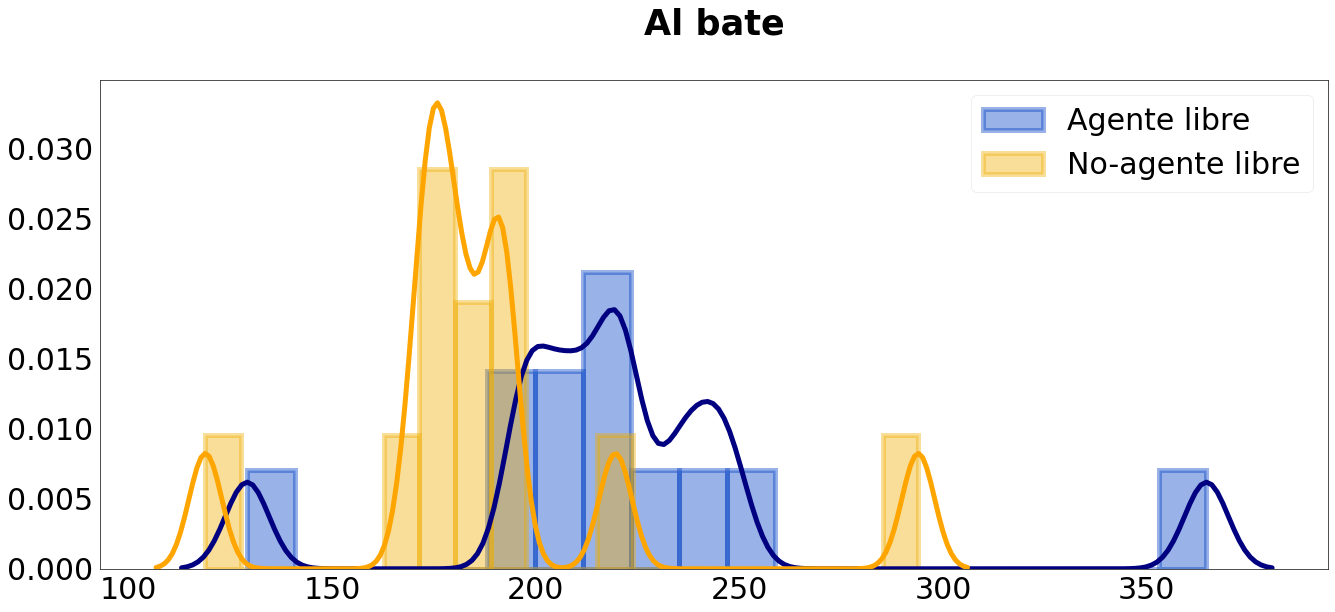

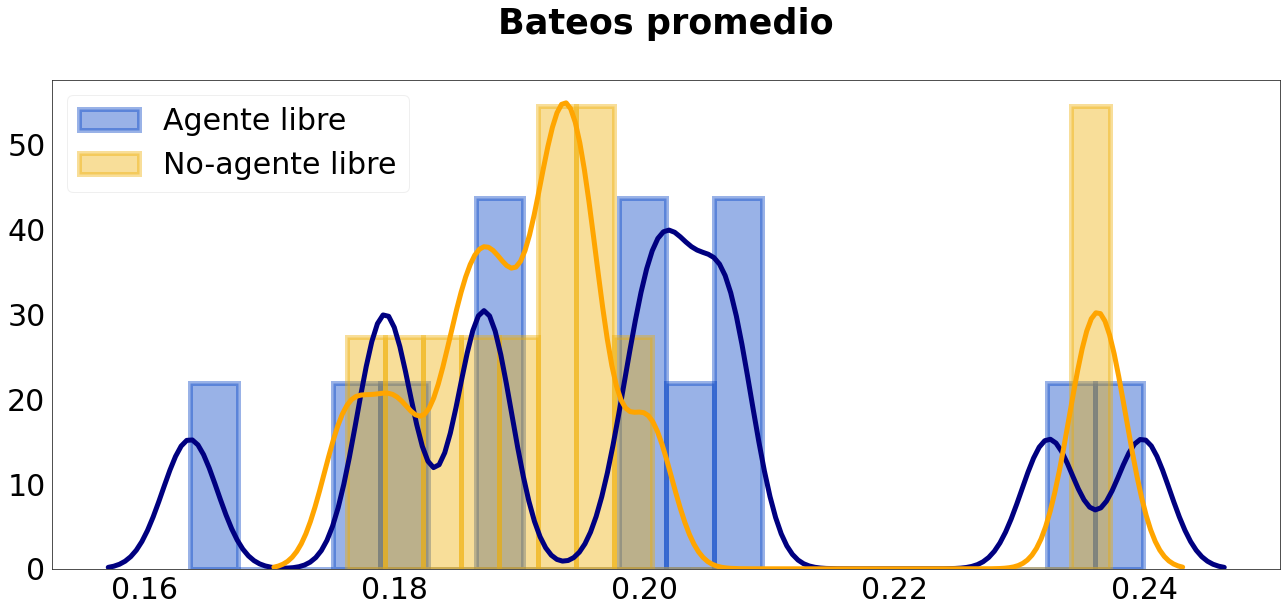

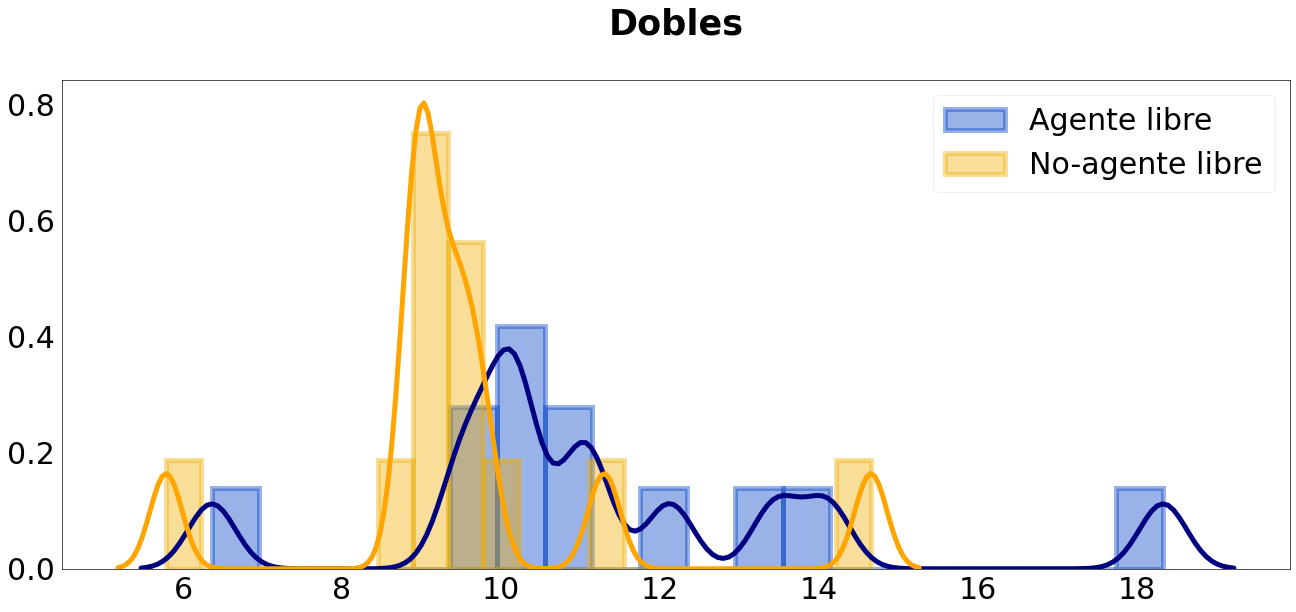

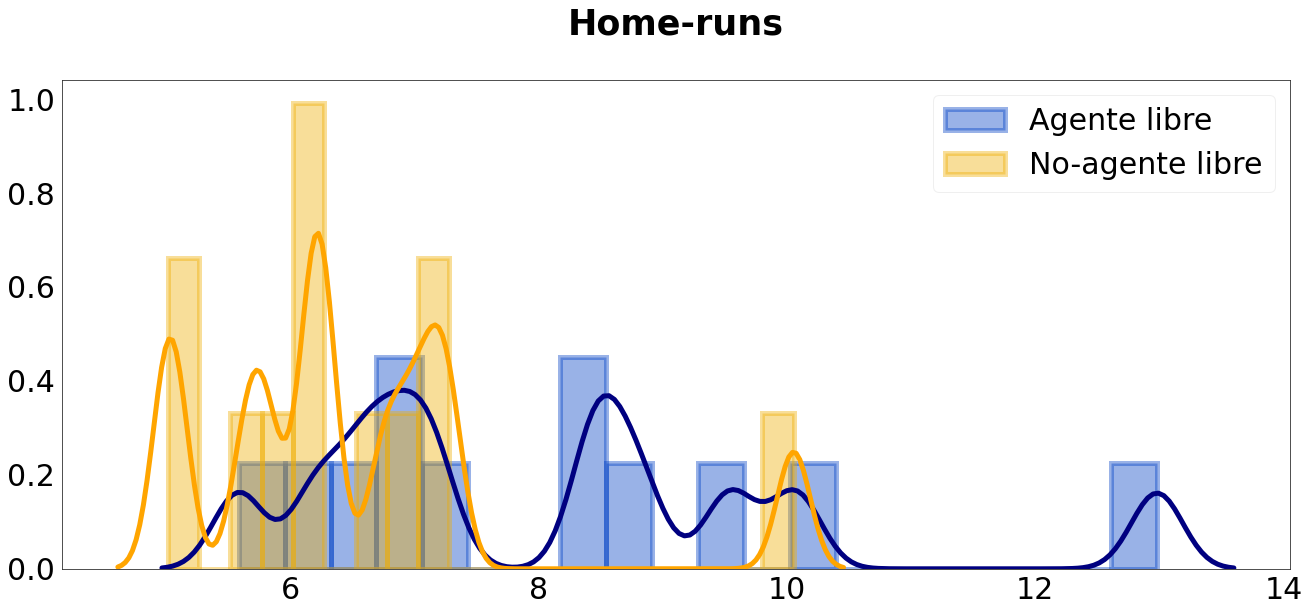

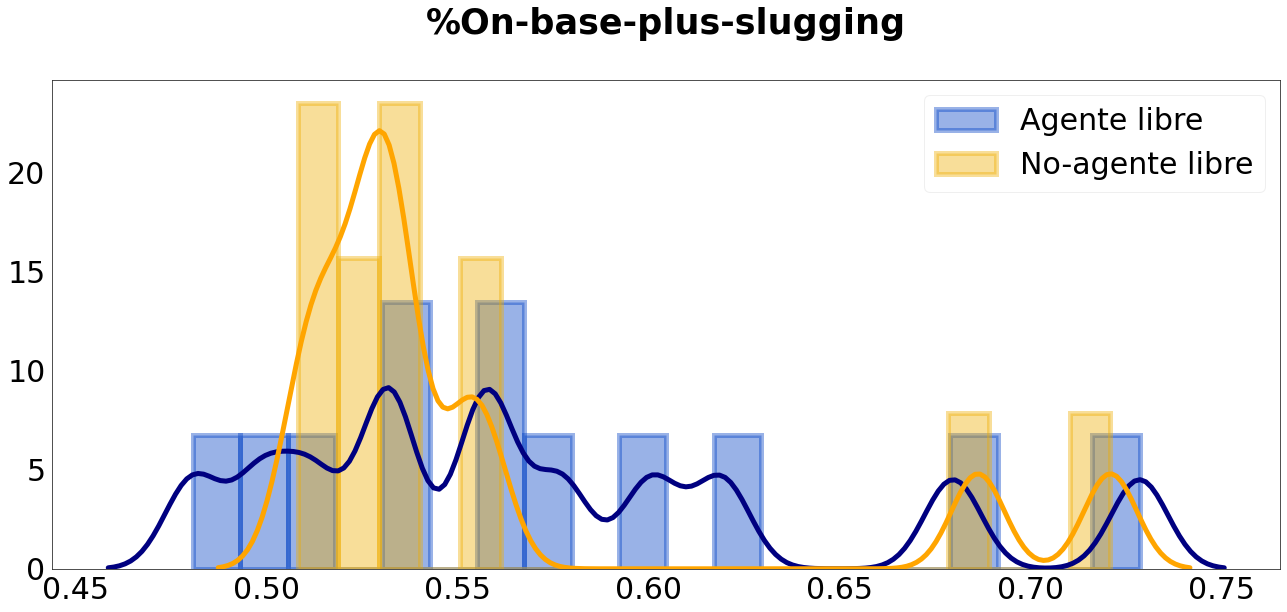

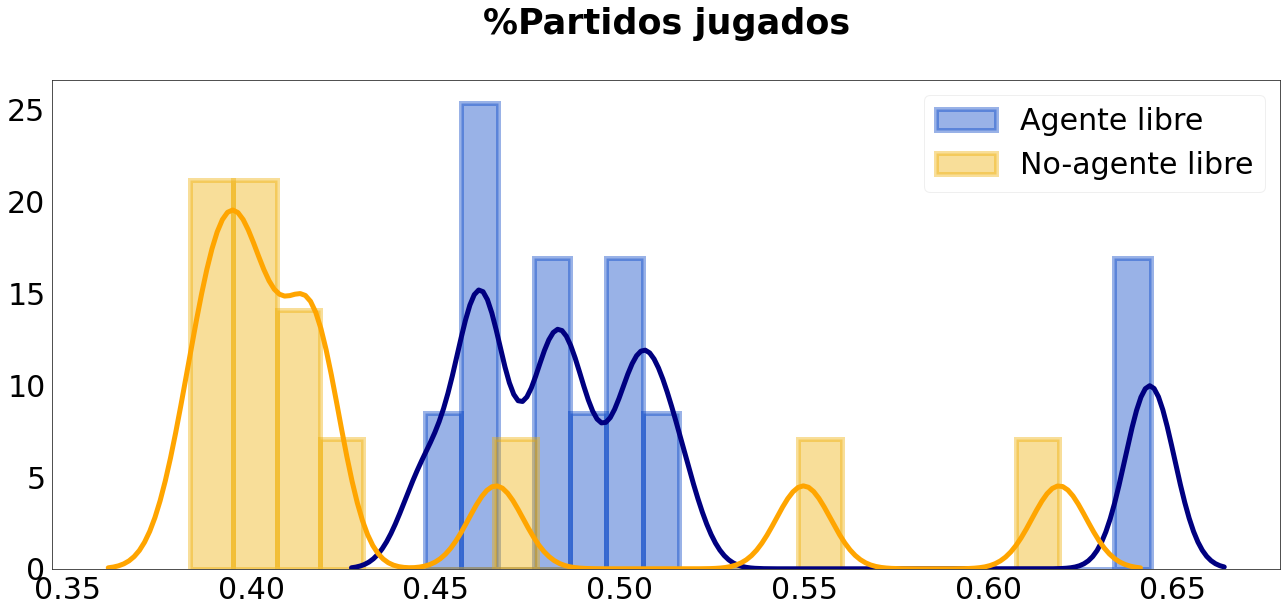

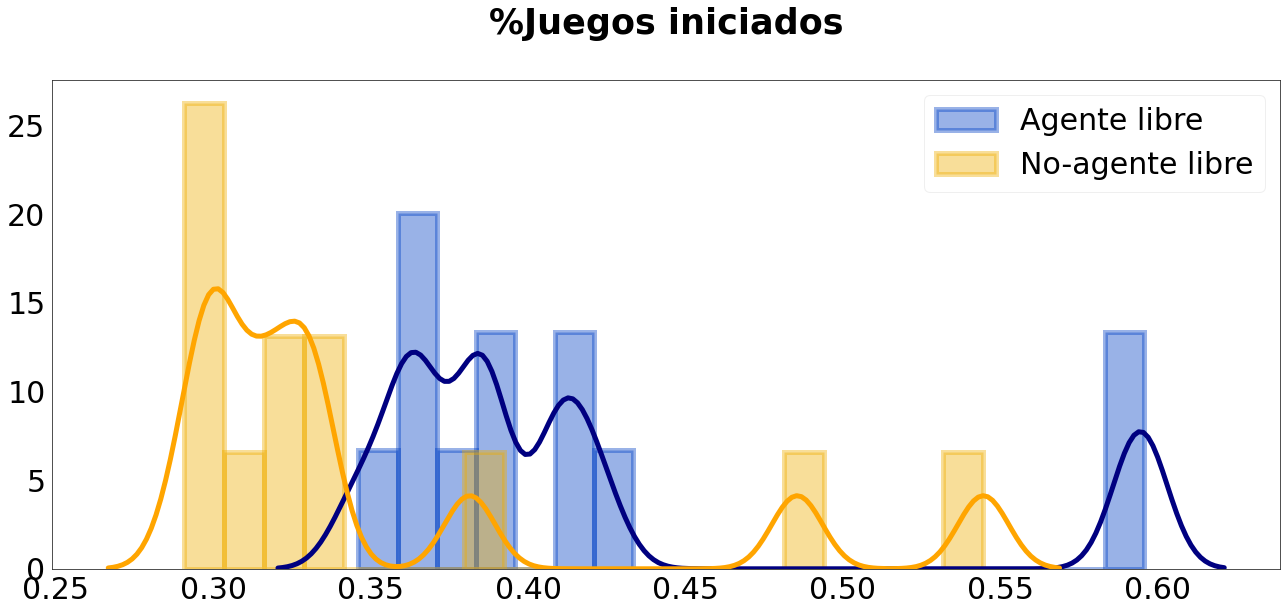

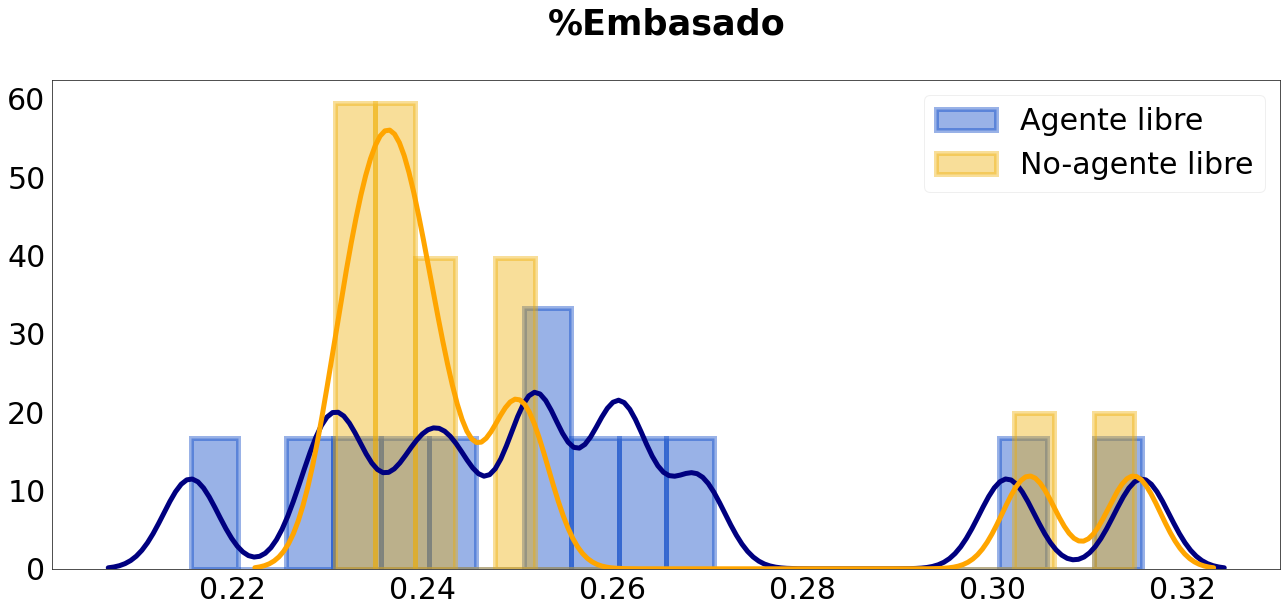

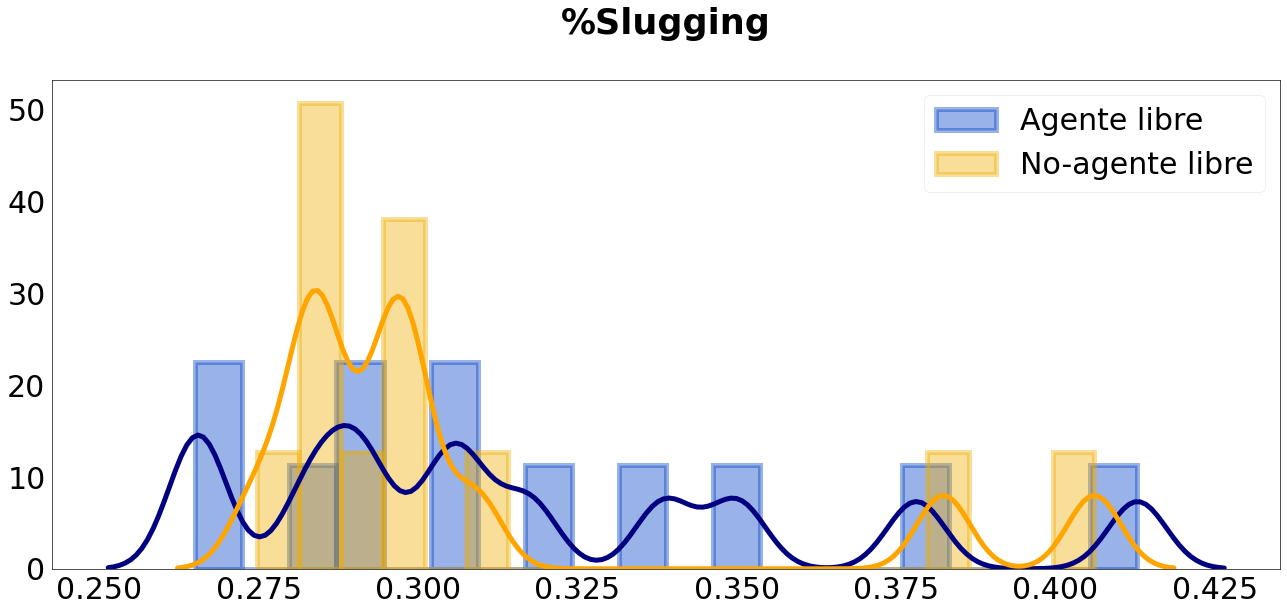

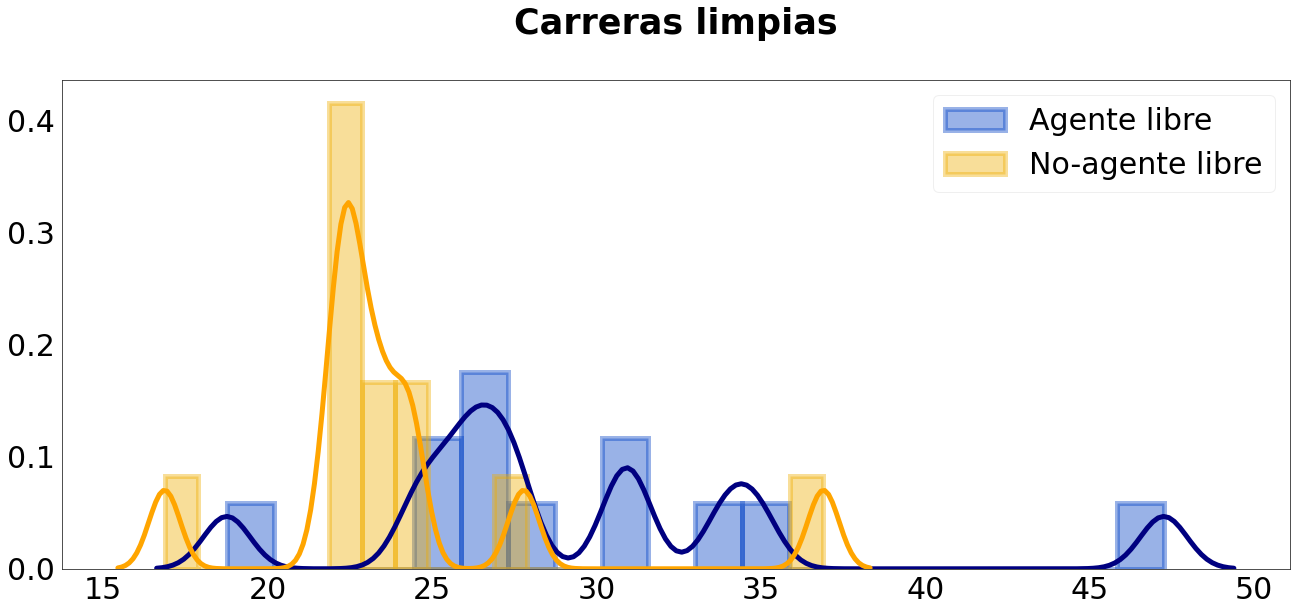

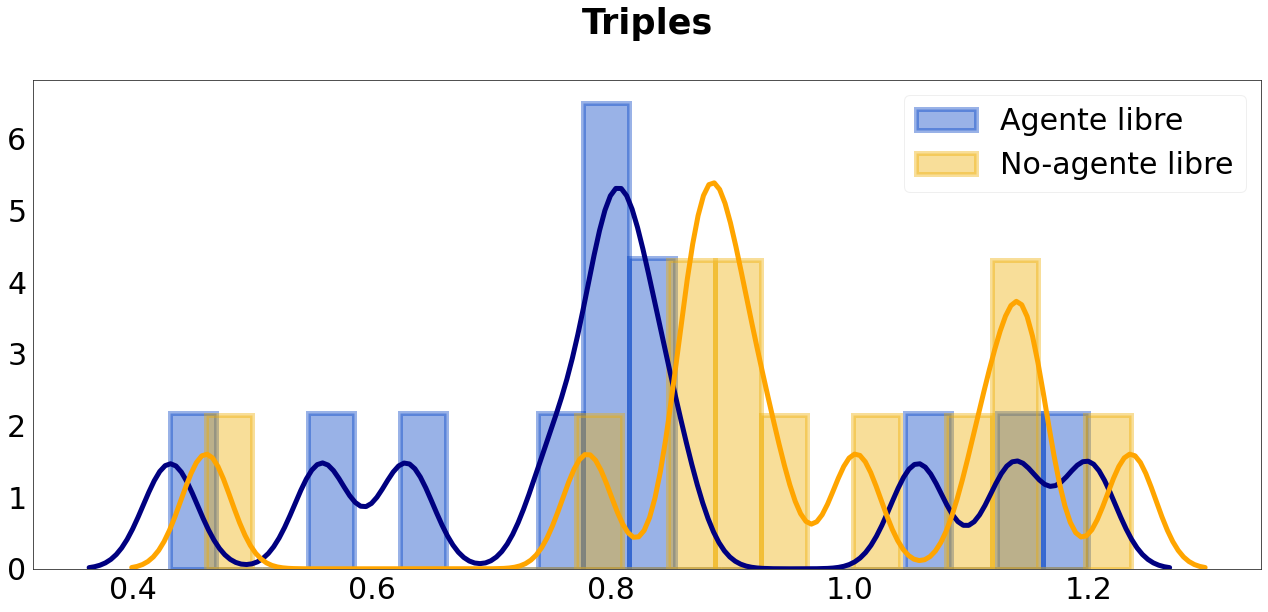

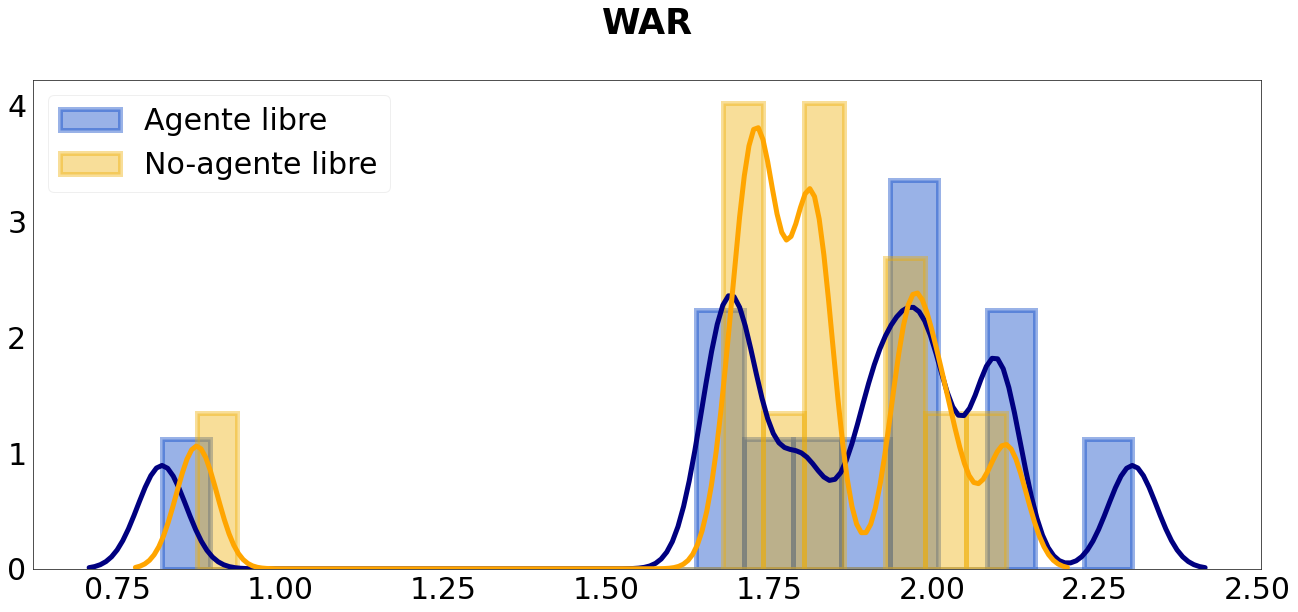

In [26]:
for i in range(0,len(hitter_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (22,9))
    
    g = sns.distplot(mean_panel_hitter[mean_panel_hitter['agente_libre'] == 'Si'][hitter_statistics[i]],
                     #bins = 20,
                     hist_kws = {'color': (0/255,64/255,196/255,0.7),
                                 'edgecolor': (0/255,64/255,196/255,1),
                                 'linewidth': 5,
                                 'linestyle': 'solid'},
                     kde_kws = {"color": "navy",
                                "linewidth": 5,
                                "bw": 0.1},
                     bins = 20,
                     label = 'Agente libre')
    g = sns.distplot(mean_panel_hitter[mean_panel_hitter['agente_libre'] == 'No'][hitter_statistics[i]],
                     #bins = 20,
                     hist_kws = {'color': (239/255,173/255,1/255,0.8),
                                 'edgecolor': (239/255,173/255,1/255,1),
                                 'linewidth': 5,
                                 'linestyle': 'solid'},
                     kde_kws = {"color": "orange",
                                "linewidth": 5,
                                "bw": 0.1},
                     bins = 20,
                     label = 'No-agente libre')
    g.set_title(hitter_labels[i] + '\n',
                fontsize = 35,
                fontweight = 'bold',
                color = 'black')
    g.set_xlabel('Temporadas',
                 fontsize = 26,
                 color = 'black',
                 fontweight = 'bold')
    g.set_ylabel(hitter_labels[i], 
                 fontsize = 26,
                 color = 'black',
                 fontweight = 'bold')
    axes.tick_params(labelsize = 30,
                     labelcolor = 'black')
    legend = plt.legend(loc = 'best', 
                        labelcolor = 'black',
                        fontsize = 30,
                        facecolor = 'white',
                        framealpha = 0.3,
                        fancybox = True,
                        frameon = True)
    g.set(xlabel = None)
    g.set(ylabel = None)
    g.patch.set_facecolor('white')
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Hitters/Density_plot/YA/density_hitter_" + str(hitter_labels_save[i]).lower() + ".pdf",
                format = "pdf")

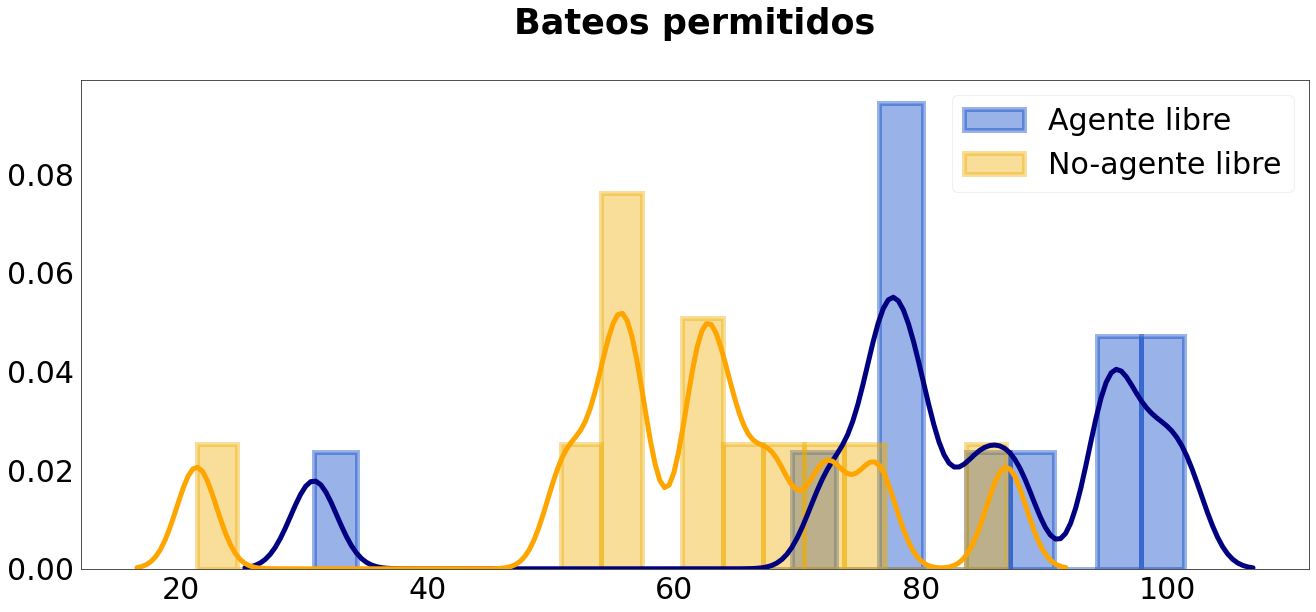

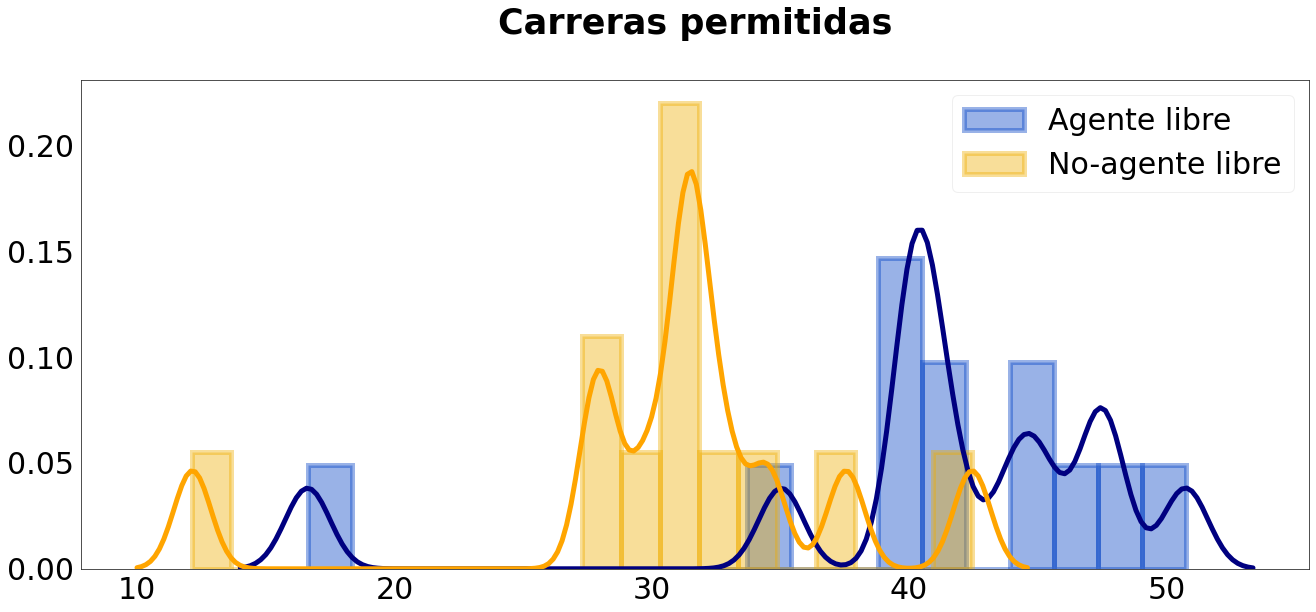

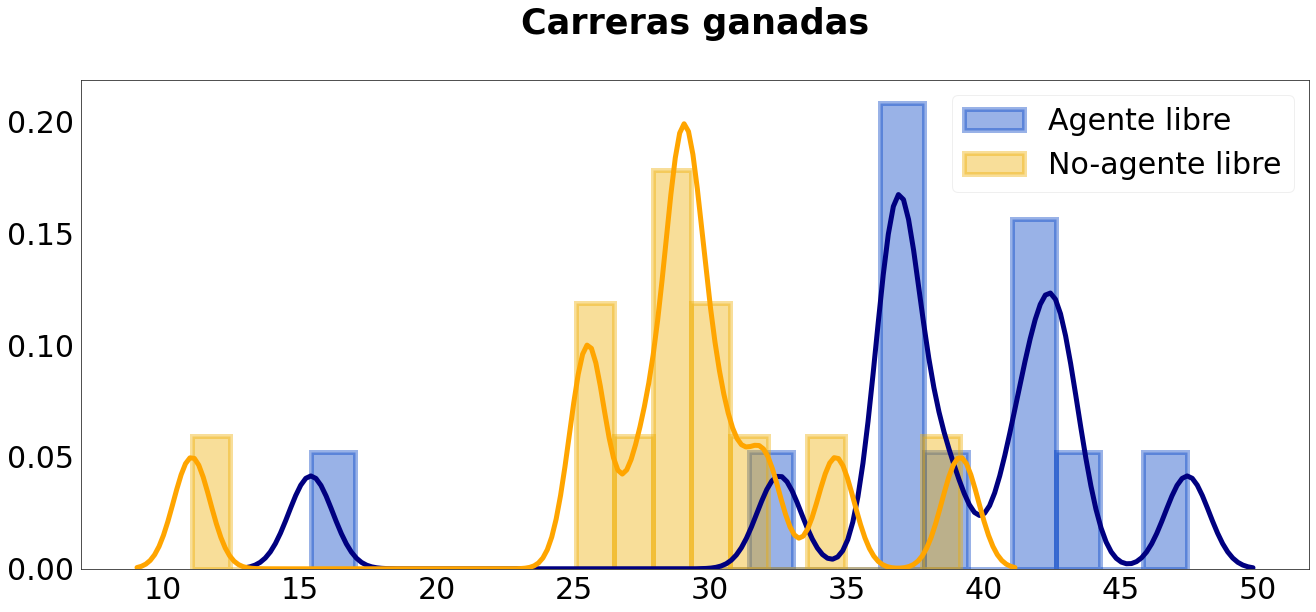

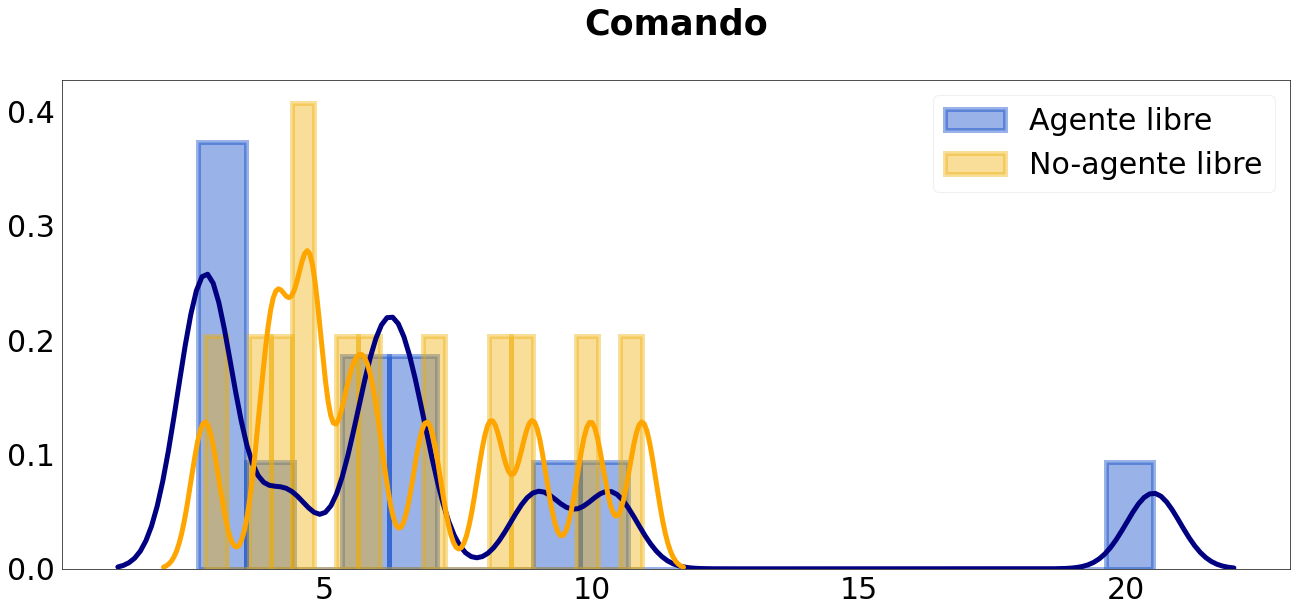

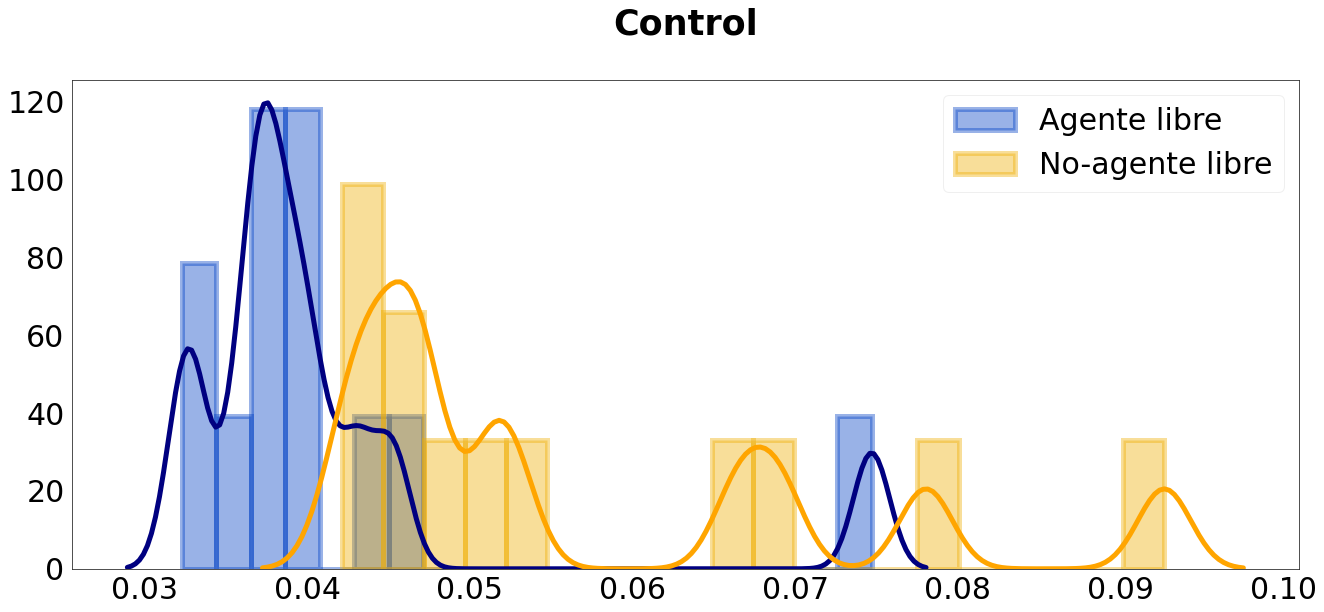

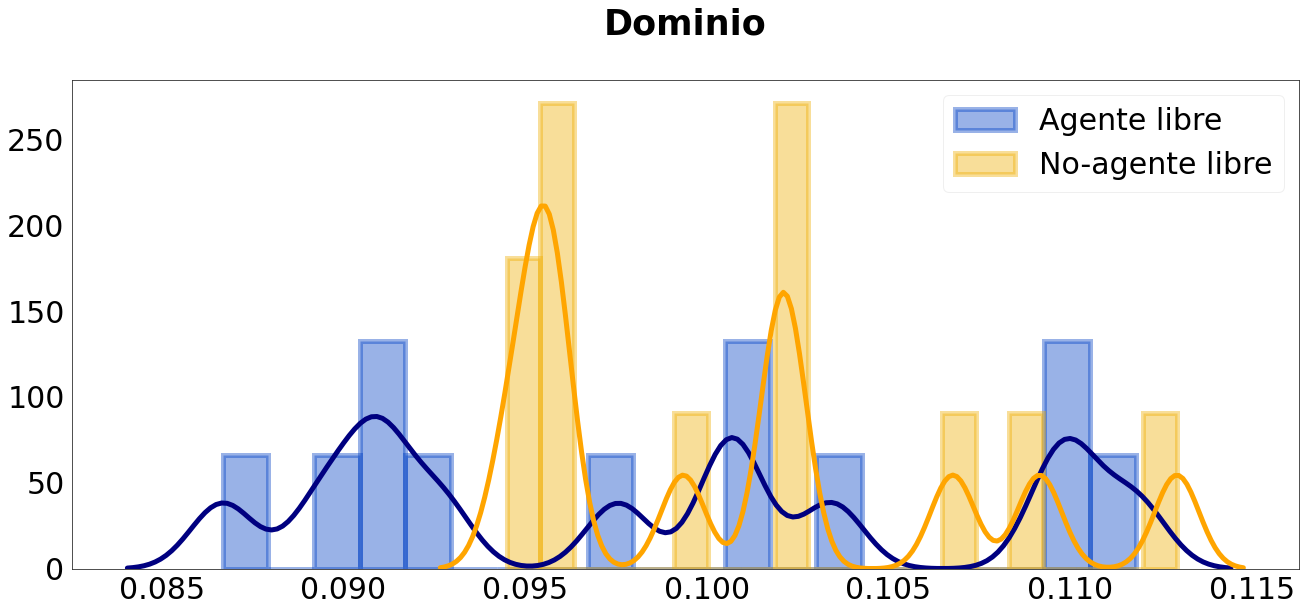

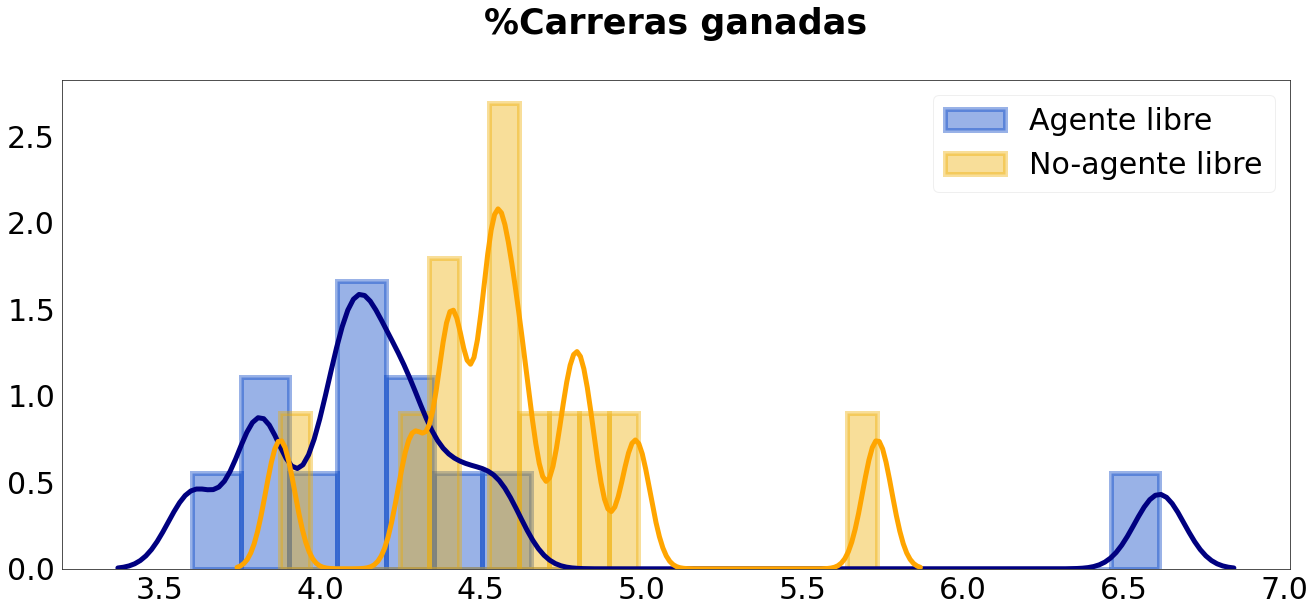

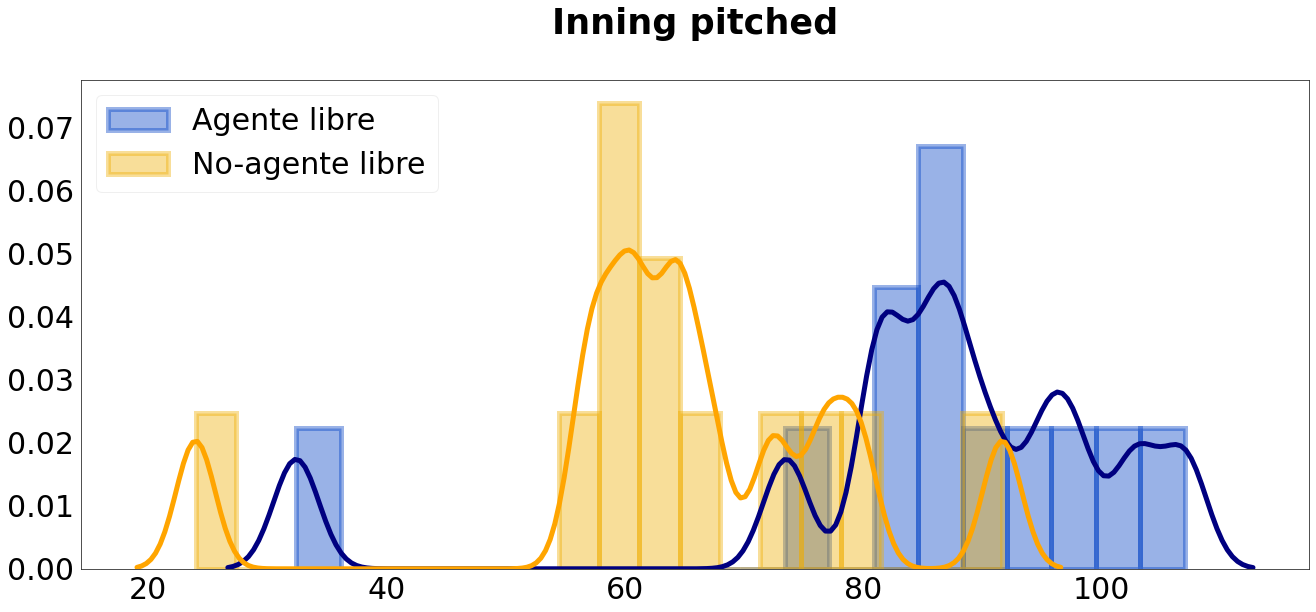

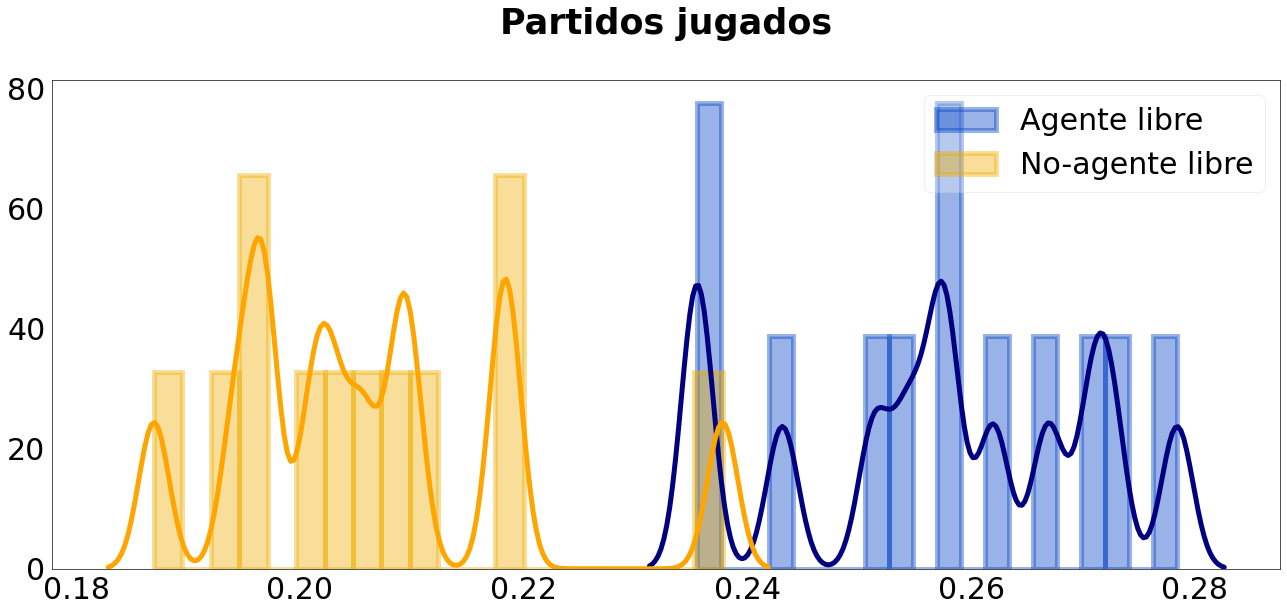

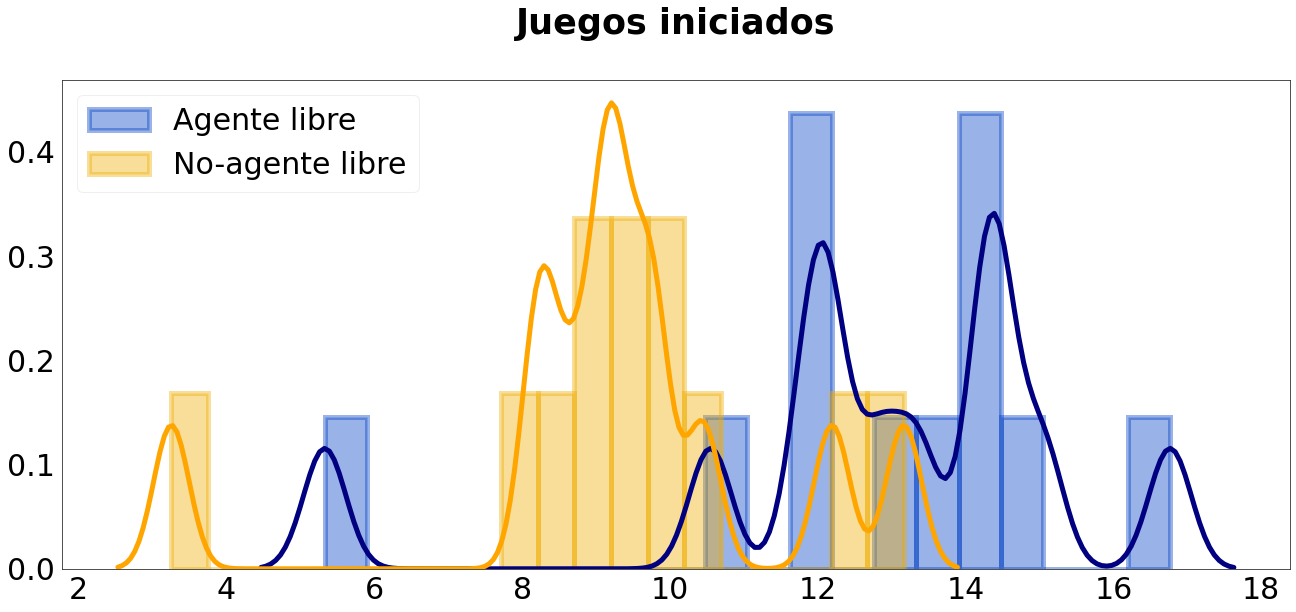

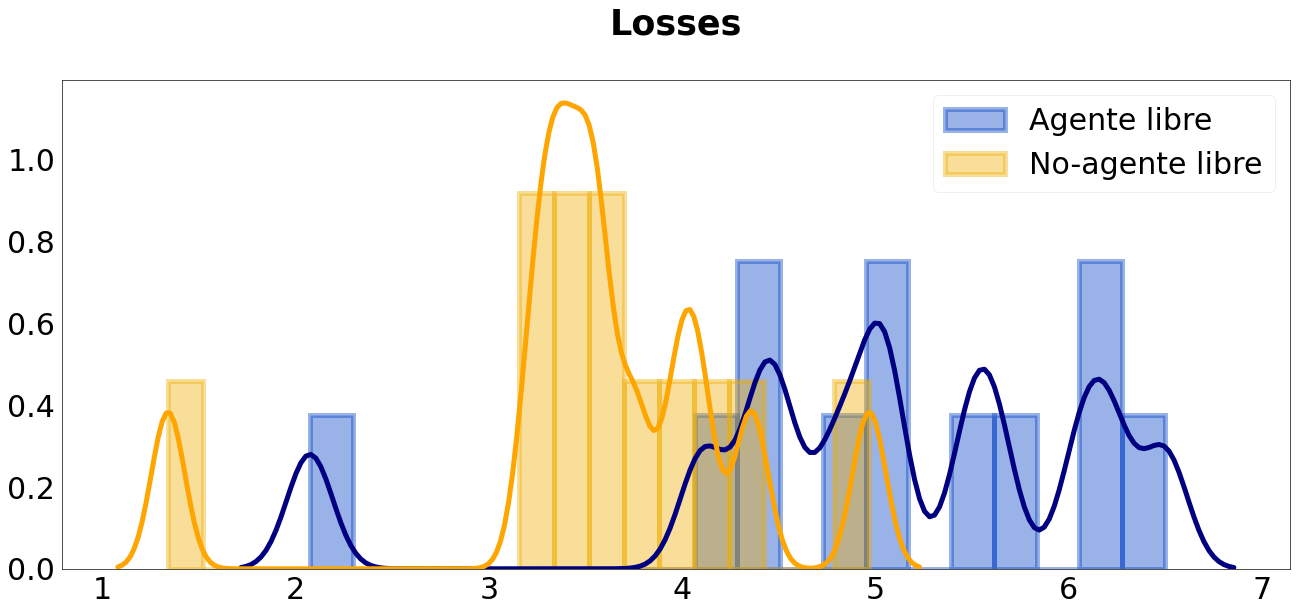

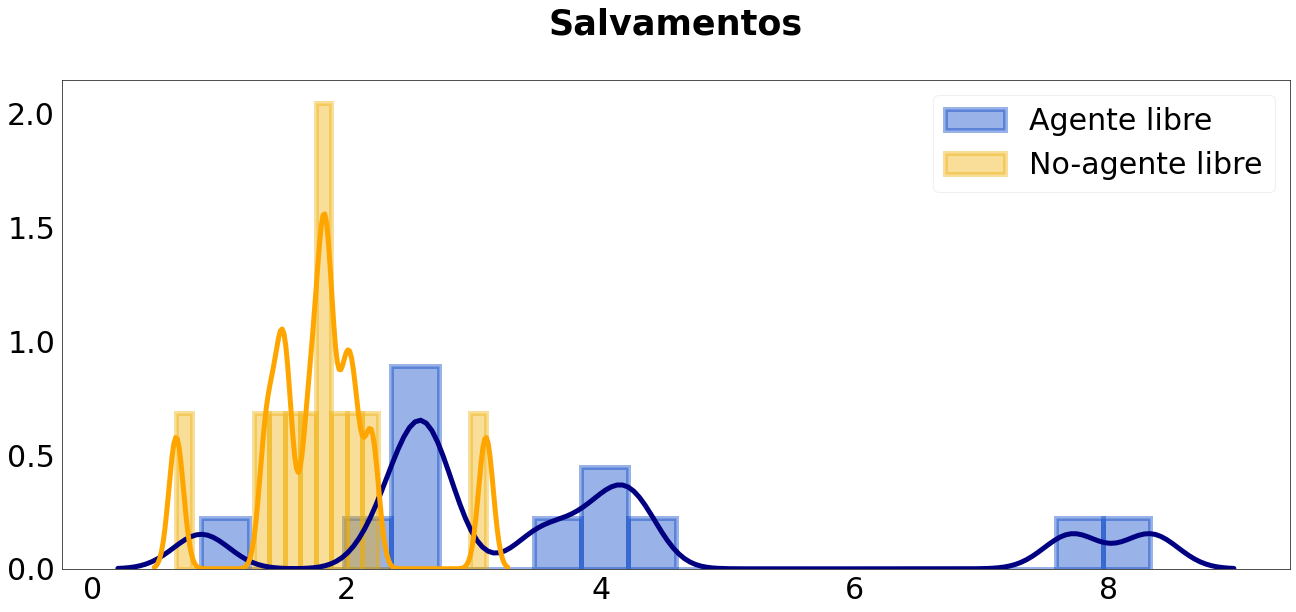

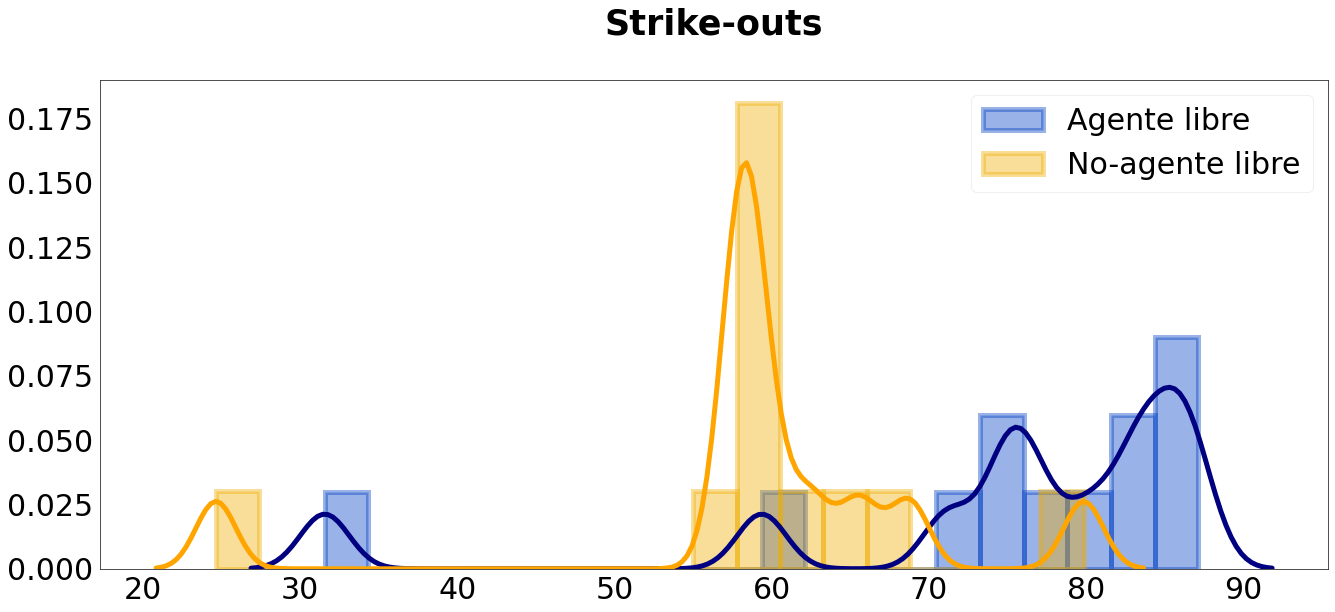

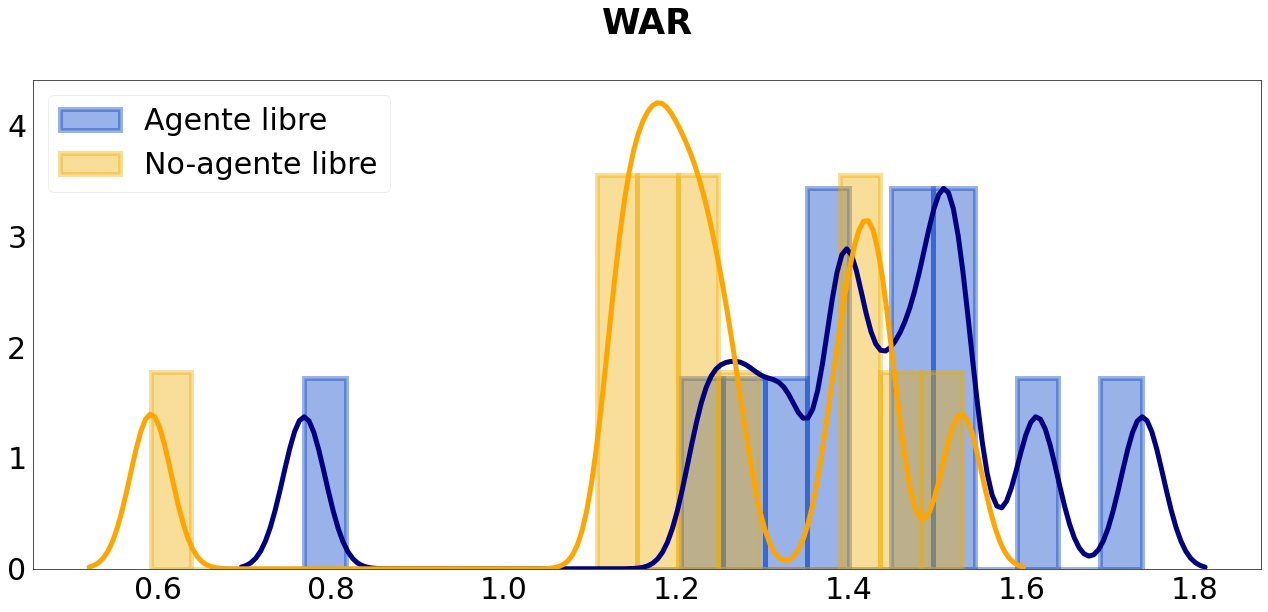

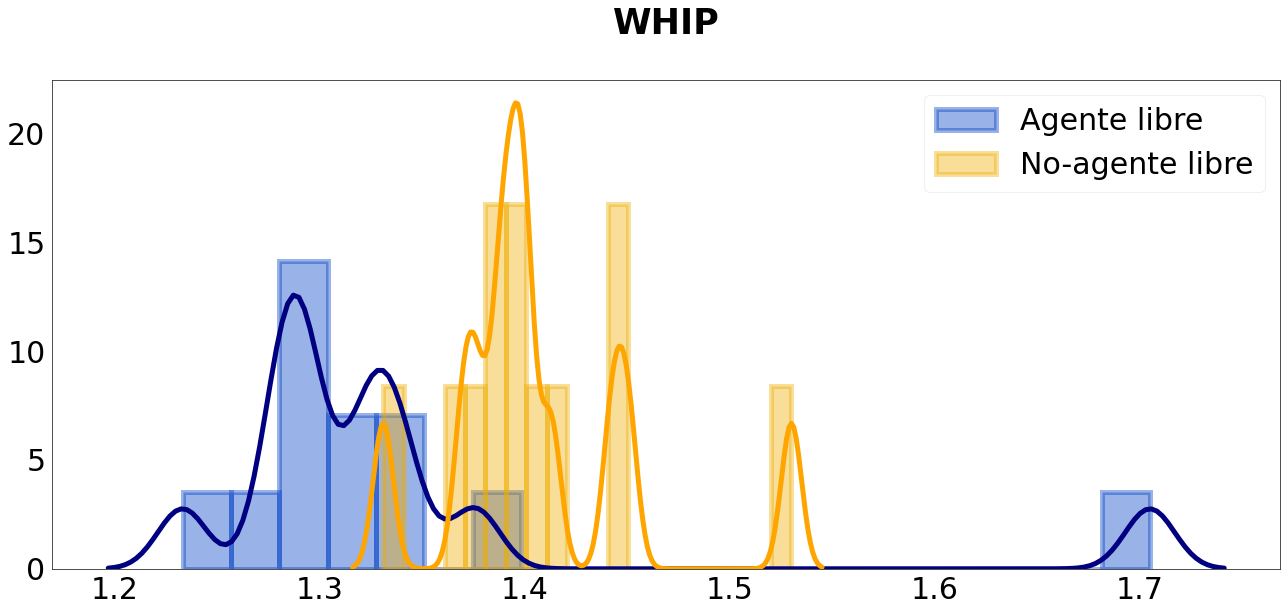

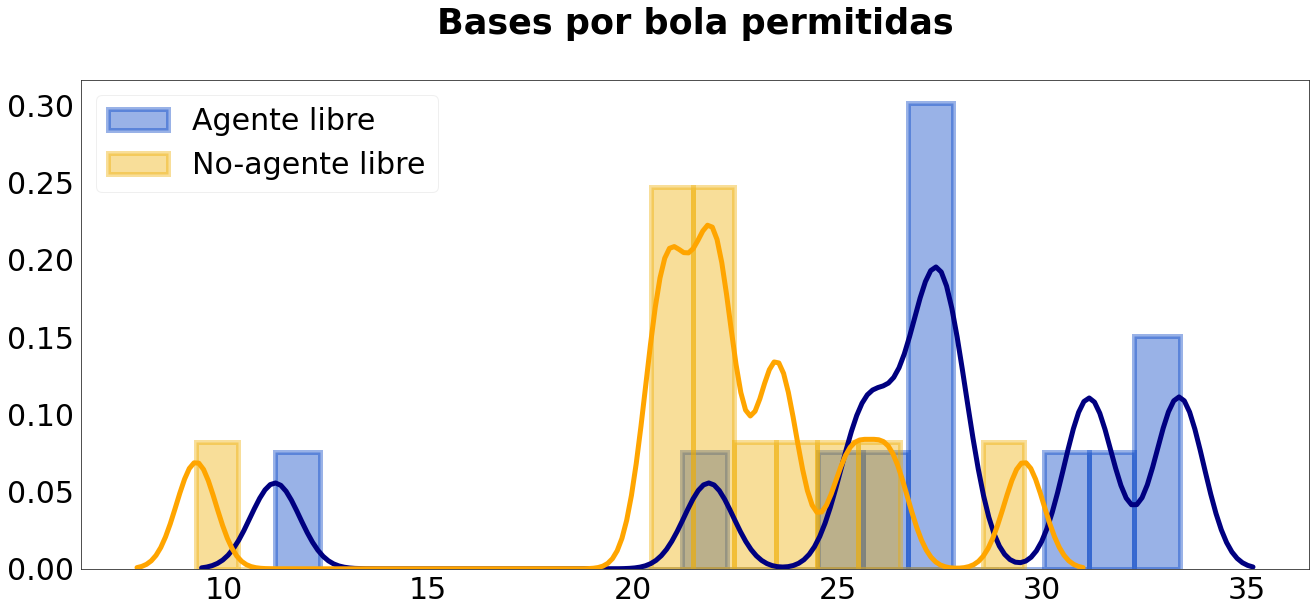

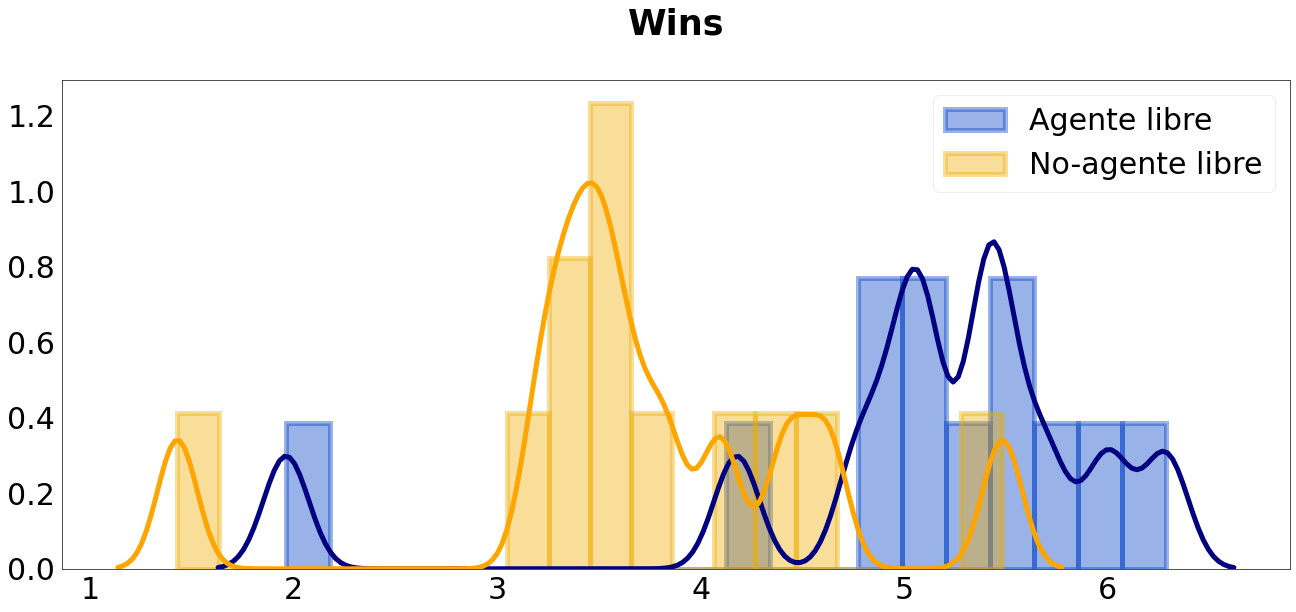

In [27]:
for i in range(0,len(pitcher_statistics)):
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (22,9))
    
    g = sns.distplot(mean_panel_pitcher[mean_panel_pitcher['agente_libre'] == 'Si'][pitcher_statistics[i]],
                     #bins = 20,
                     hist_kws = {'color': (0/255,64/255,196/255,0.7),
                                 'edgecolor': (0/255,64/255,196/255,1),
                                 'linewidth': 5,
                                 'linestyle': 'solid'},
                     kde_kws = {"color": "navy",
                                "linewidth": 5,
                                "bw": 0.1},
                     bins = 20,
                     label = 'Agente libre')
    g = sns.distplot(mean_panel_pitcher[mean_panel_pitcher['agente_libre'] == 'No'][pitcher_statistics[i]],
                     #bins = 20,
                     hist_kws = {'color': (239/255,173/255,1/255,0.8),
                                 'edgecolor': (239/255,173/255,1/255,1),
                                 'linewidth': 5,
                                 'linestyle': 'solid'},
                     kde_kws = {"color": "orange",
                                "linewidth": 5,
                                "bw": 0.1},
                     bins = 20,
                     label = 'No-agente libre')
    g.set_title(pitcher_labels[i] + '\n',
                fontsize = 35,
                fontweight = 'bold',
                color = 'black')
    g.set_xlabel('Temporadas',
                 fontsize = 26,
                 color = 'black',
                 fontweight = 'bold')
    g.set_ylabel(pitcher_labels[i], 
                 fontsize = 26,
                 color = 'black',
                 fontweight = 'bold')
    axes.tick_params(labelsize = 30,
                     labelcolor = 'black')
    legend = plt.legend(loc = 'best', 
                        labelcolor = 'black',
                        fontsize = 30,
                        facecolor = 'white',
                        framealpha = 0.3,
                        fancybox = True,
                        frameon = True)
    g.set(xlabel = None)
    g.set(ylabel = None)
    g.patch.set_facecolor('white')
    
    
    plt.savefig(path + "/Visualizations/Descriptive_statistics/Pitchers/Density_plot/YA/density_pitcher_" + str(pitcher_labels_save[i]).lower() + ".pdf",
                format = "pdf")